In [329]:
# imports
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# load dataframe
dfTest = pd.read_csv("..\\Datasets\\train.csv")


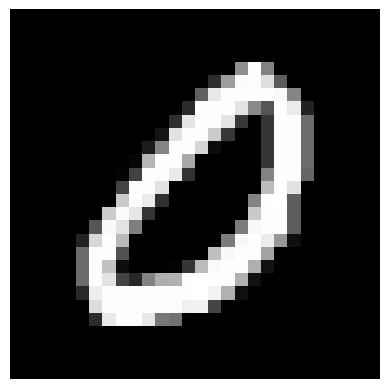

In [330]:
# renderization of a random image 

pixel_data = dfTest.iloc[17,1:].values
image_array = pixel_data.reshape((28,28))

plt.imshow(image_array,cmap = 'gray',vmin = 0,vmax = 255)
plt.axis('off')
plt.show()



In [331]:
# Neural net
import torch
import torch.nn as nn # neural network

Criterion for clasification of images to digits between 0 and 9 -> Cross entropy loss 

-> Probability distribution (values between 0 and 1) between the N different classes/possible outputs
    -> In this case N = 10

Formula:
Loss= -sum[i...N] (yi·log(pi)) 
yi = binary indicator (0 or 1) if label i (0...9) is the correct clasification
pi = predicted possibility for class i



In [332]:
# criterion = nn.crossEntropyLoss()

# manual def

def criterion(yhat, y):
    return -torch.mean(torch.sum(y * torch.log(yhat), dim = 1))

In [333]:
# Simple Neural Network:

class digit_rec_NN(nn.Module):
    def __init__(self):
        super(digit_rec_NN, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)  # 28 * 28 is the dimension of the image and 256 is the number of starting neurons -> This layer only flattens the image into 256 values so it can be used by the next layer
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)  # Output layer for 10 classes ( 0 - 9 )
    
    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.fc4(x))
        return x

In [334]:
# Prepare Data for training

from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
     # constructor
     def __init__(self, df):
          self.y = torch.tensor(df[["label"]].values, dtype=torch.float32) # y = result (0 - 9 )
          self.x = torch.tensor(df.iloc[:,1:].values,dtype=torch.float32) # x is every pixel column 
          self.len = self.x.shape[0] # saves in len attribute the num of rows on the dataset

     def __len__(self):
          return self.len
     
     def __getitem__(self, index):
           return (self.x[index]), (self.y[index]) # returns image array and digit


In [335]:
# Create NN Model

model = digit_rec_NN()

In [336]:
# Prepara Dataset

Dataset = Data(dfTest)
trainloader = DataLoader(Dataset, batch_size=64, shuffle=True)

In [337]:
# Define optimizer 

# Optimizer is what updates the weights and biases of the NN trough gradient descent (SGD)

optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.3, weight_decay=0.0001, dampening=0, nesterov = True)

# lr = learning rate. Values between 0 and 1. Controls the size of the step that the optimizer takes in the direction of minimizing loss function. Higer value -> faster learning but can cause instability. Lower value -> slower but more stable
# momentum = adds a fraction of the previous update to the current update. Smooths optimization progress. 
# weight decay -> Ads a penalty to the loss function to discourage large weights and prevent overfitting
# dampening -> dampens momentum to make updates more stable
# nesterov (T or F) -> enables Nesterov momentum, which changes how momentum is applied

In [338]:
# training

cycles = 100


for epoch in range(cycles):
    running_loss = 0.0

    for i,data in enumerate(trainloader,0):
        images,labels = data


        # We set the gradient to Zero
        optimizer.zero_grad()


        #We get production for input x
        outputs = model(images)

        # We calculate the loss for that given input
        loss = criterion(outputs, labels)


        # We do the Stochastic Gradient Descent
        loss.backward() # We calculate the derivative
        optimizer.step() # and advance a step in the gradient with the calculated derivative


[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


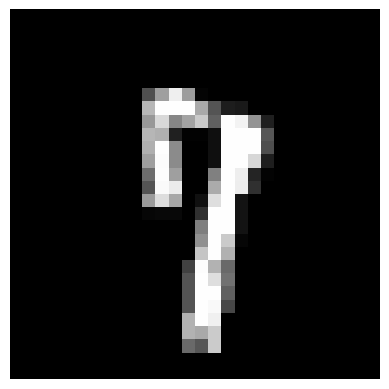

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


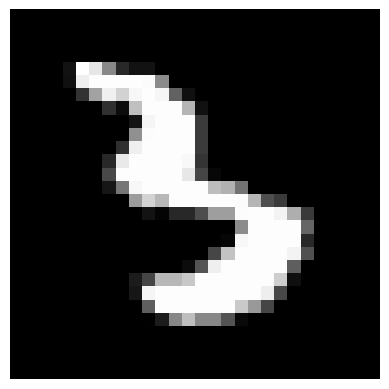

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


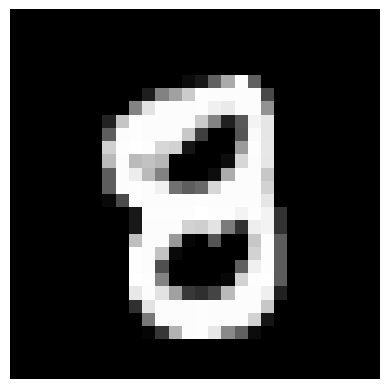

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


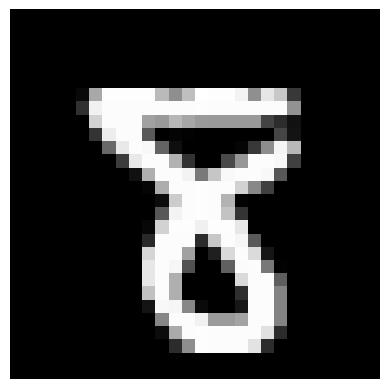

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


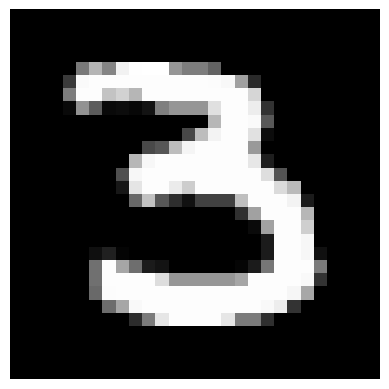

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


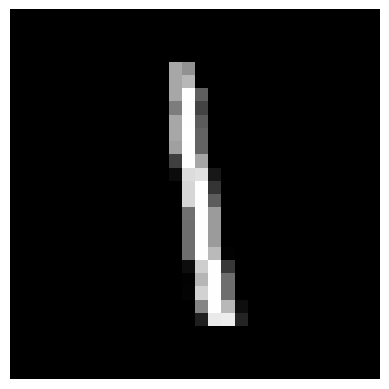

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


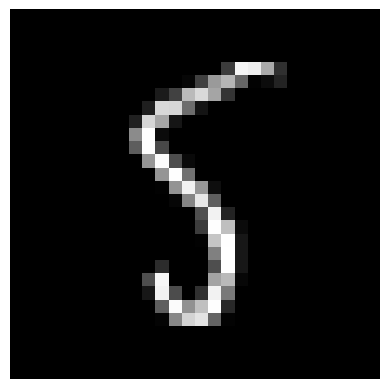

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


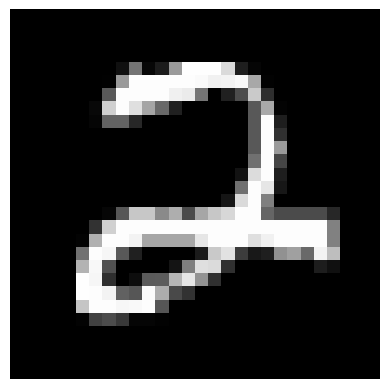

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


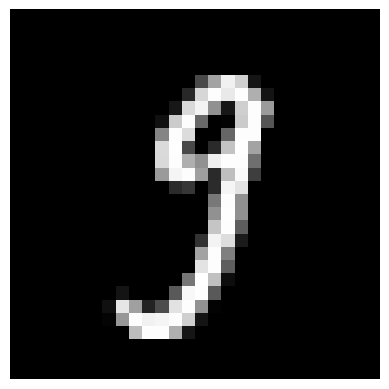

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


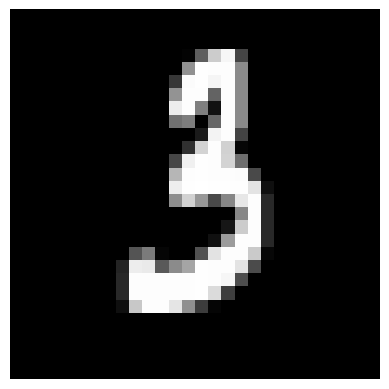

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


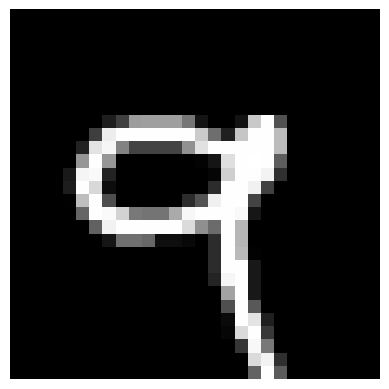

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


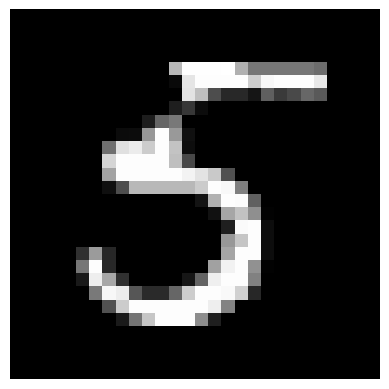

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


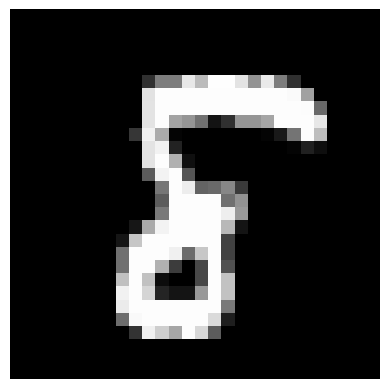

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


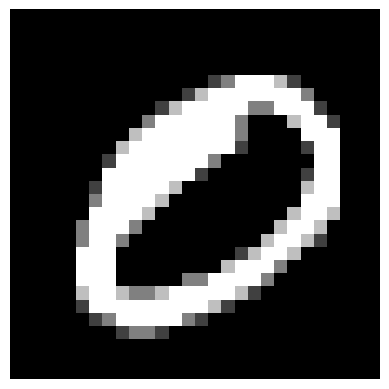

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


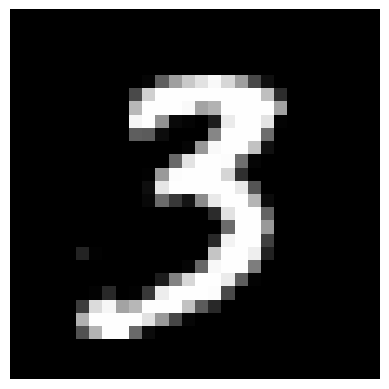

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


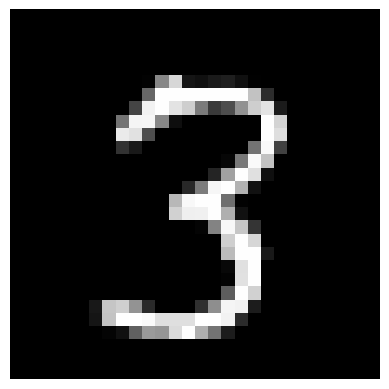

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


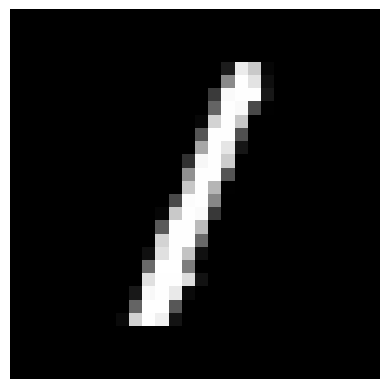

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


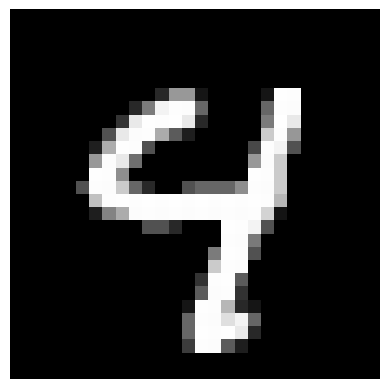

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


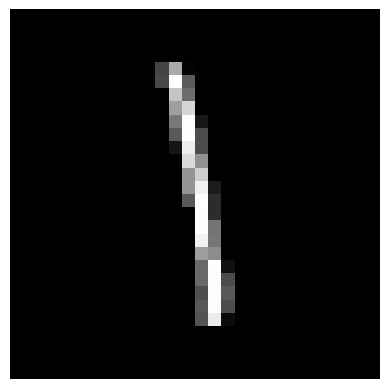

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


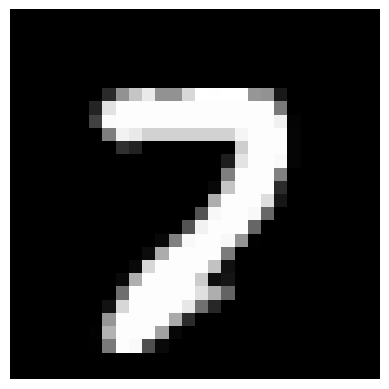

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


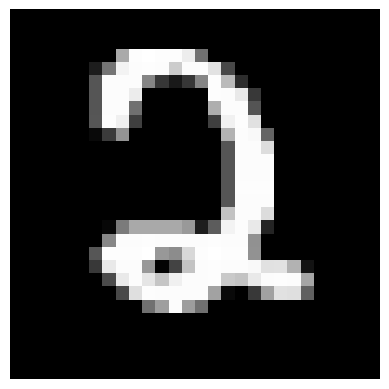

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


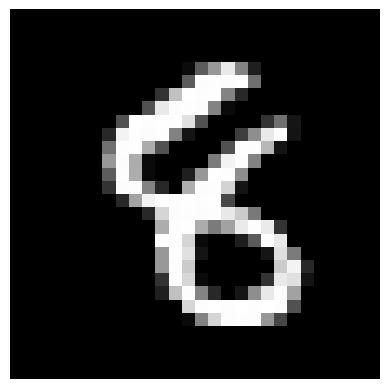

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


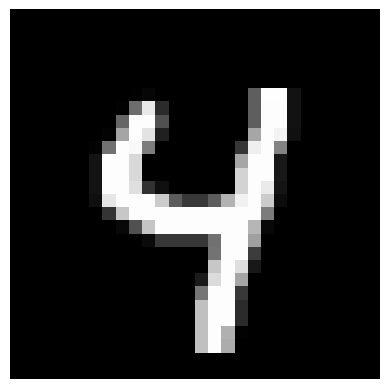

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


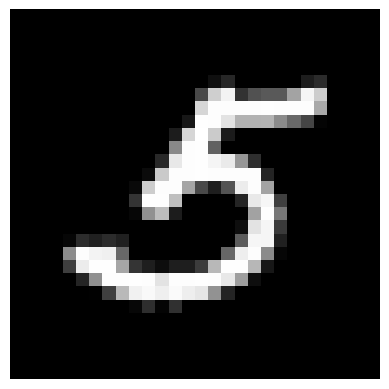

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


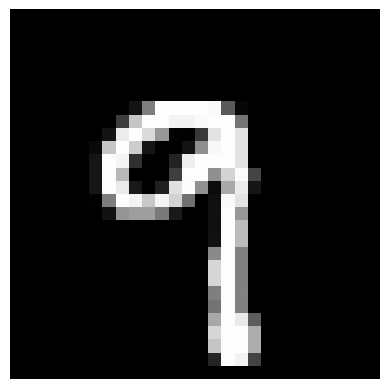

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


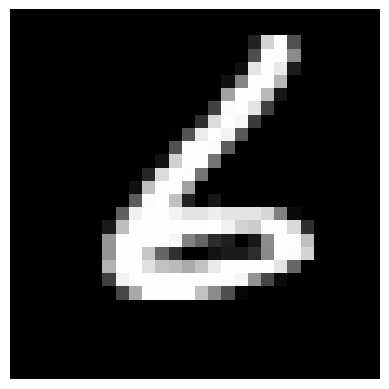

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


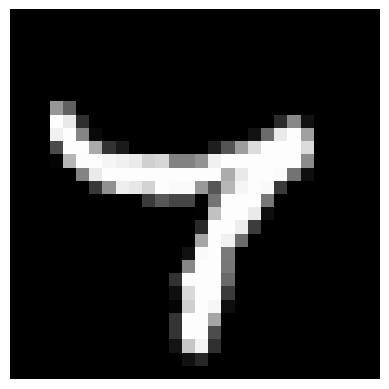

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


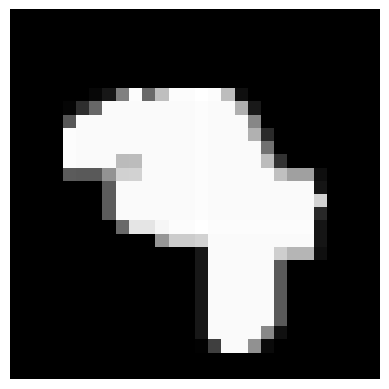

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


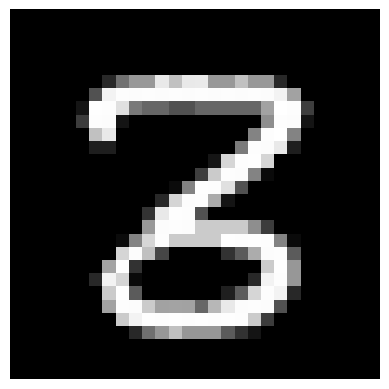

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


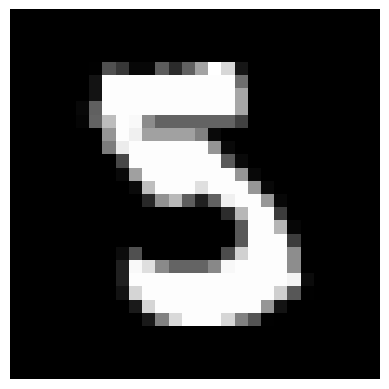

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


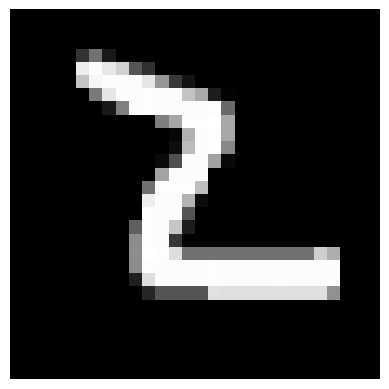

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


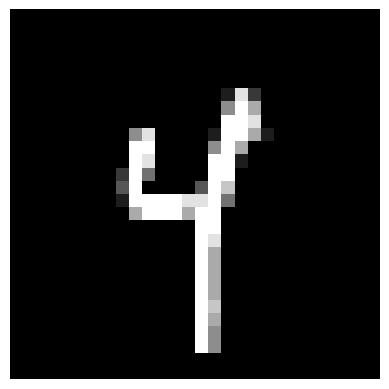

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


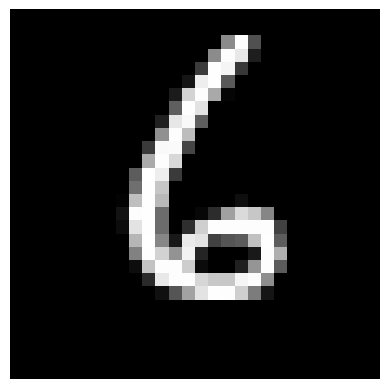

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


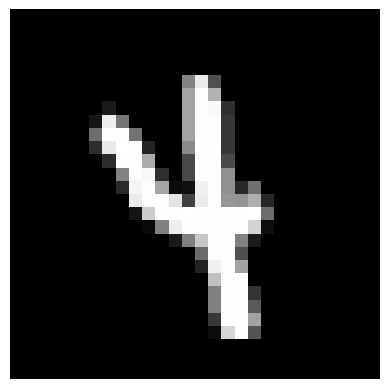

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


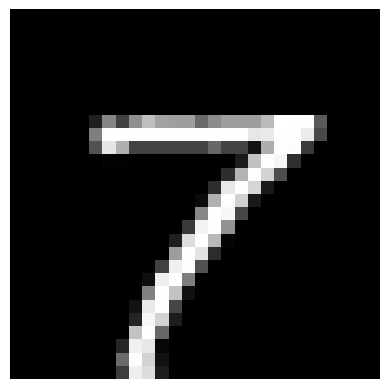

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


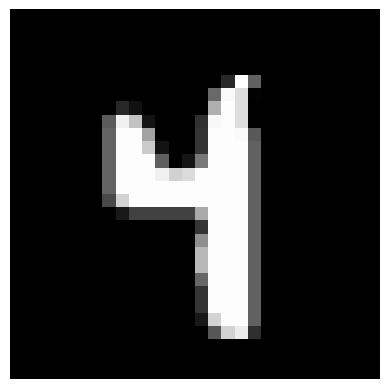

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


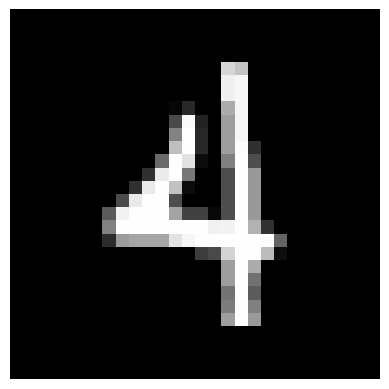

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


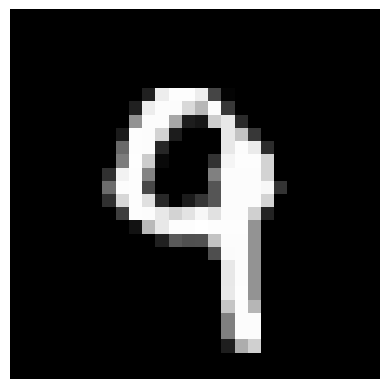

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


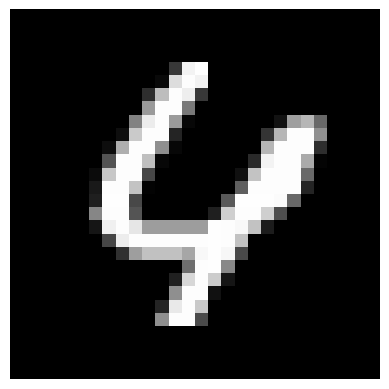

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


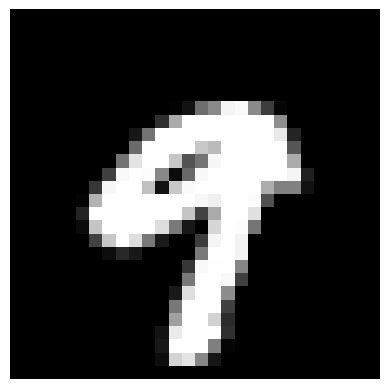

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


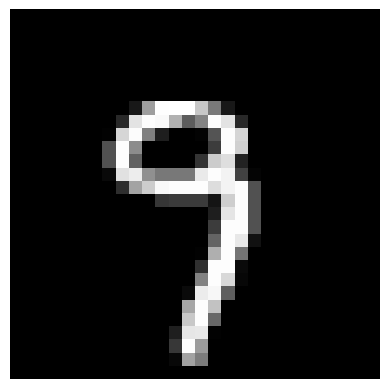

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


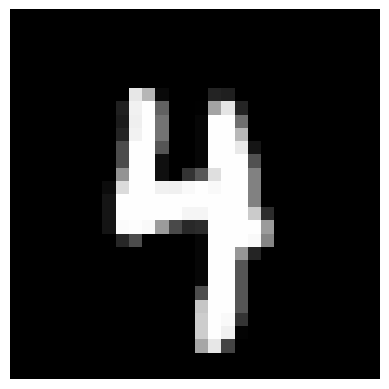

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


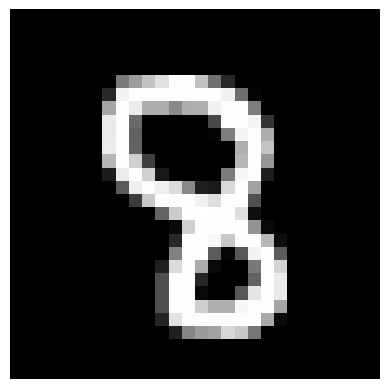

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


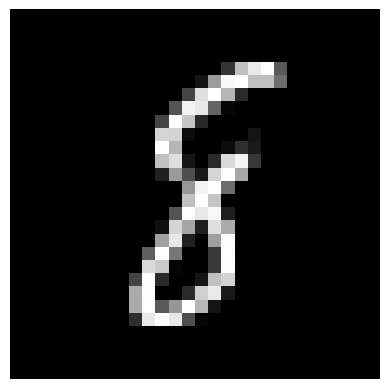

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


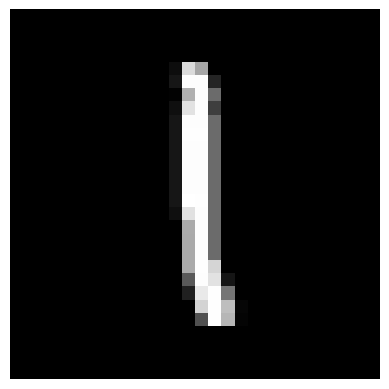

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


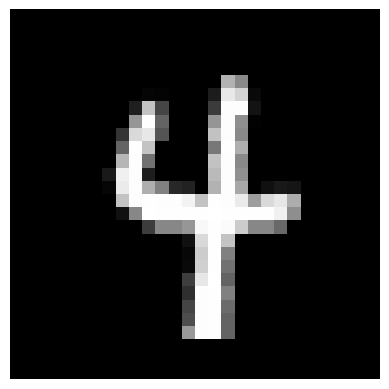

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


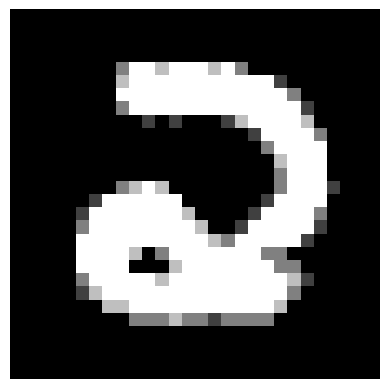

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


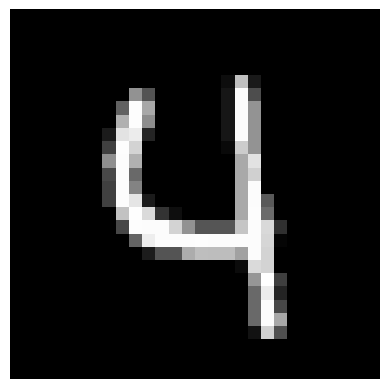

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


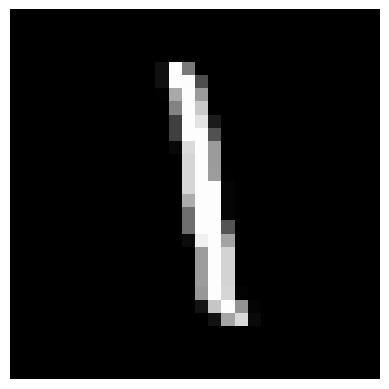

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


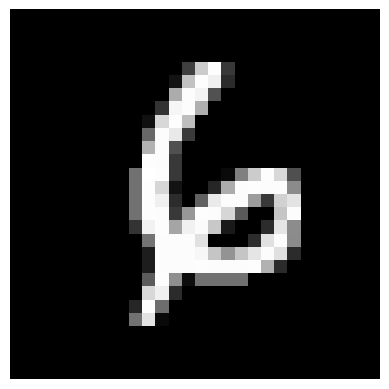

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


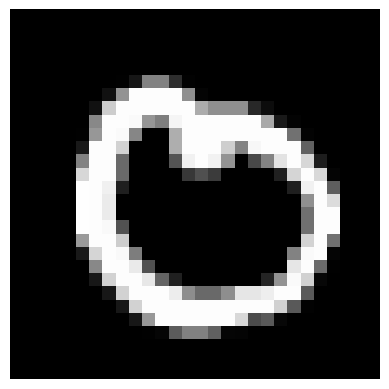

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


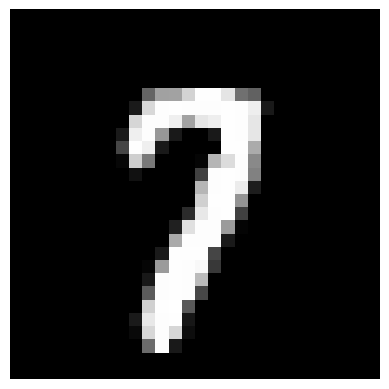

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


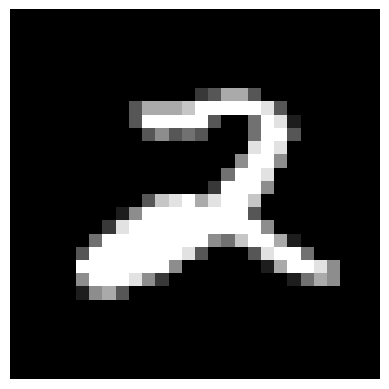

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


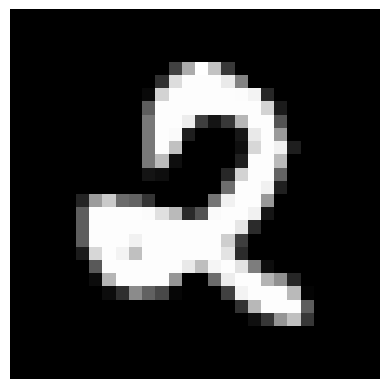

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


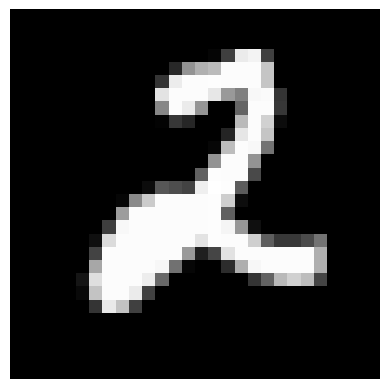

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


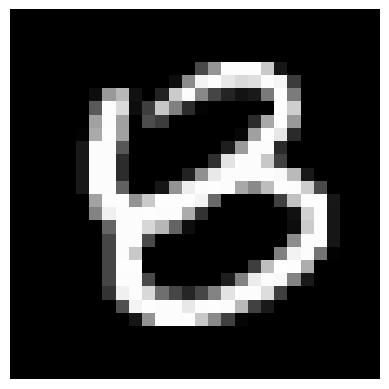

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


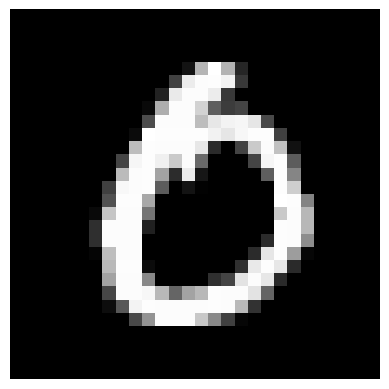

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


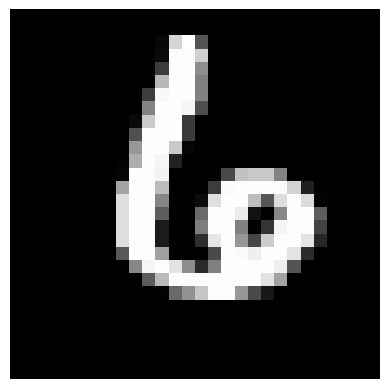

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


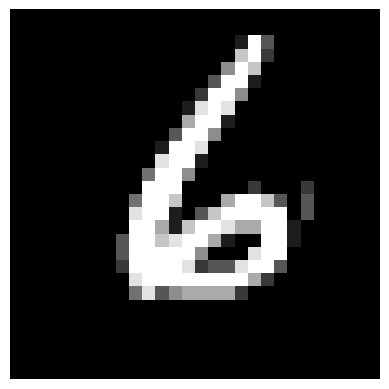

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


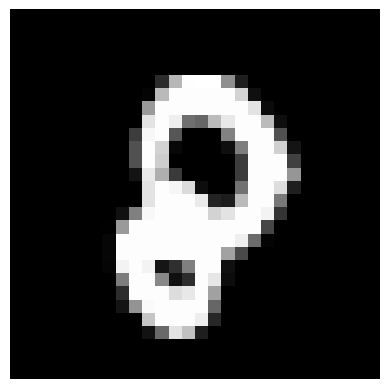

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


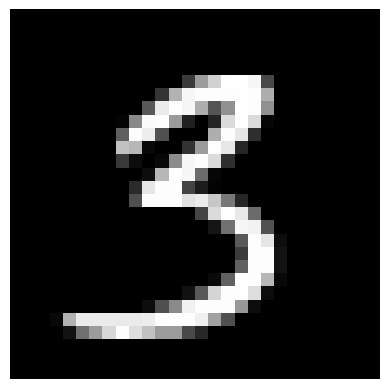

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


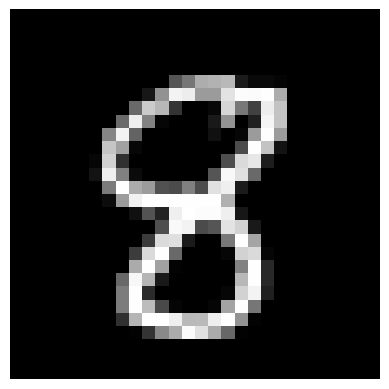

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


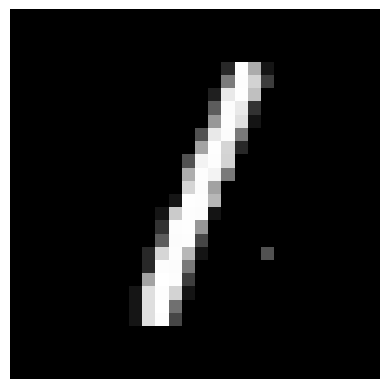

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


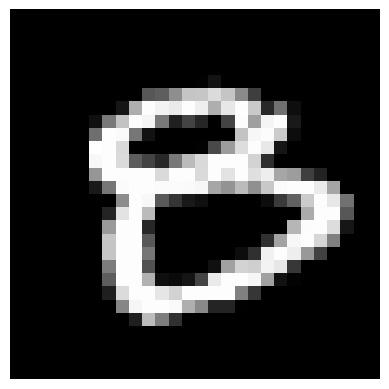

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


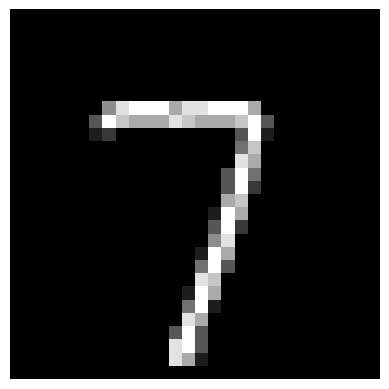

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


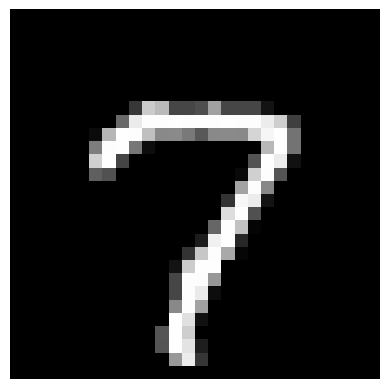

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


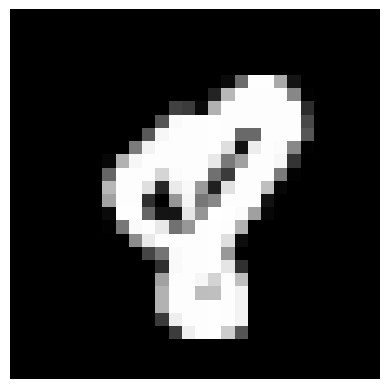

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


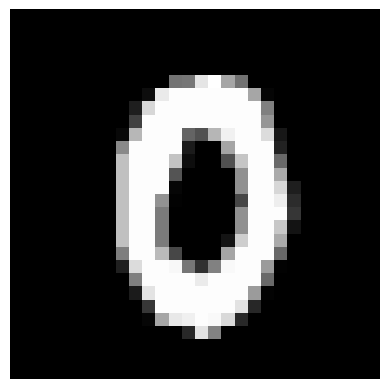

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


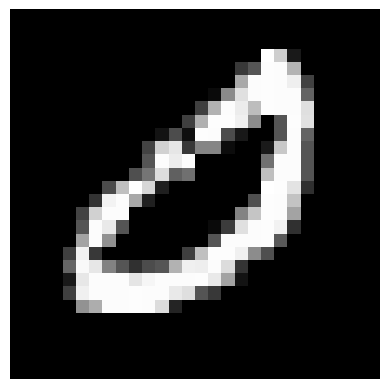

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


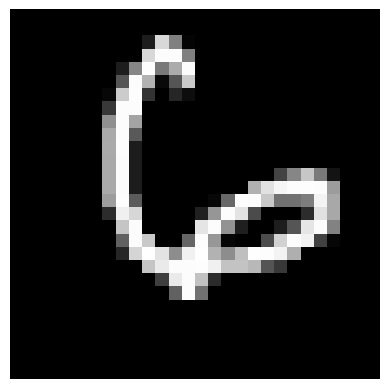

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


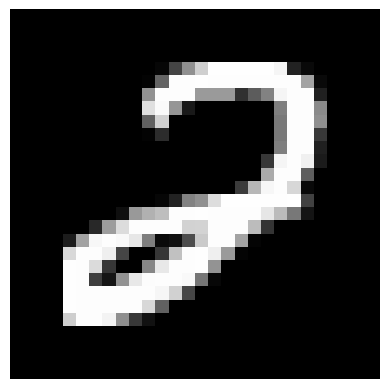

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


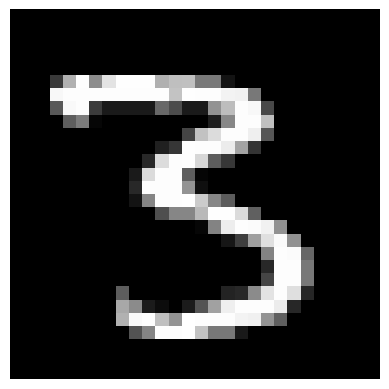

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


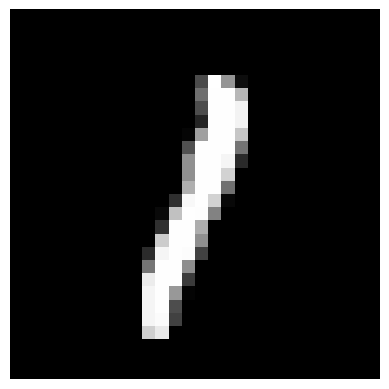

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


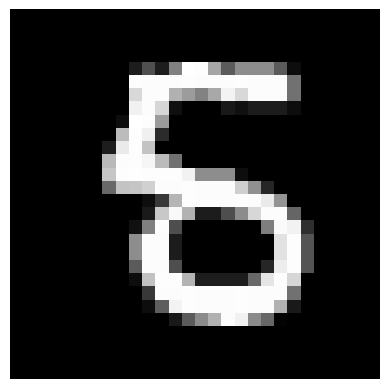

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


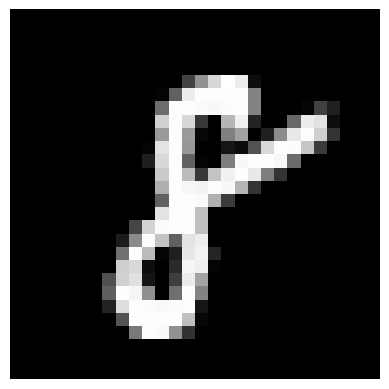

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


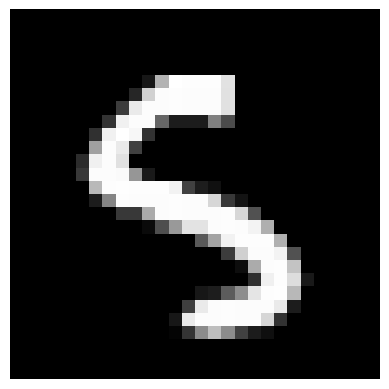

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


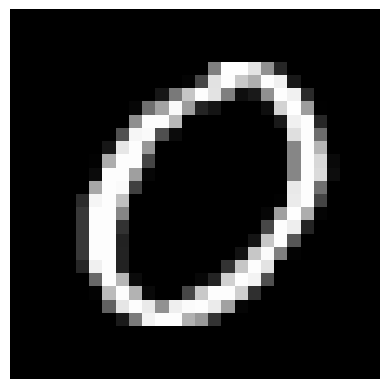

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


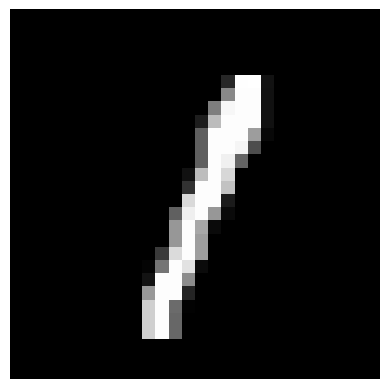

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


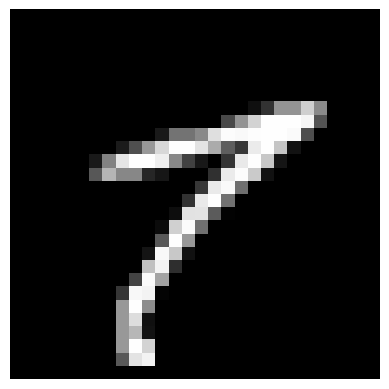

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


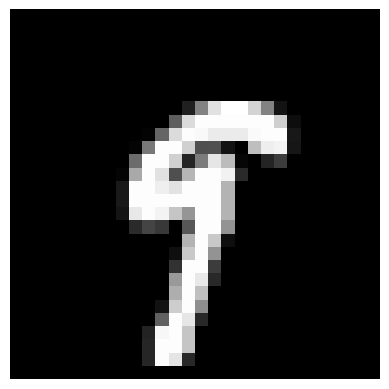

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


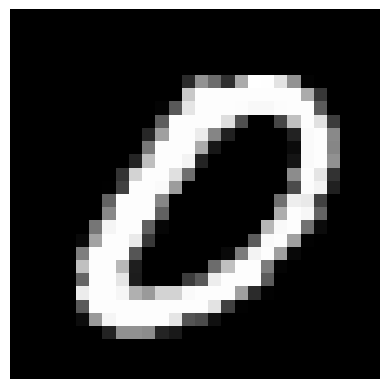

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


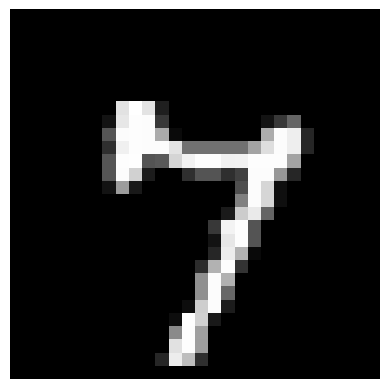

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


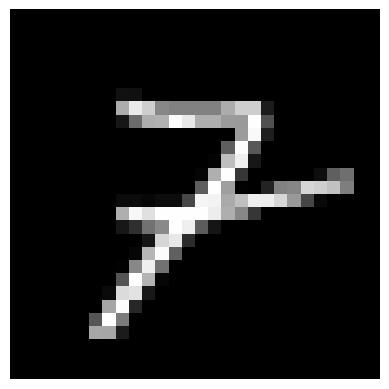

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


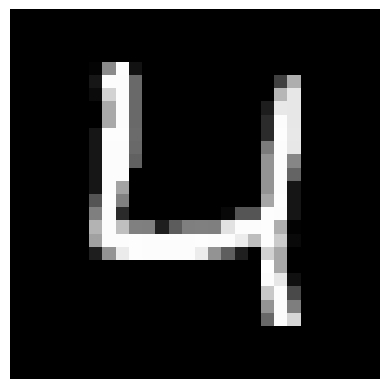

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


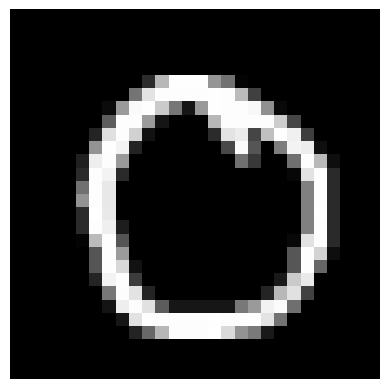

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


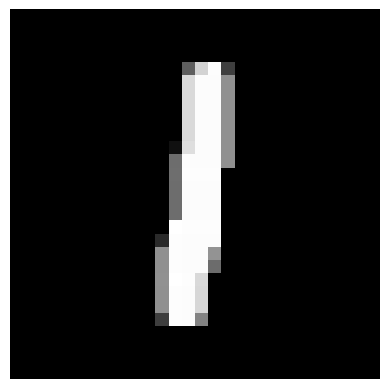

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


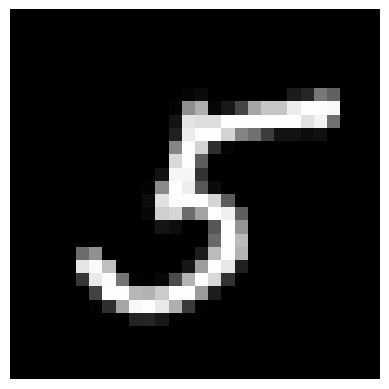

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


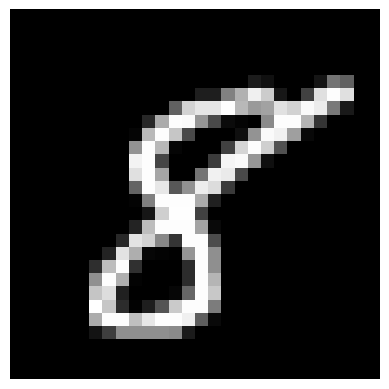

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


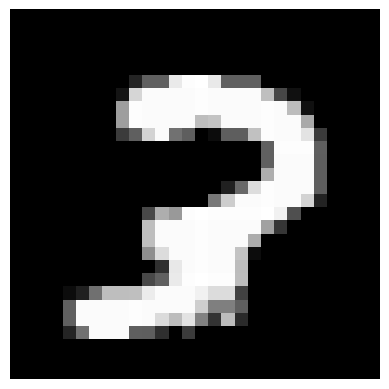

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


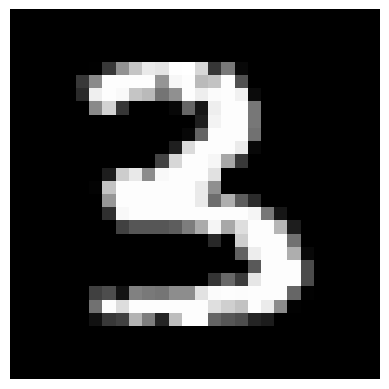

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


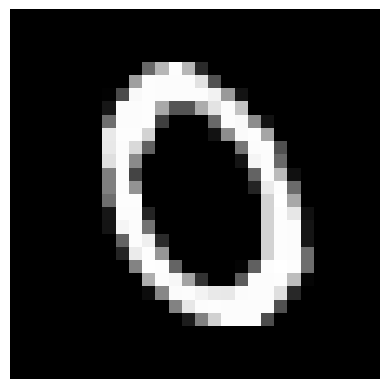

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


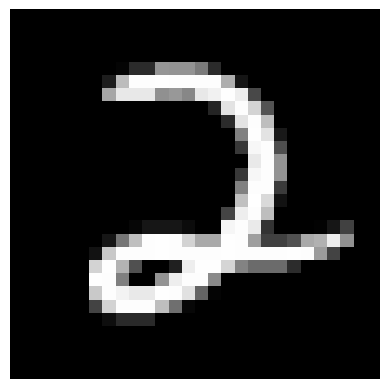

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


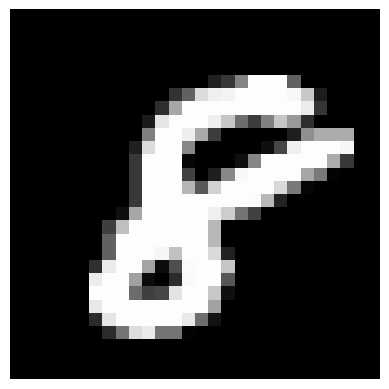

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


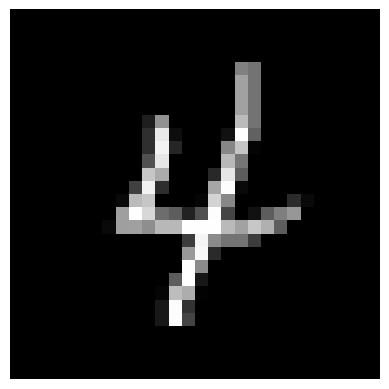

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


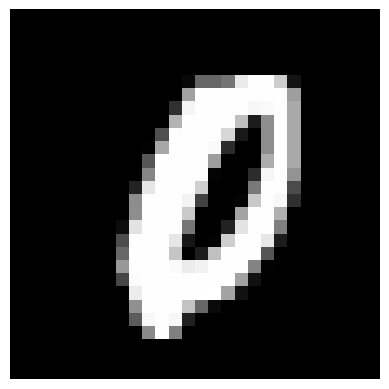

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


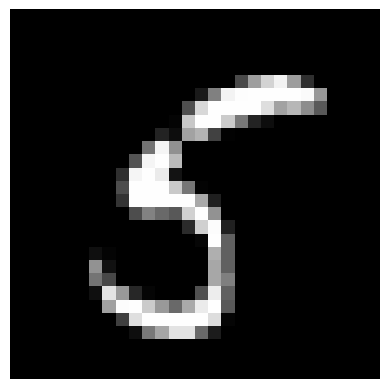

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


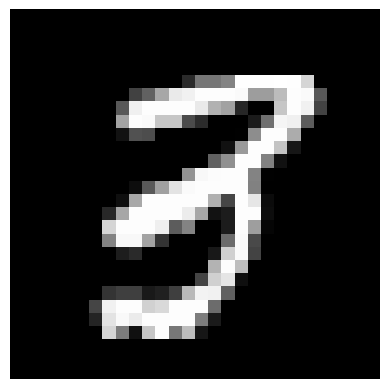

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


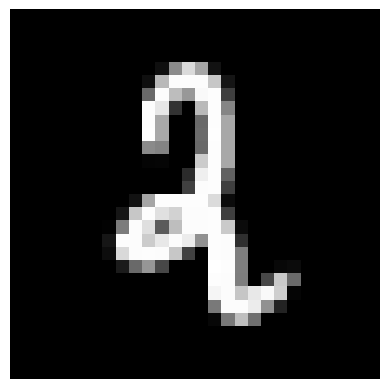

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


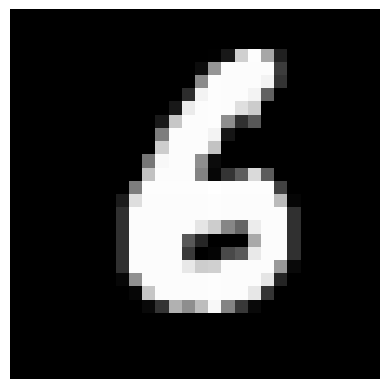

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


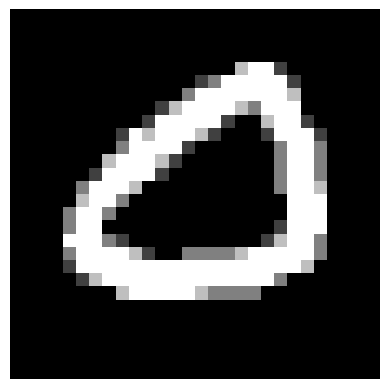

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


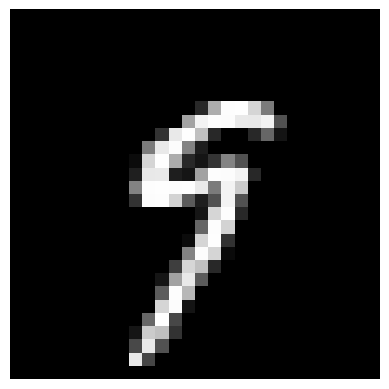

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


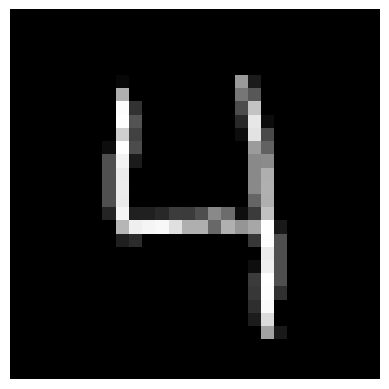

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


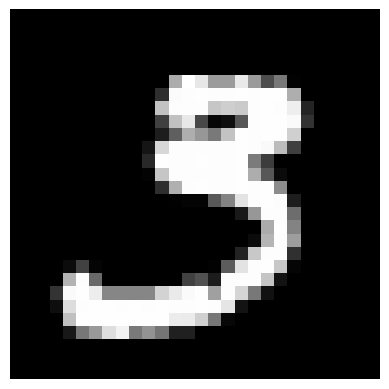

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


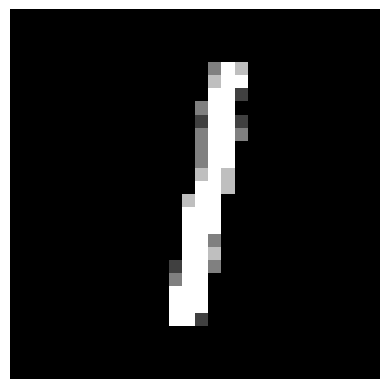

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


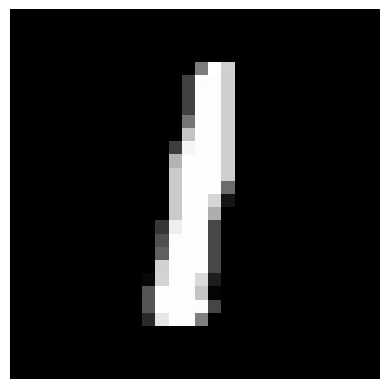

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


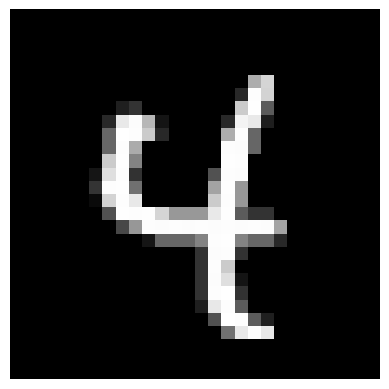

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


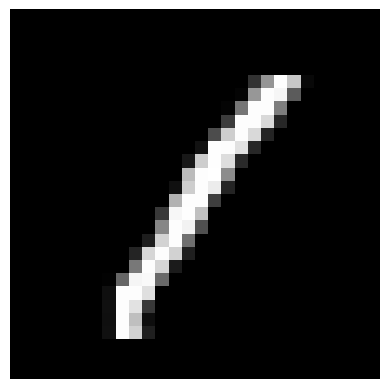

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


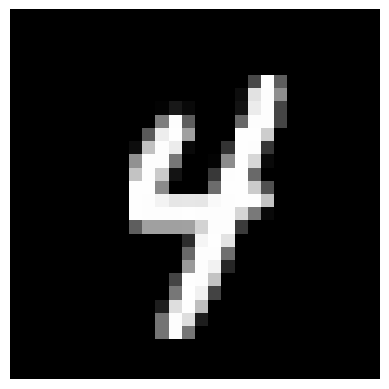

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


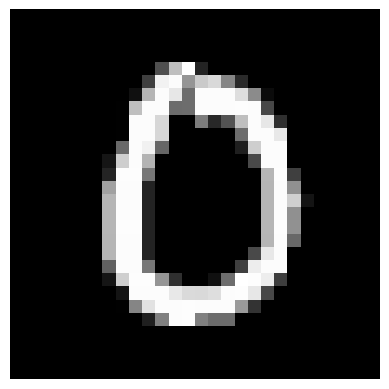

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


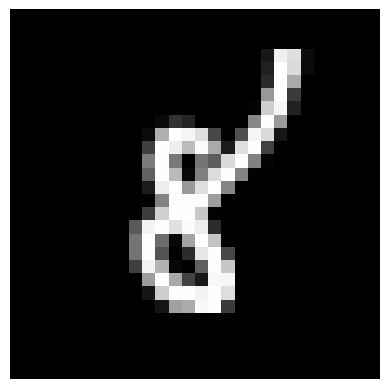

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


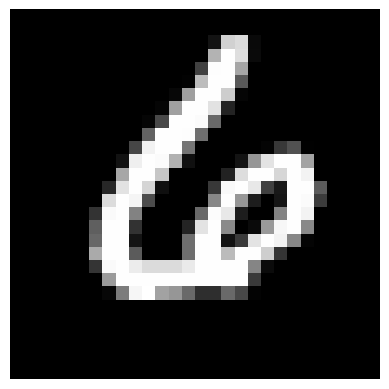

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


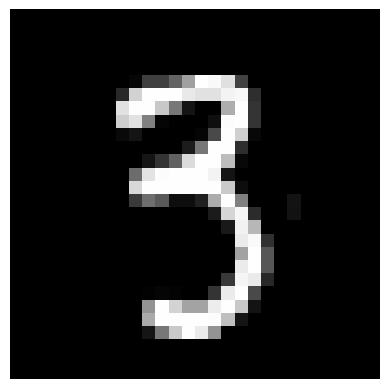

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


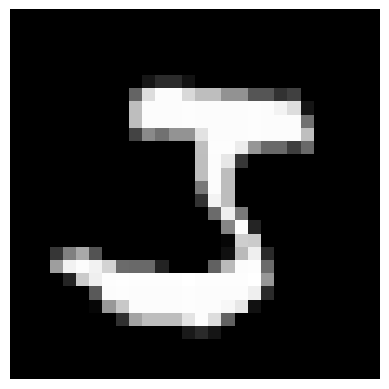

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


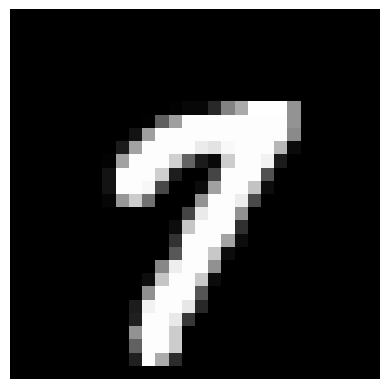

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


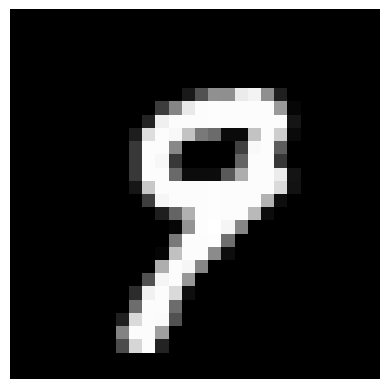

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


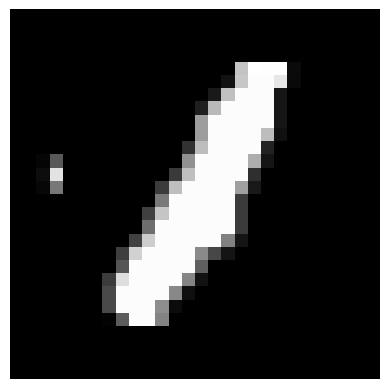

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


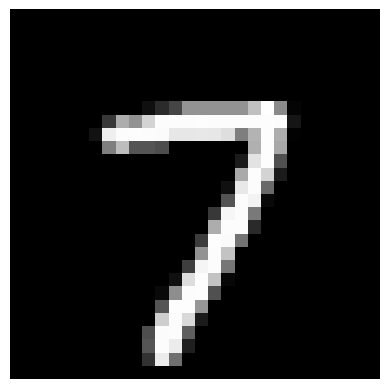

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


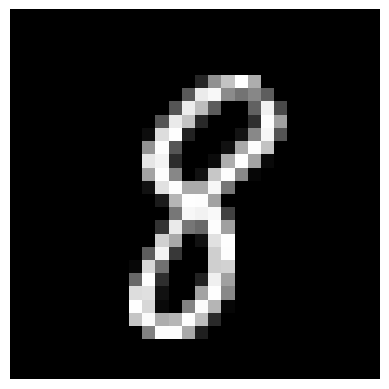

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


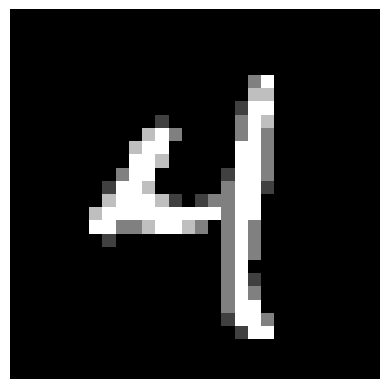

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


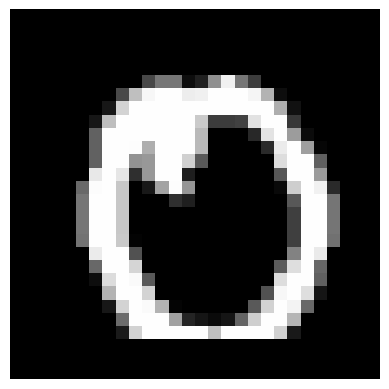

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


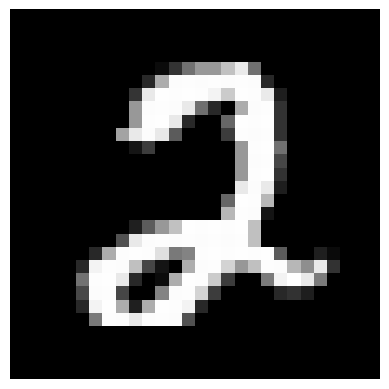

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


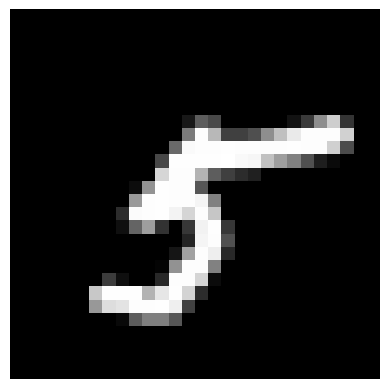

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


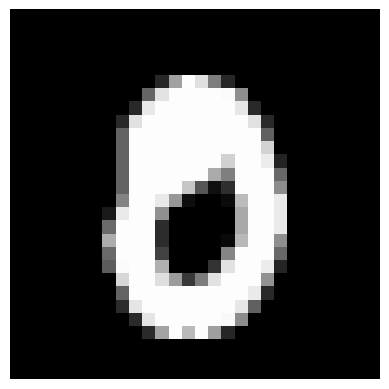

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


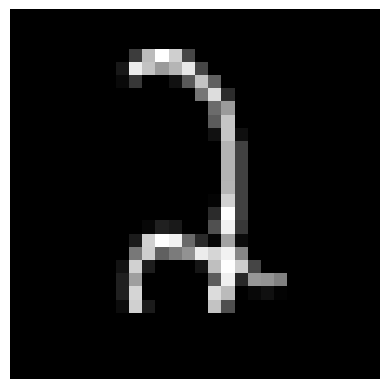

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


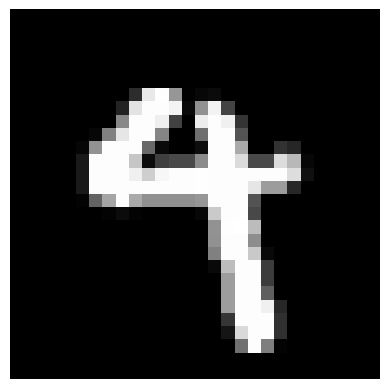

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


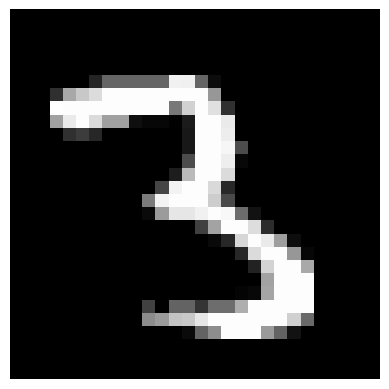

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


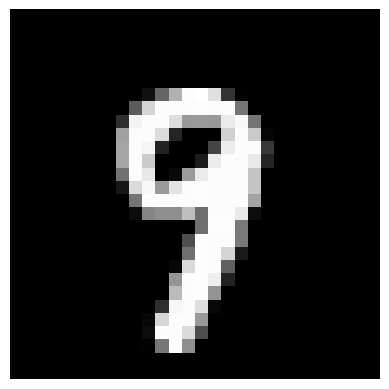

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


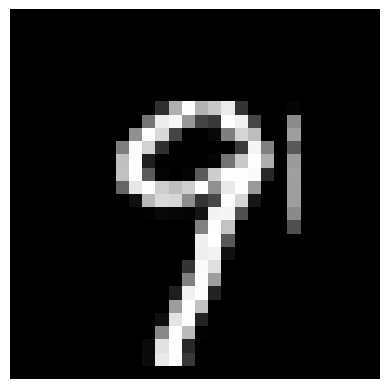

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


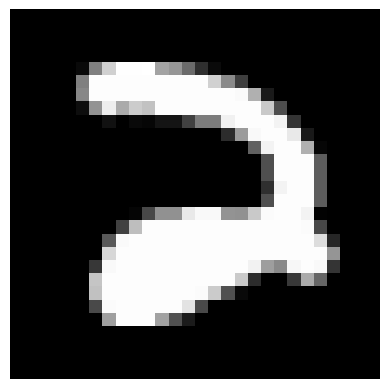

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


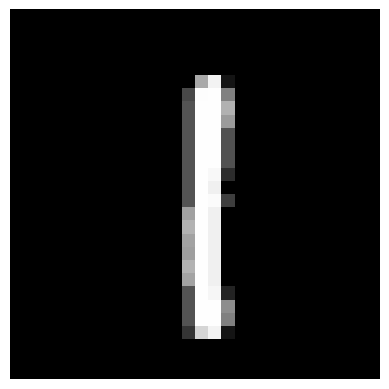

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


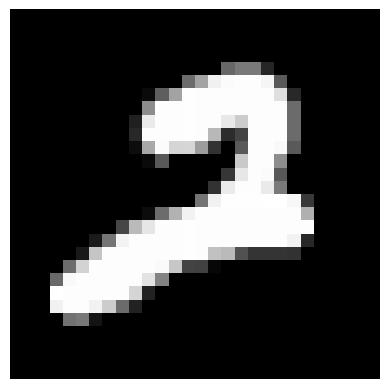

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


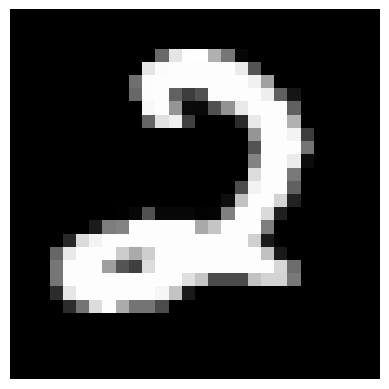

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


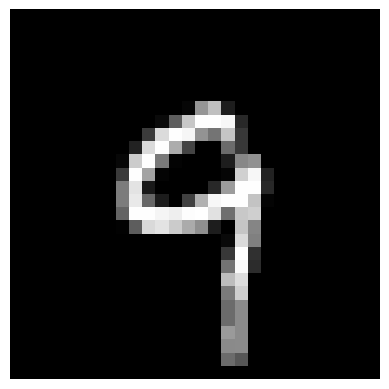

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


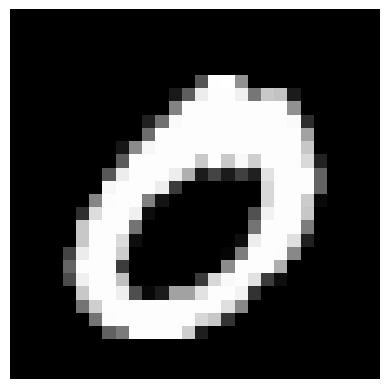

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


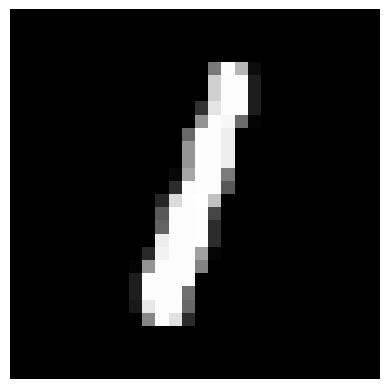

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


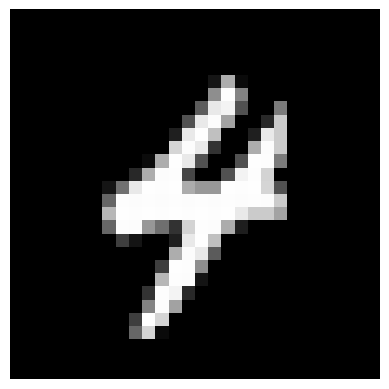

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


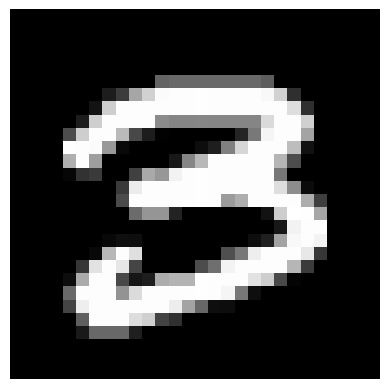

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


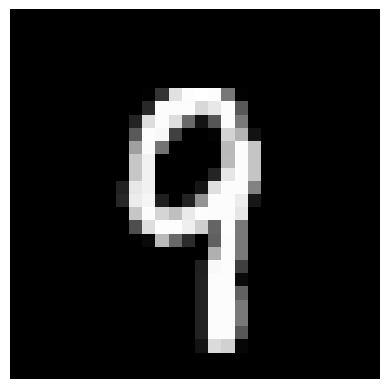

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


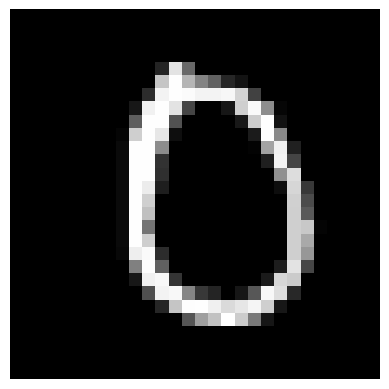

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


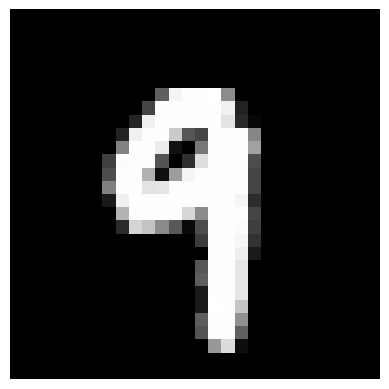

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


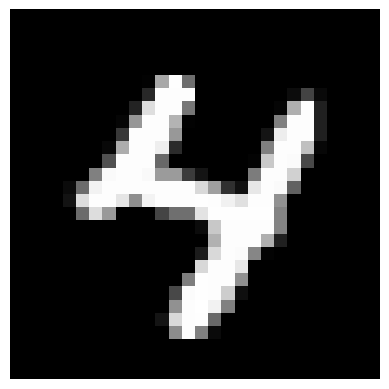

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


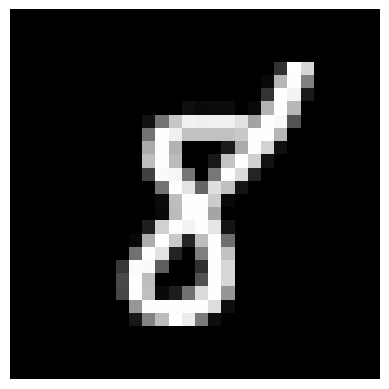

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


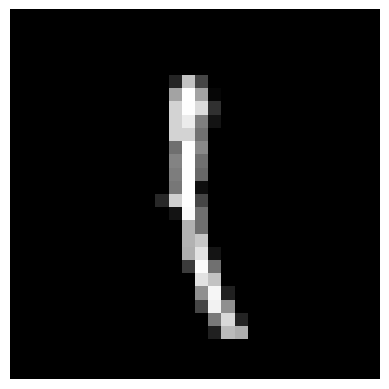

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


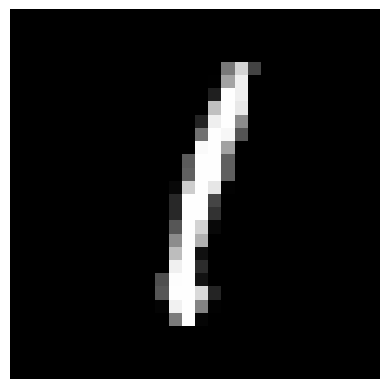

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


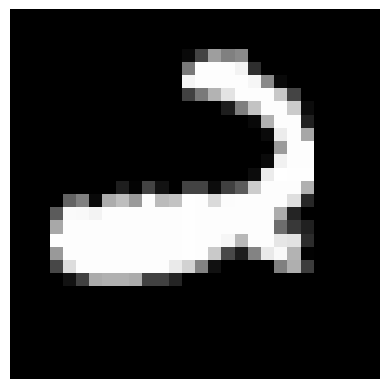

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


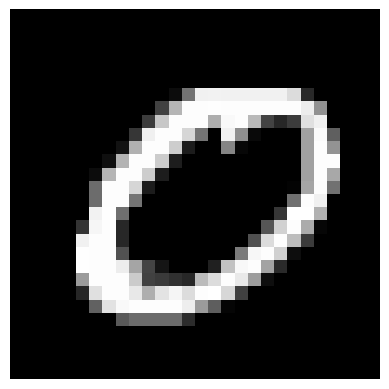

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


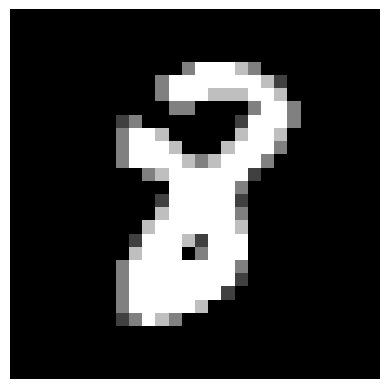

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


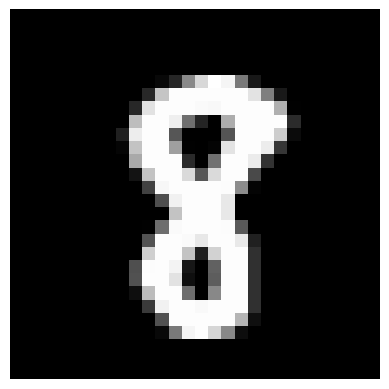

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


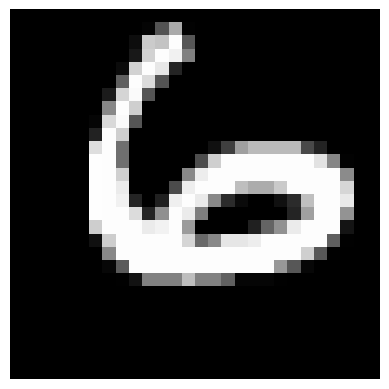

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


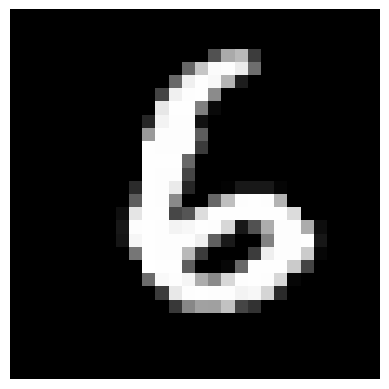

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


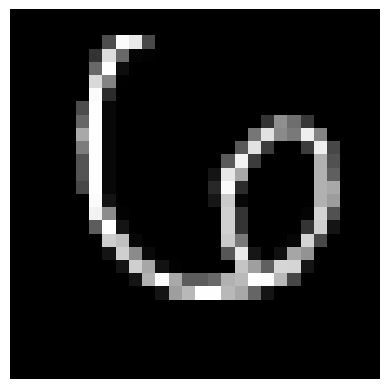

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


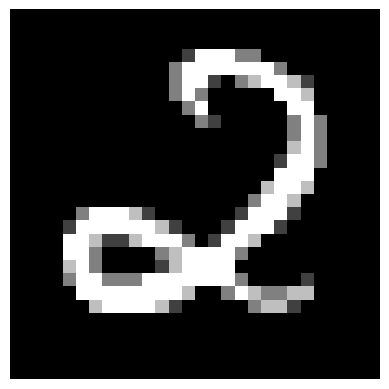

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


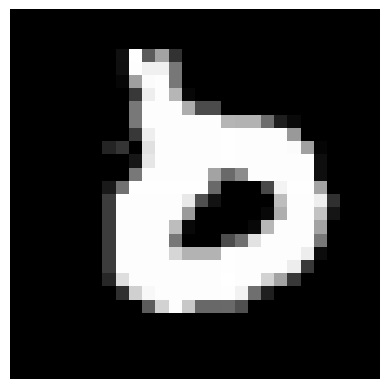

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


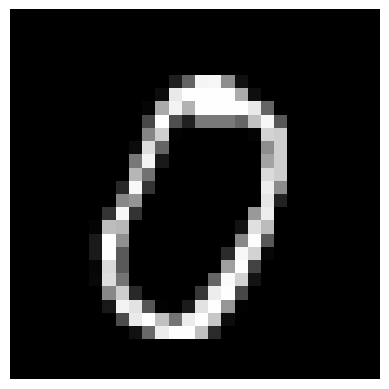

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


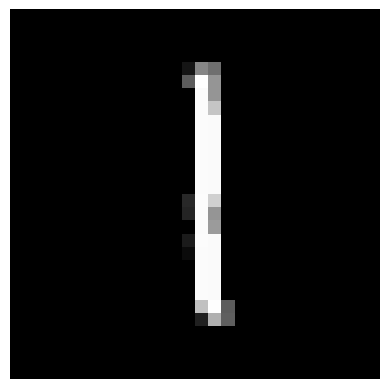

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


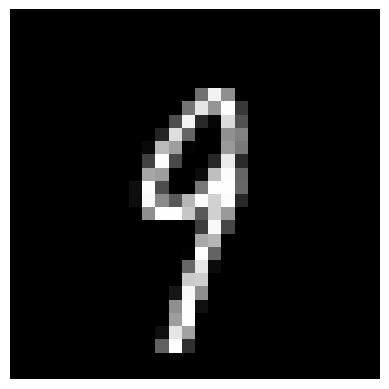

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


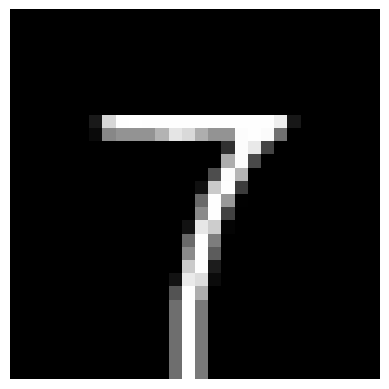

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


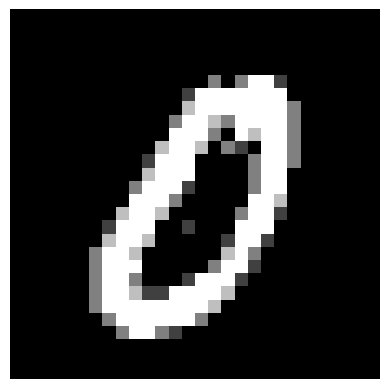

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


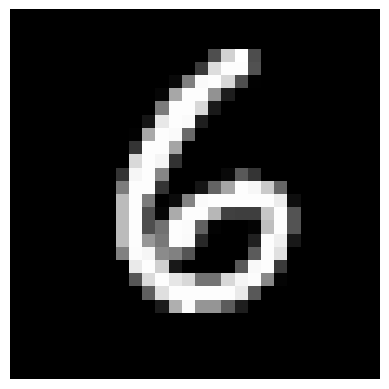

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


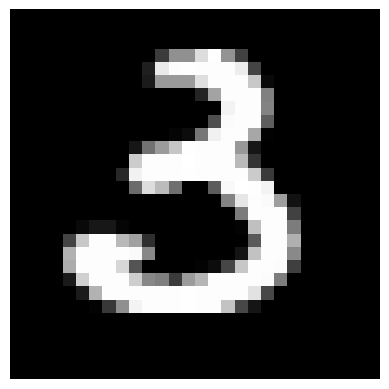

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


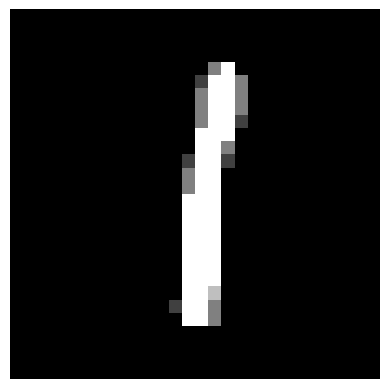

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


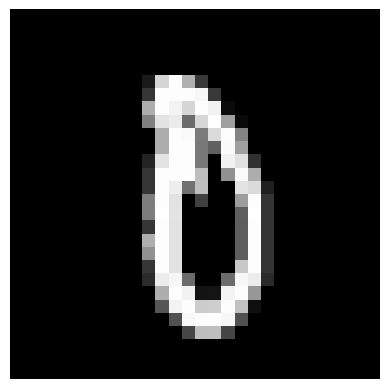

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


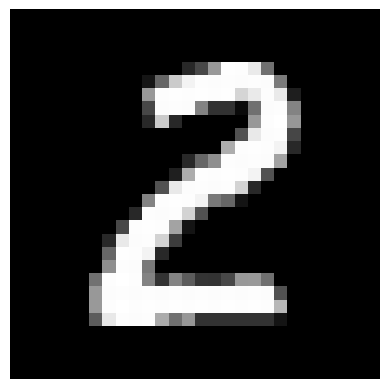

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


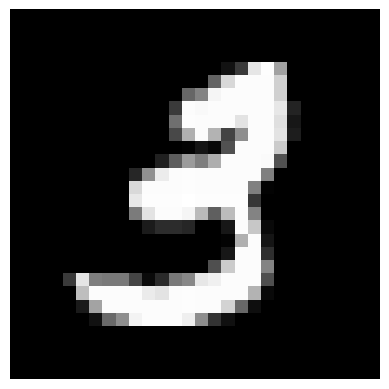

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


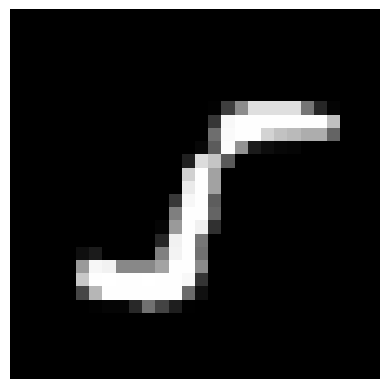

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


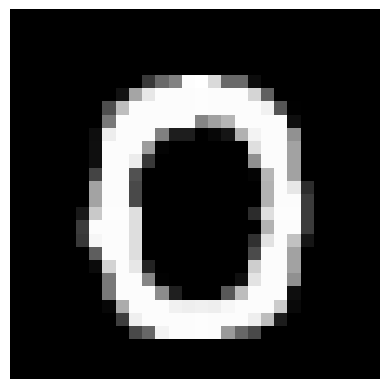

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


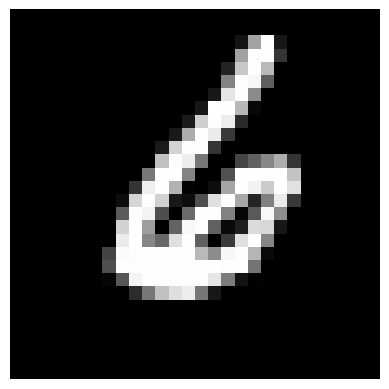

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


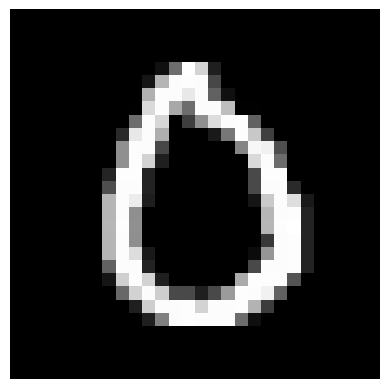

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


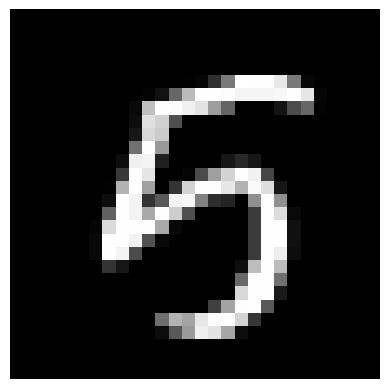

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


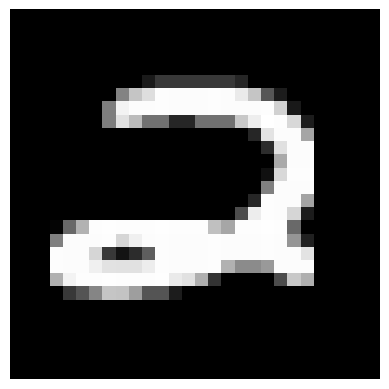

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


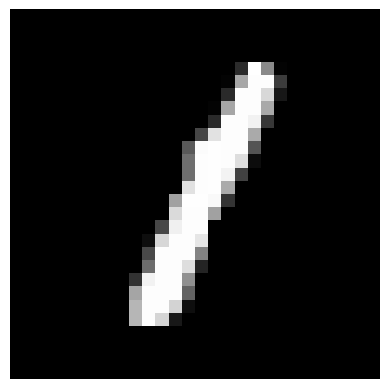

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


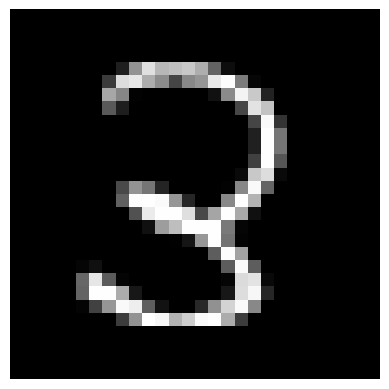

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


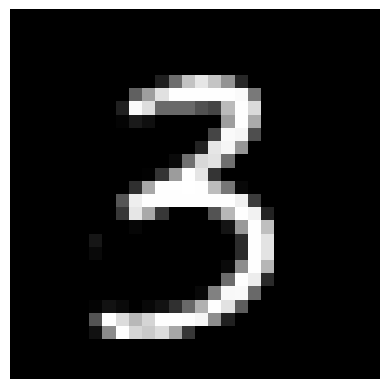

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


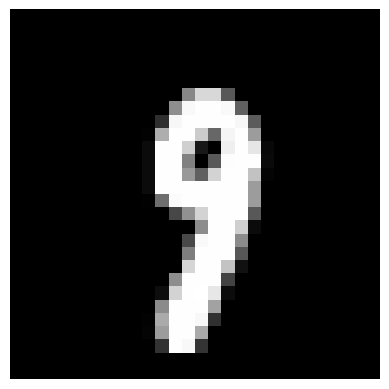

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


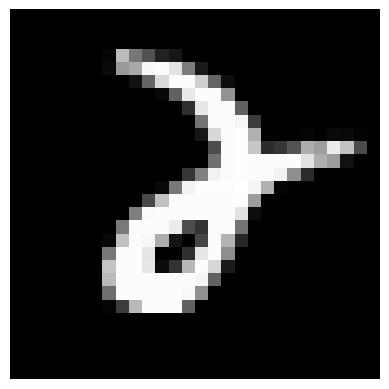

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


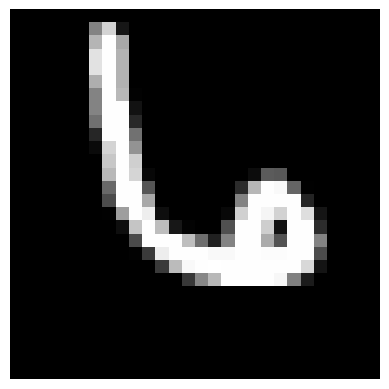

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


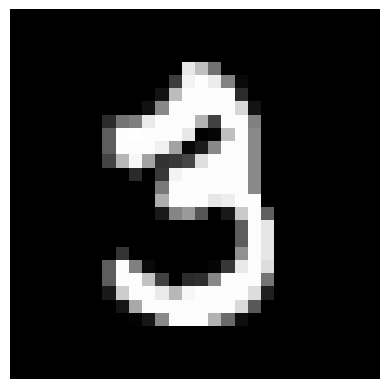

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


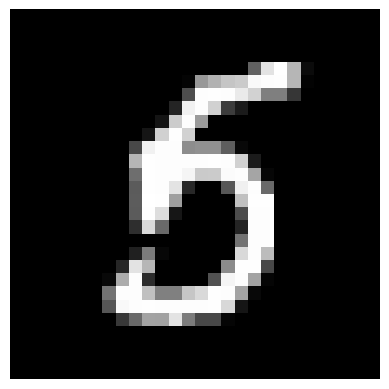

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


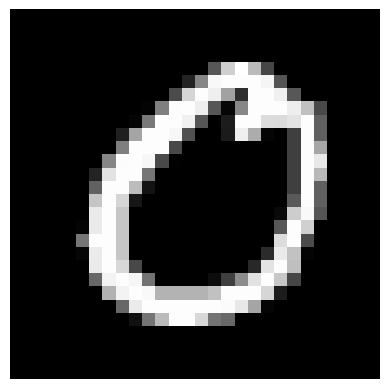

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


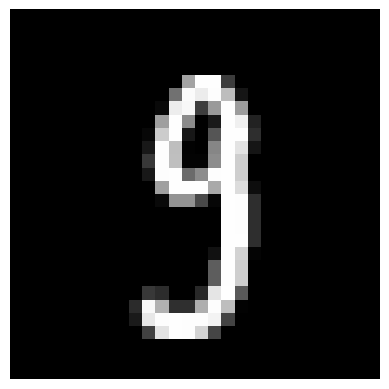

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


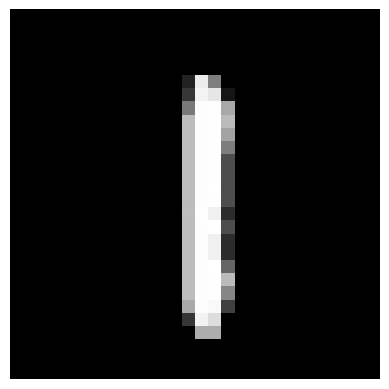

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


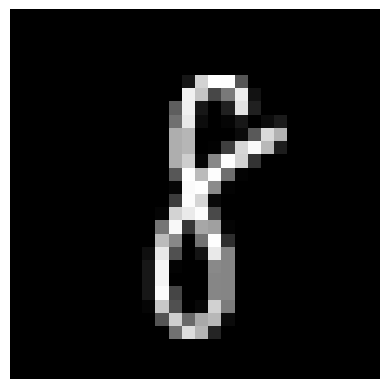

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


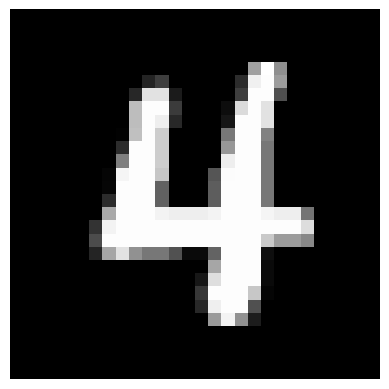

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


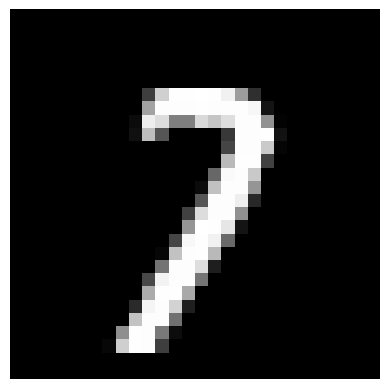

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


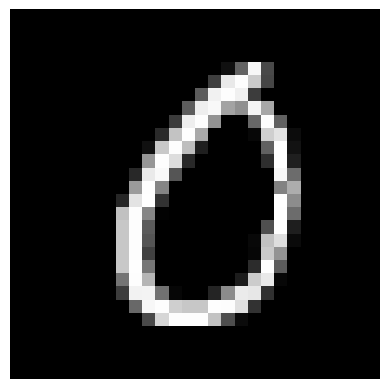

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


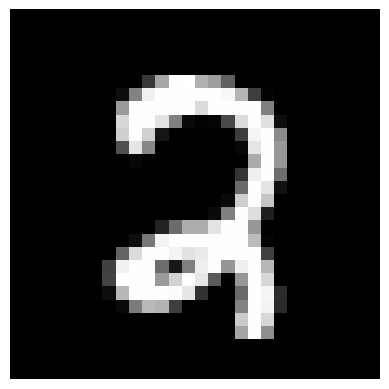

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


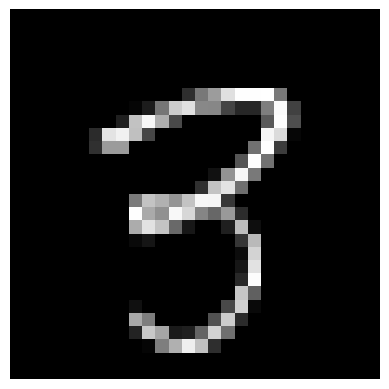

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


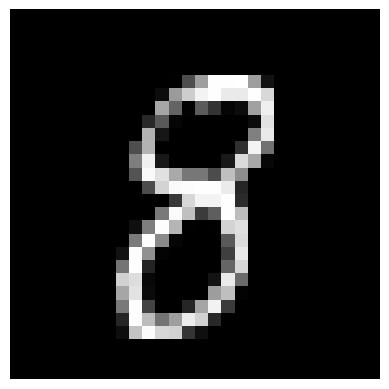

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


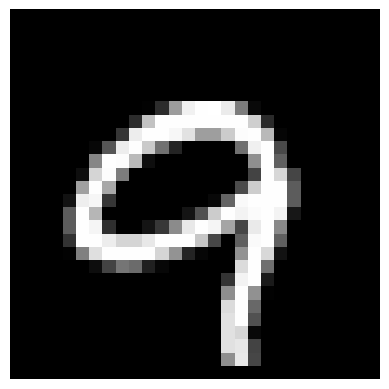

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


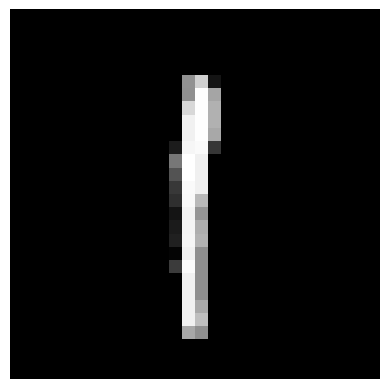

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


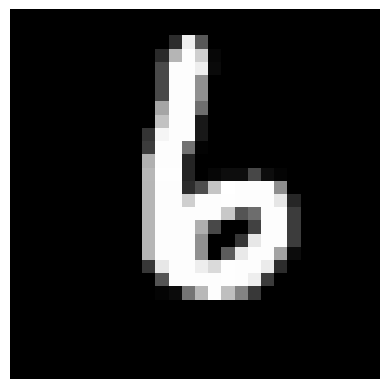

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


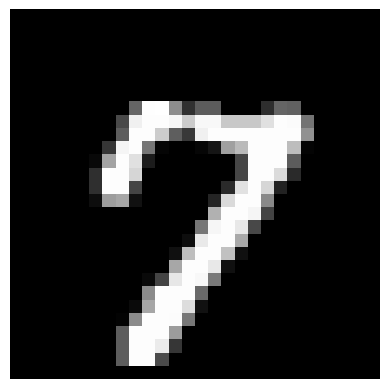

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


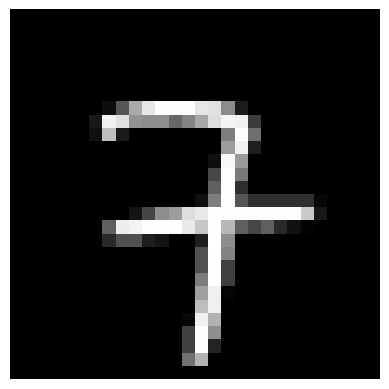

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


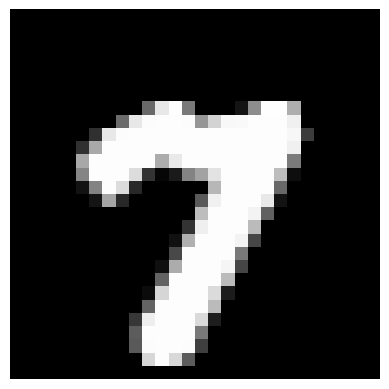

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


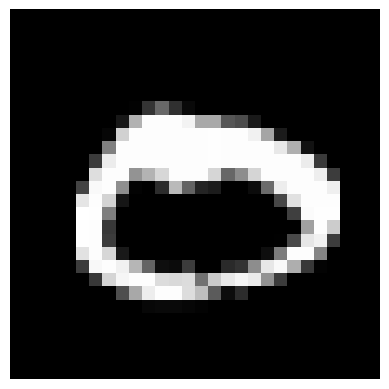

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


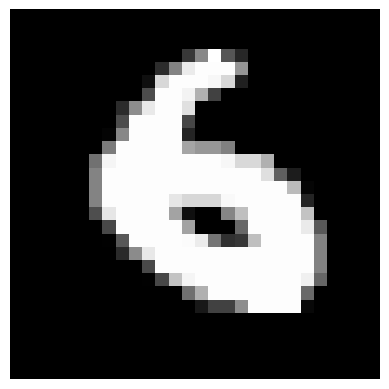

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


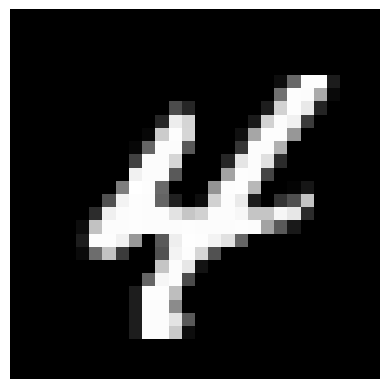

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


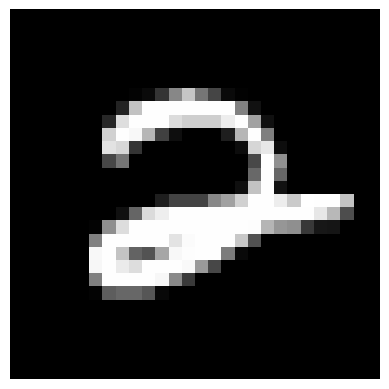

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


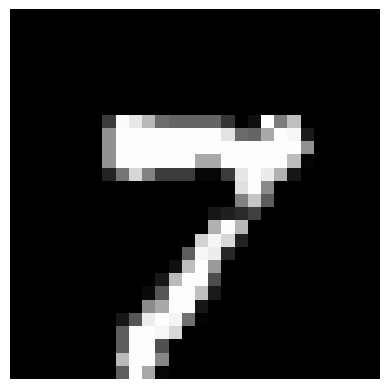

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


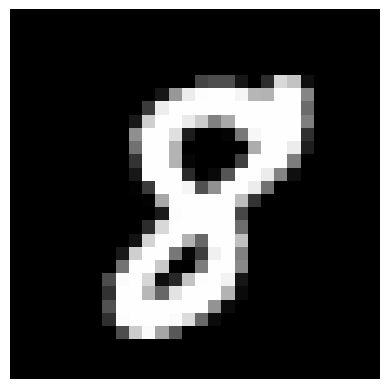

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


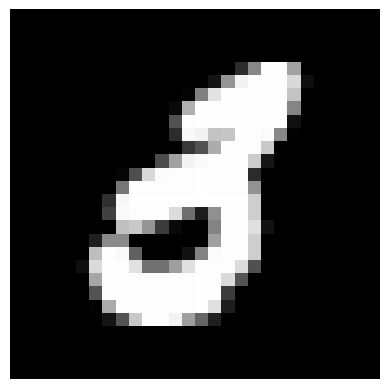

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


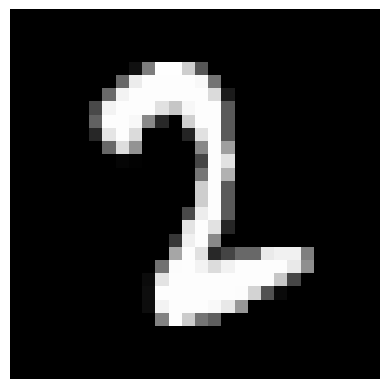

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


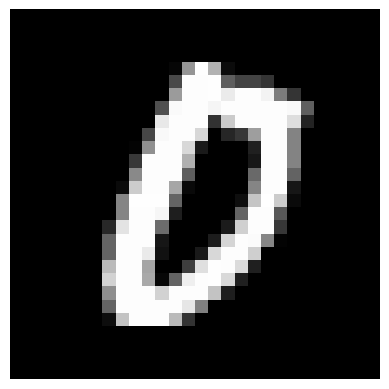

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


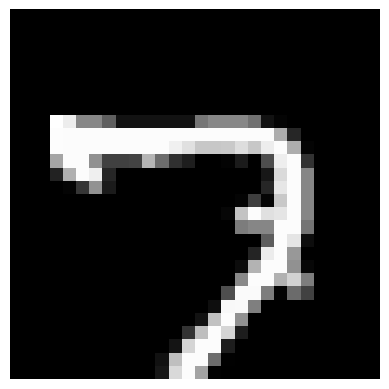

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


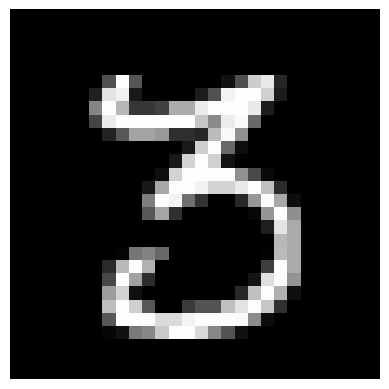

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


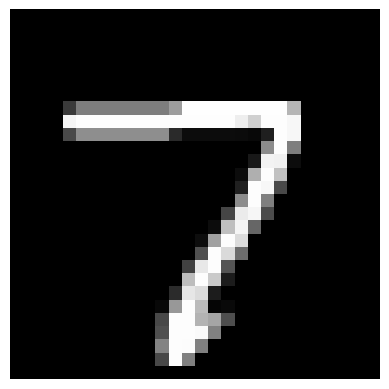

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


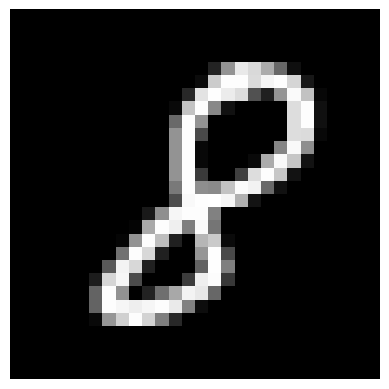

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


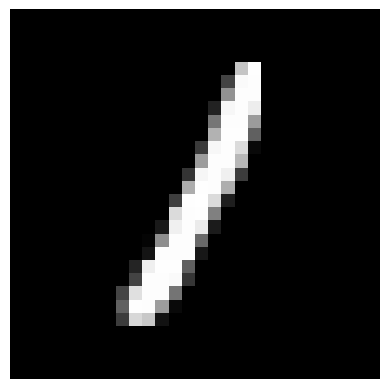

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


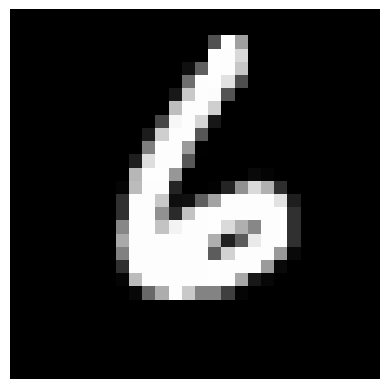

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


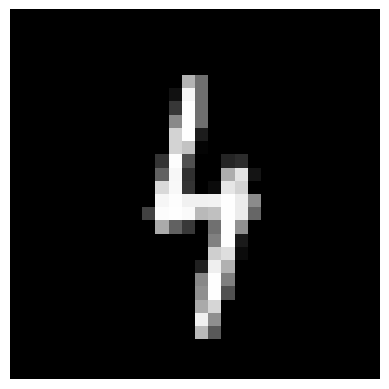

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


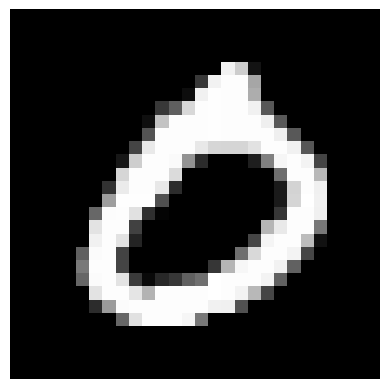

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


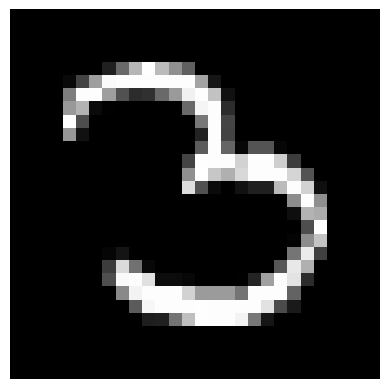

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


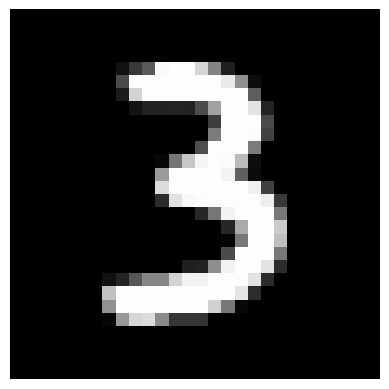

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


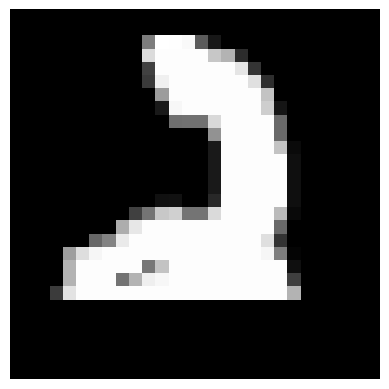

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


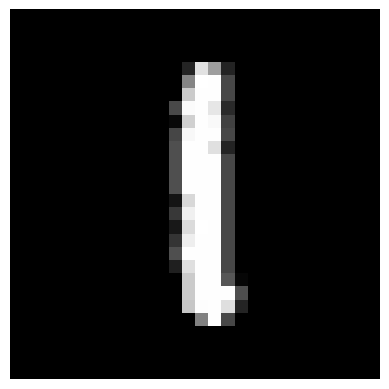

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


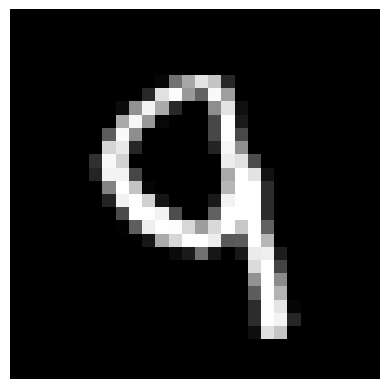

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


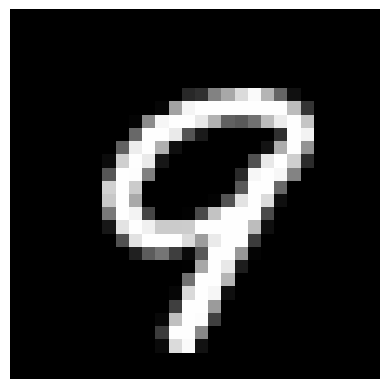

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


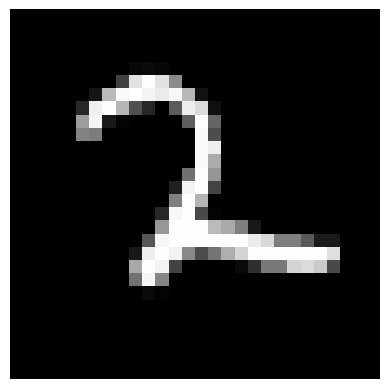

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


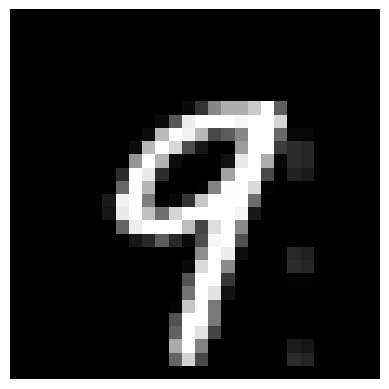

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


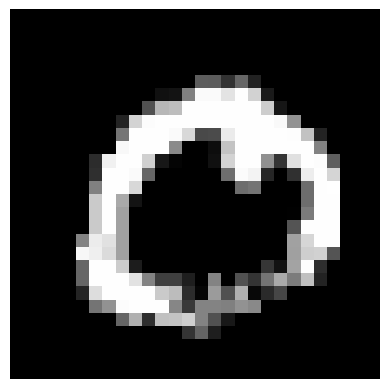

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


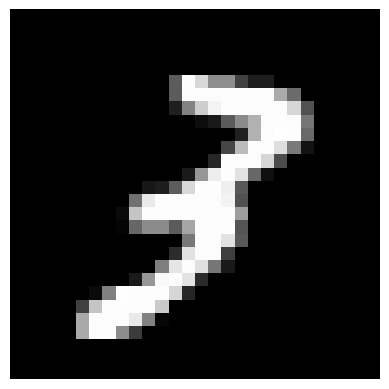

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


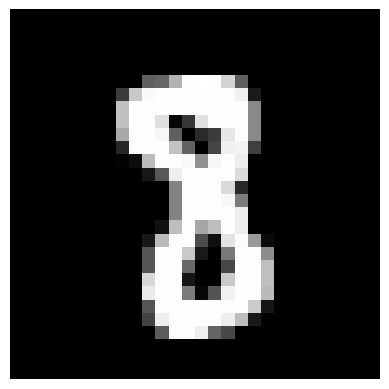

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


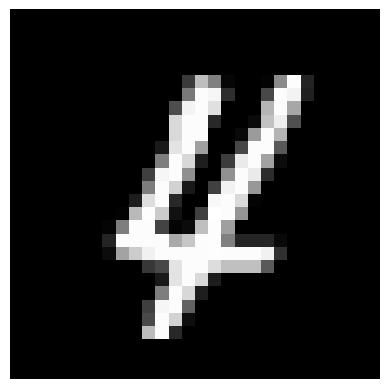

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


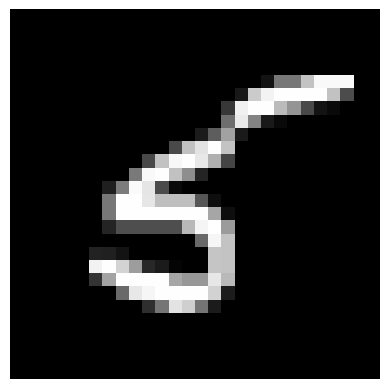

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


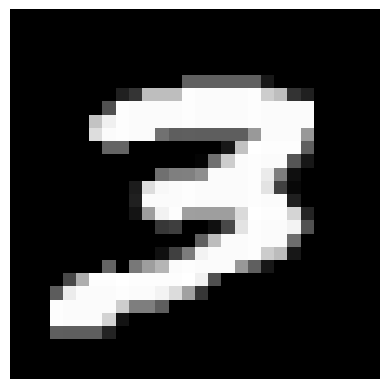

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


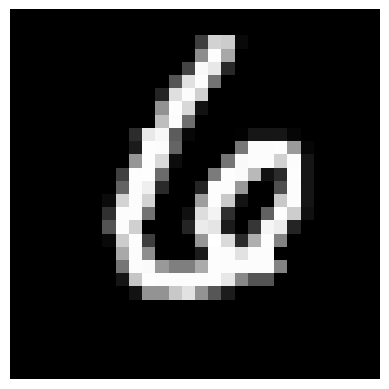

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


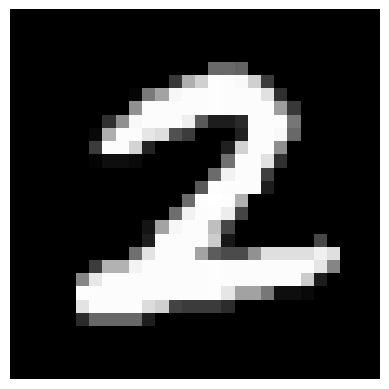

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


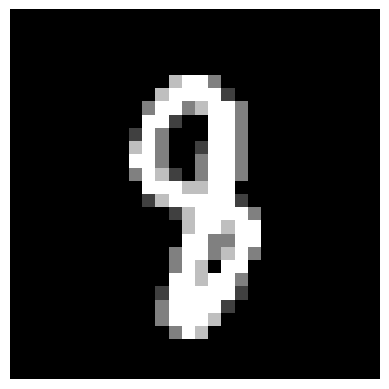

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


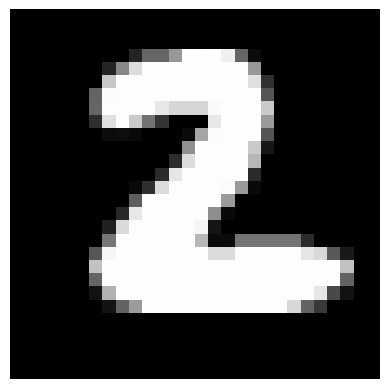

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


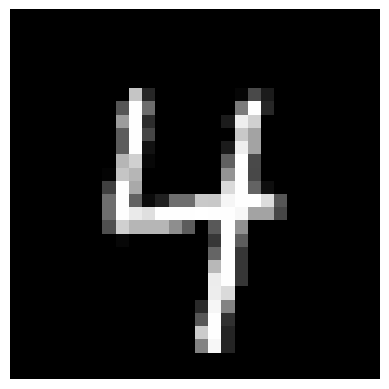

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


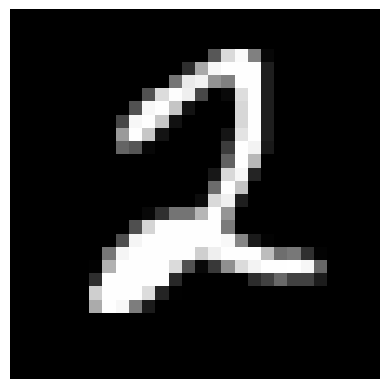

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


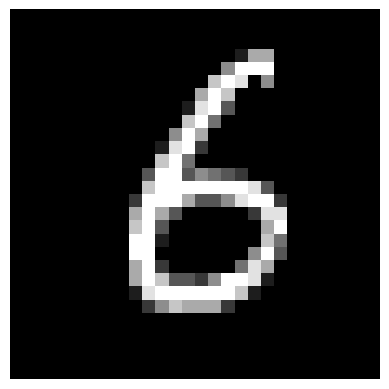

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


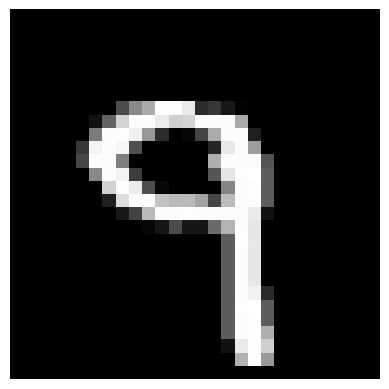

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


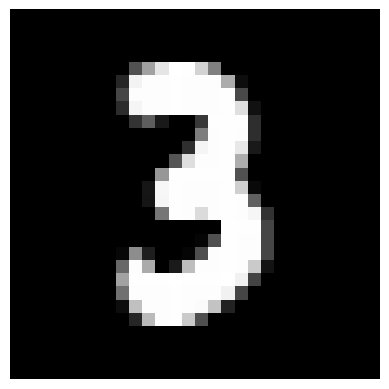

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


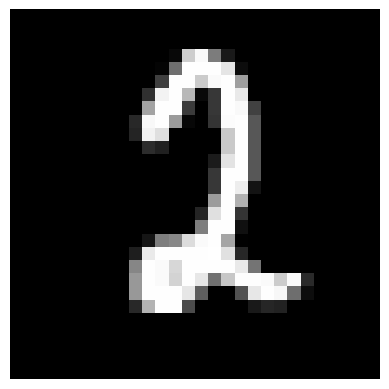

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


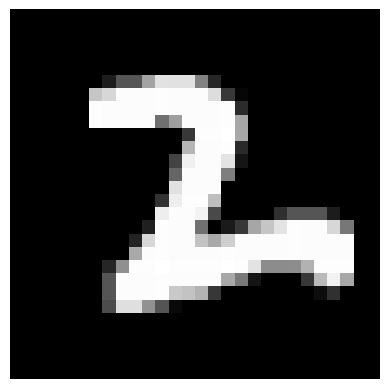

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


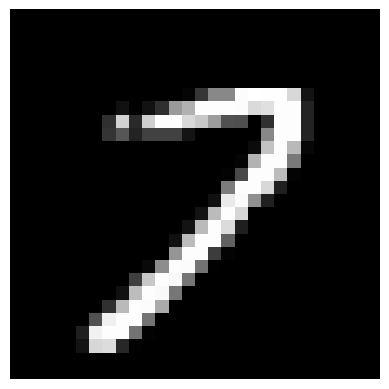

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


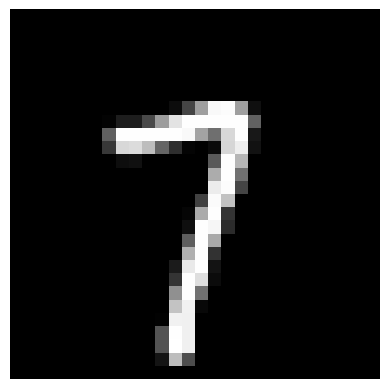

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


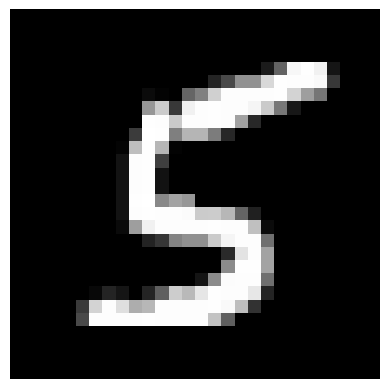

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


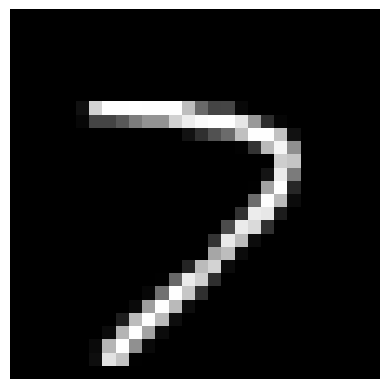

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


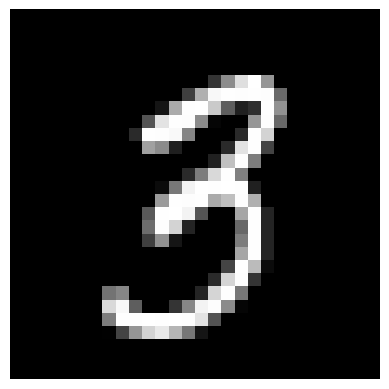

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


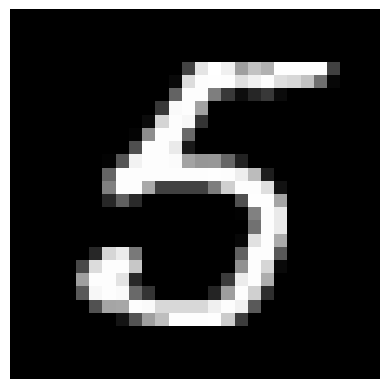

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


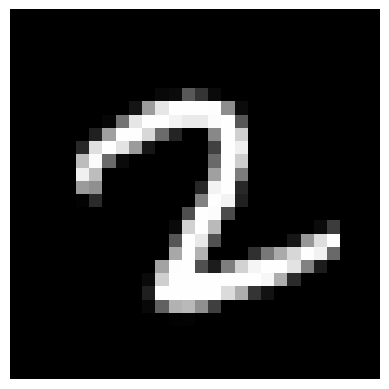

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


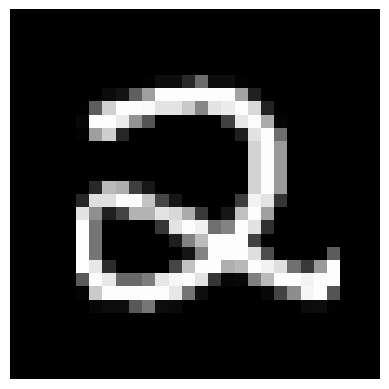

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


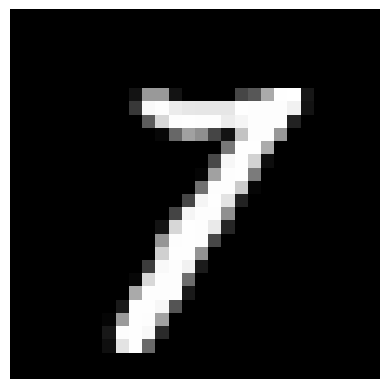

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


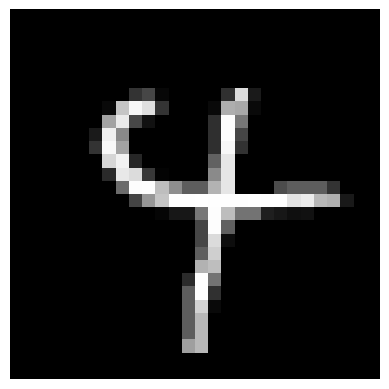

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


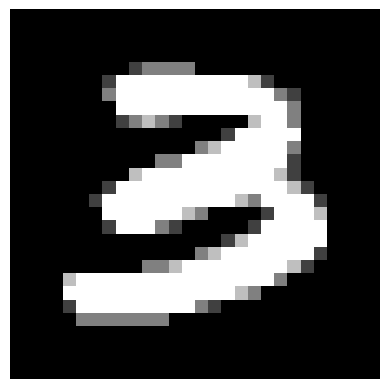

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


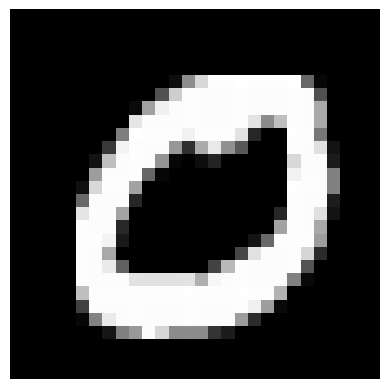

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


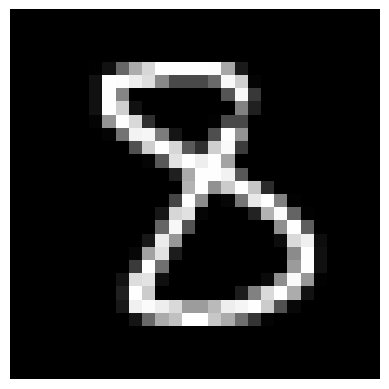

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


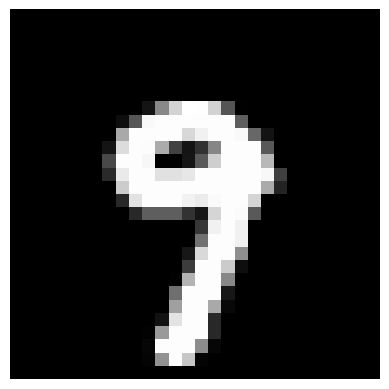

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


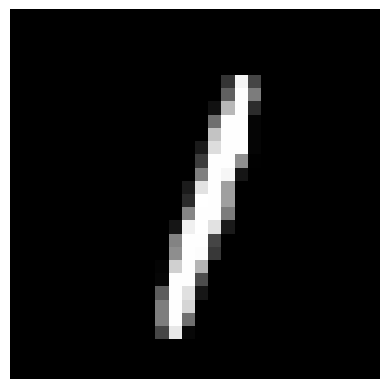

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


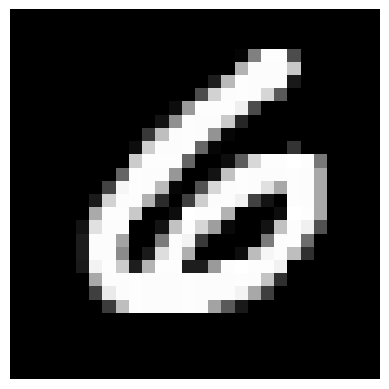

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


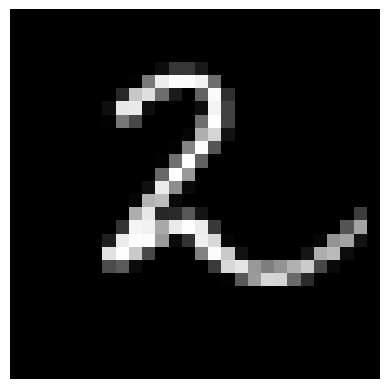

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


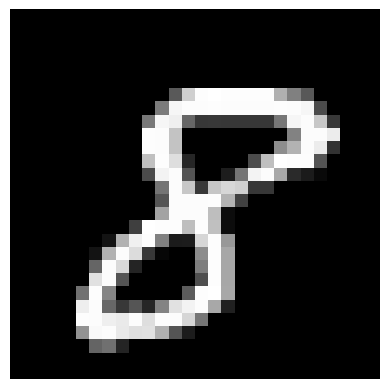

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


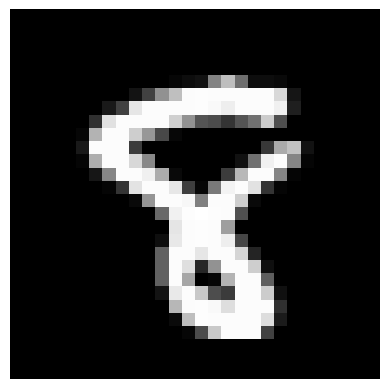

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


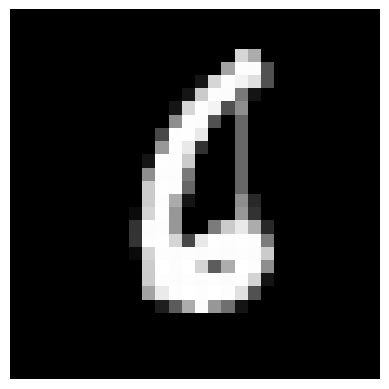

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


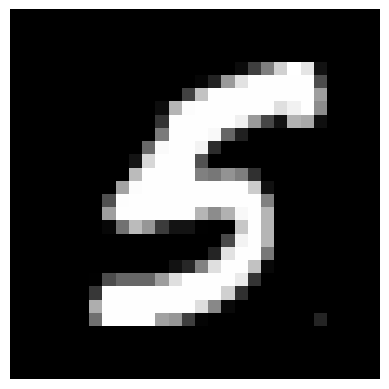

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


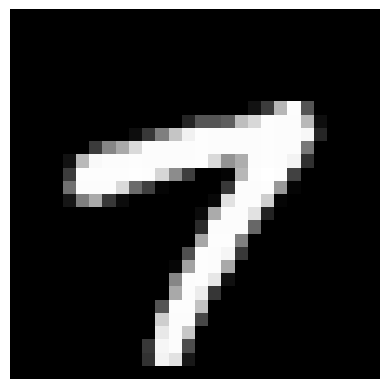

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


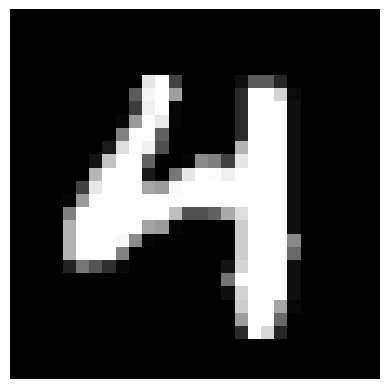

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


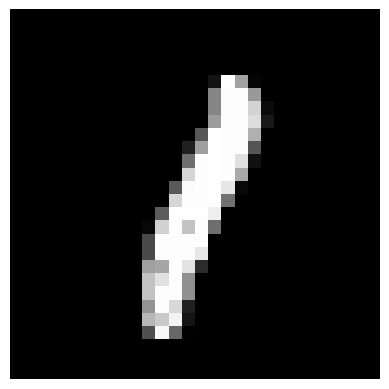

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


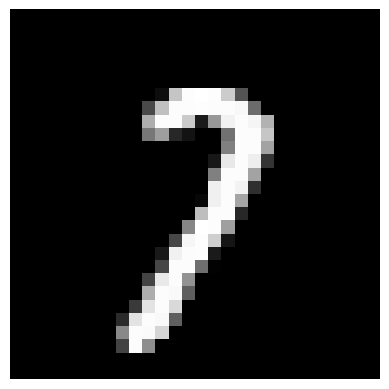

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


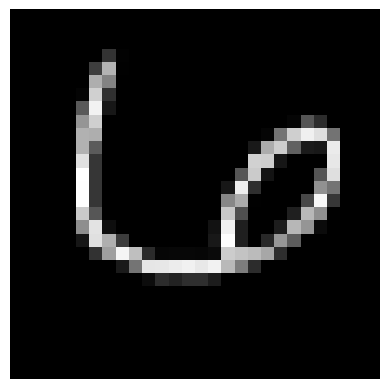

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


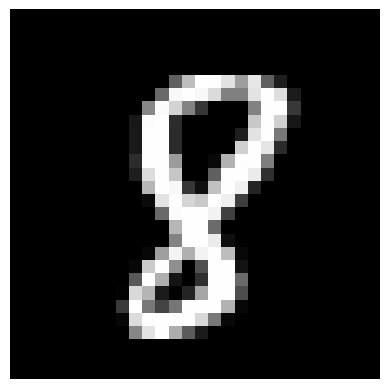

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


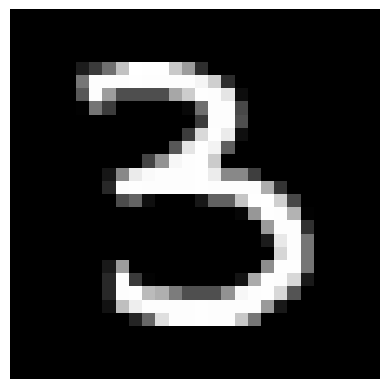

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


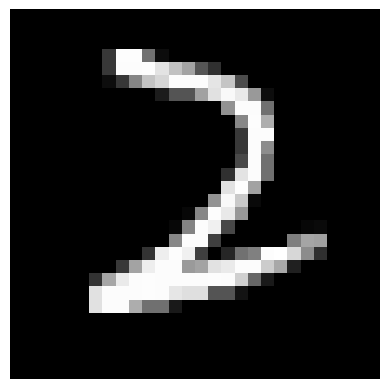

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


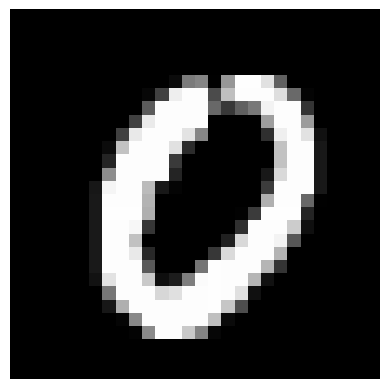

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


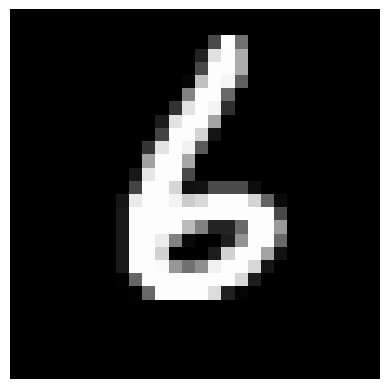

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


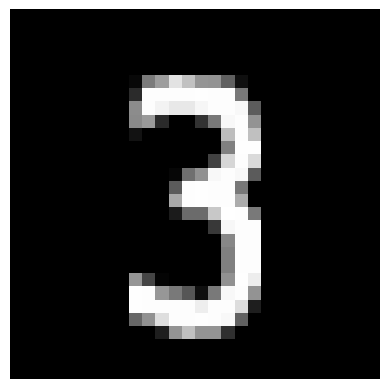

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


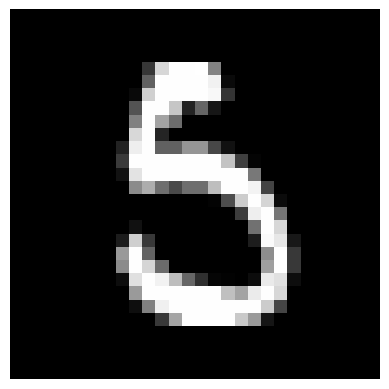

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


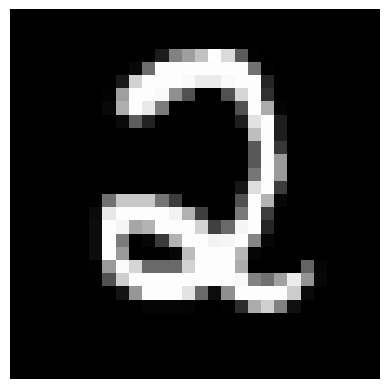

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


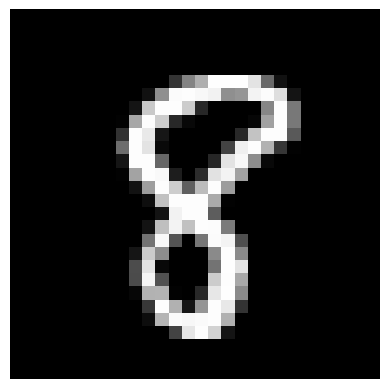

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


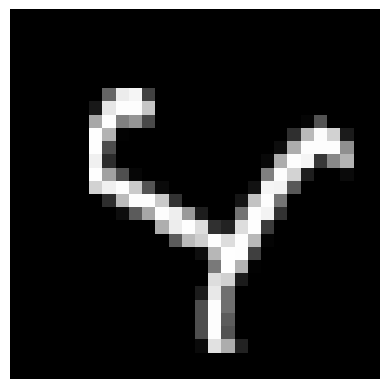

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


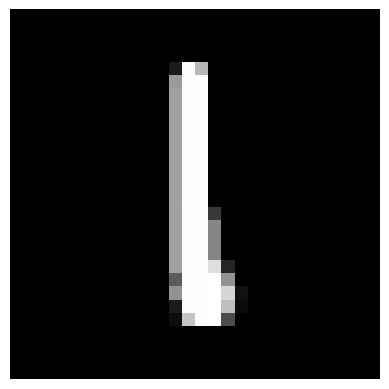

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


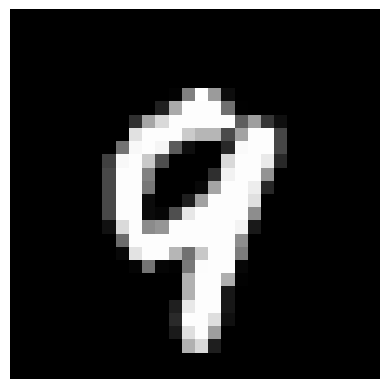

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


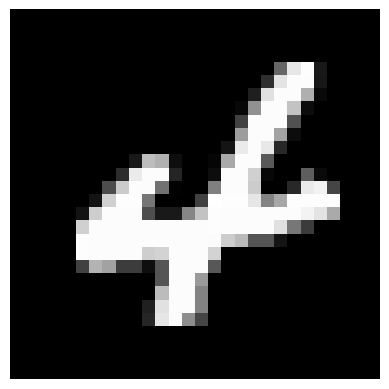

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


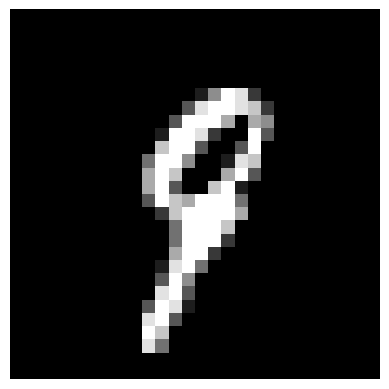

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


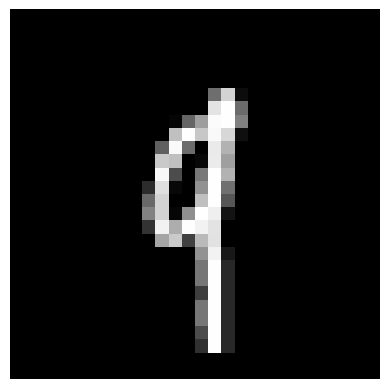

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


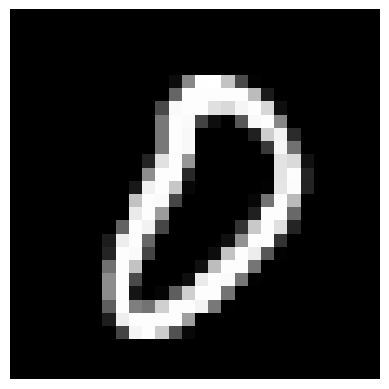

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


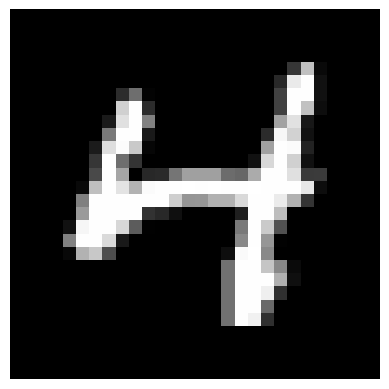

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


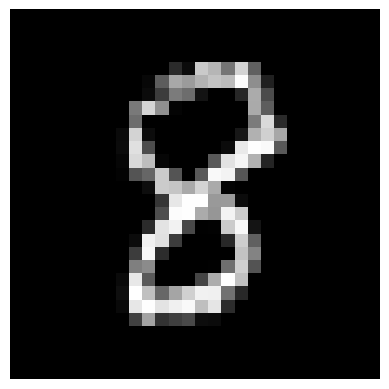

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


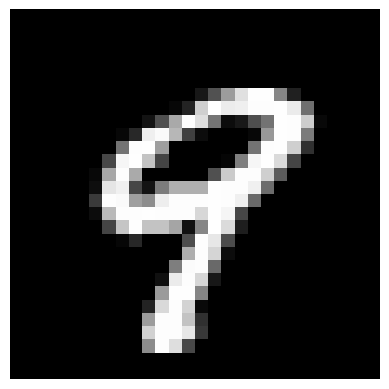

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


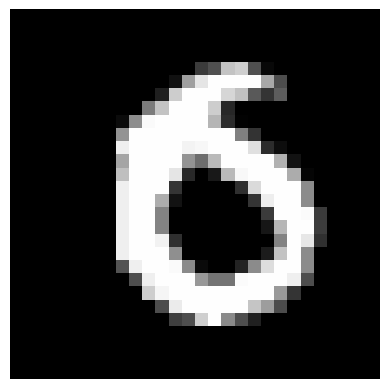

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


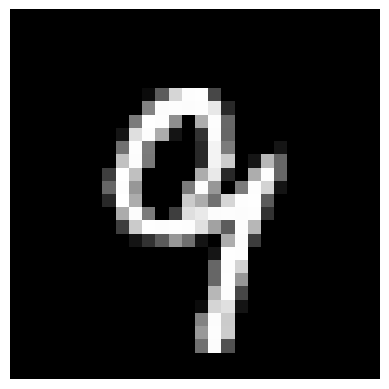

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


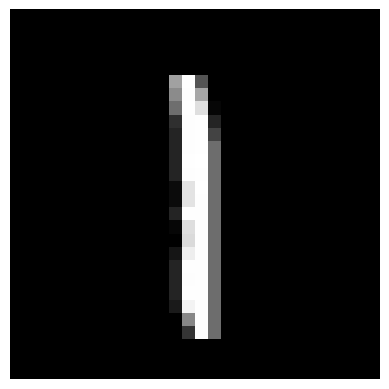

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


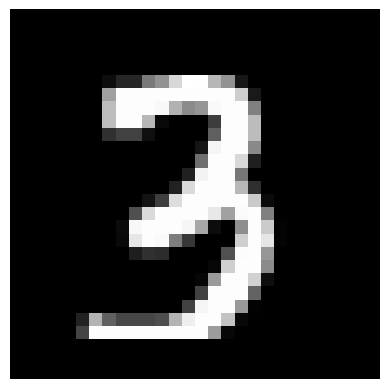

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


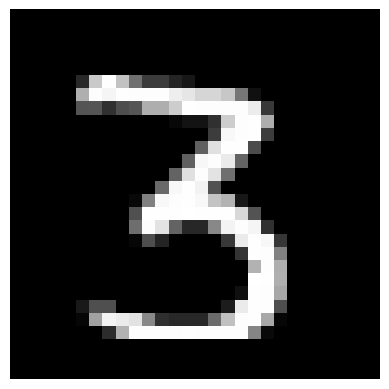

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


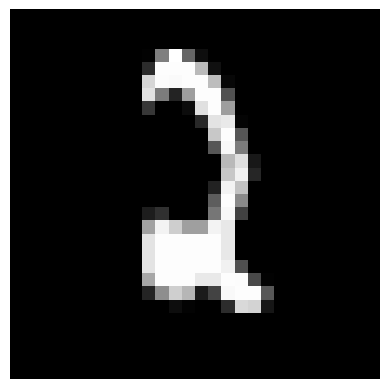

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


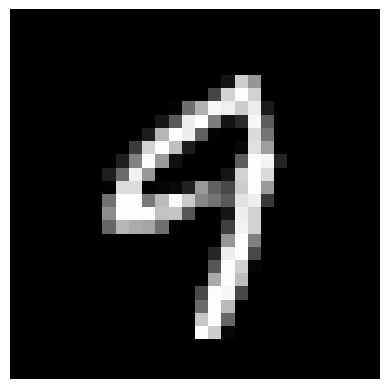

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


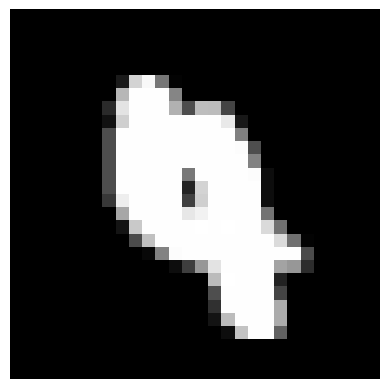

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


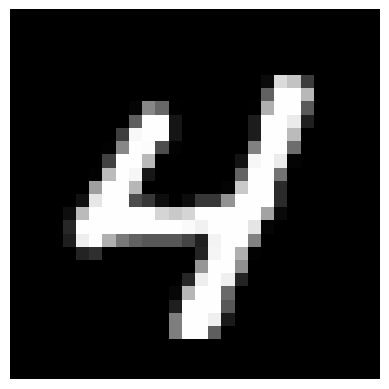

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


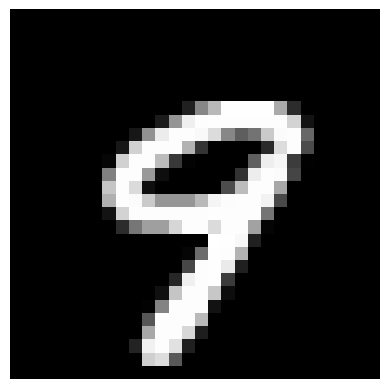

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


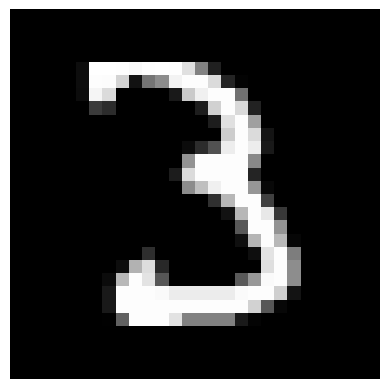

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


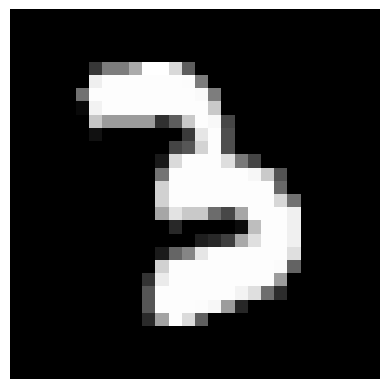

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


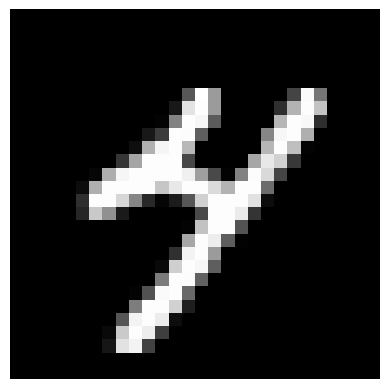

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


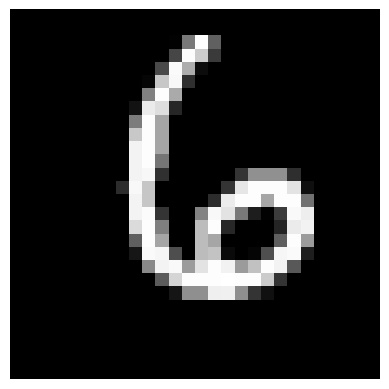

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


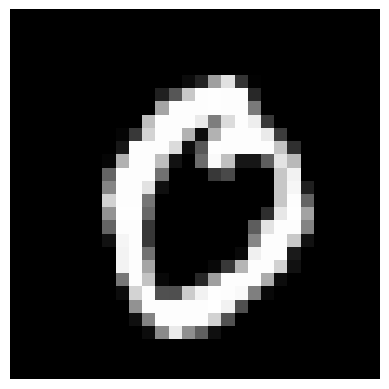

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


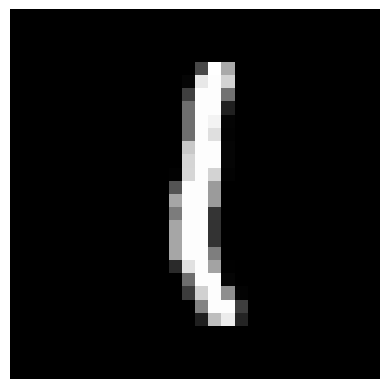

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


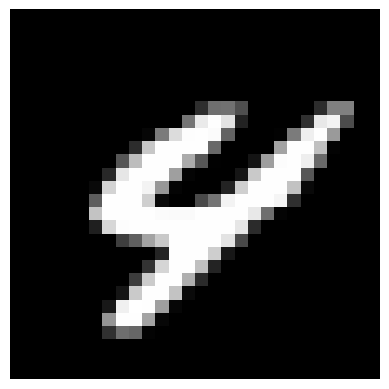

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


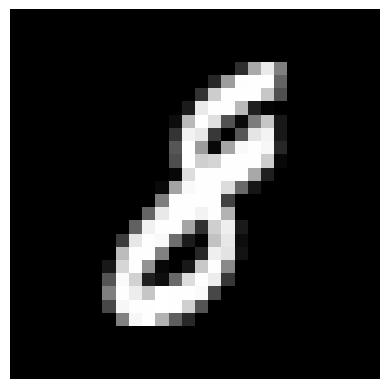

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


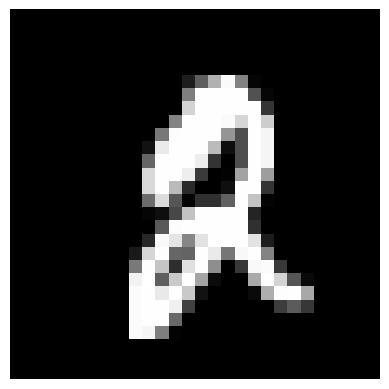

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


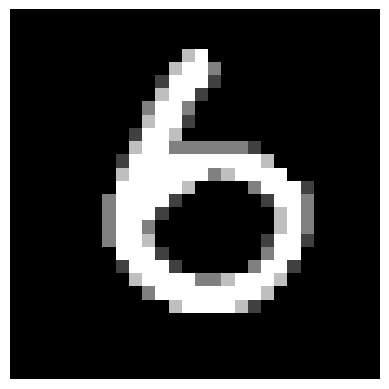

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


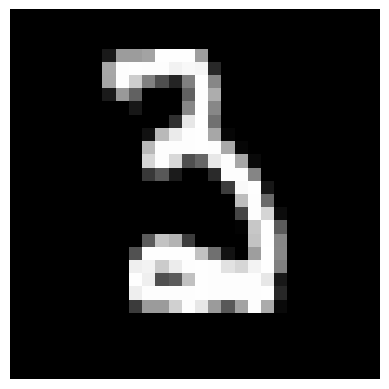

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


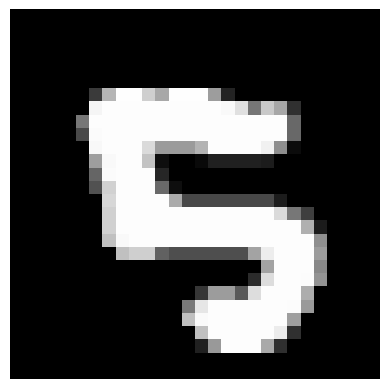

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


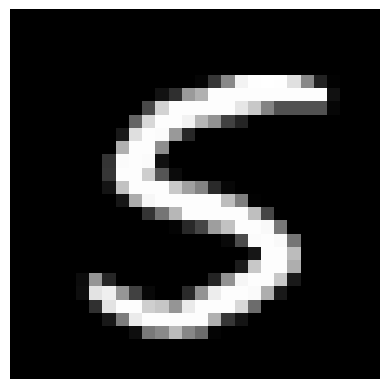

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


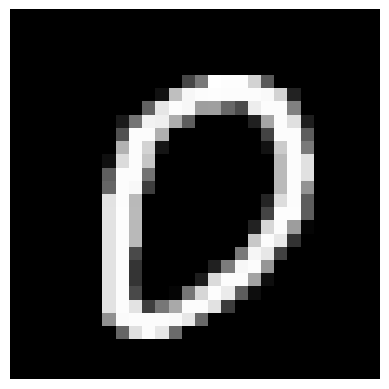

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


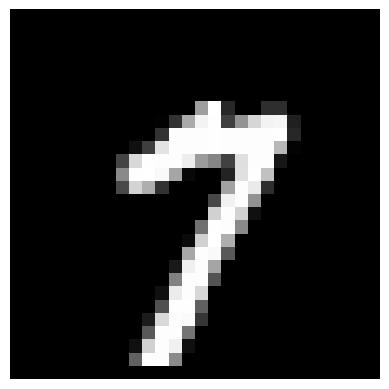

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


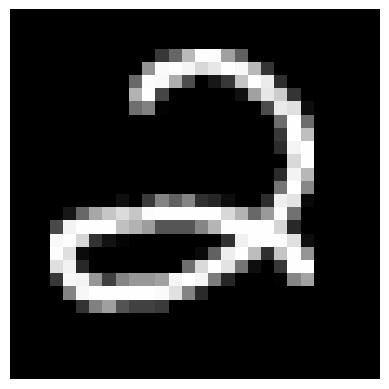

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


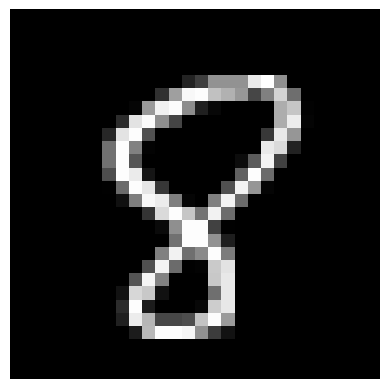

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


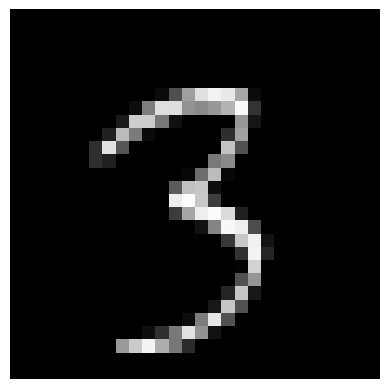

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


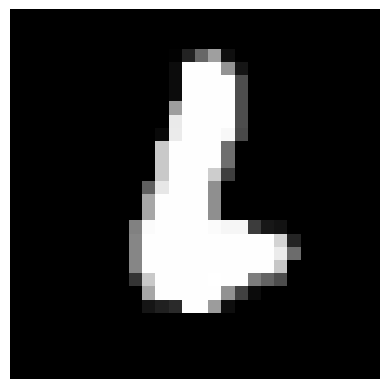

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


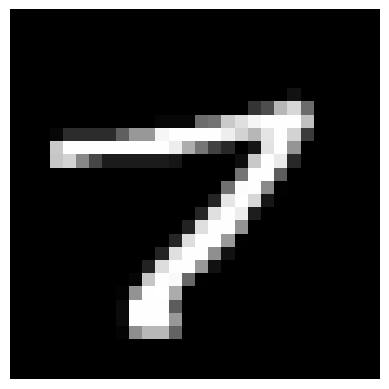

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


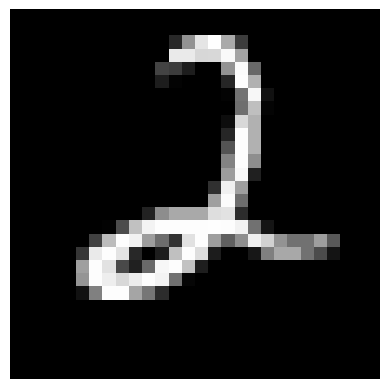

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


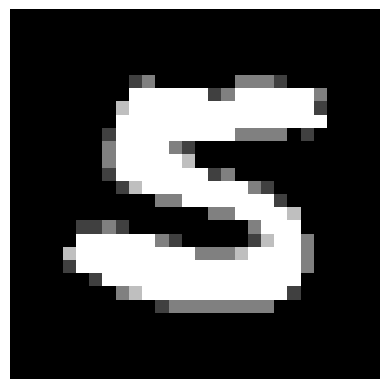

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


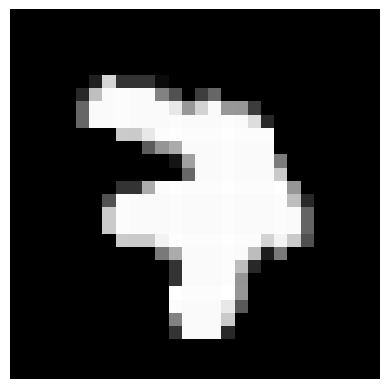

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


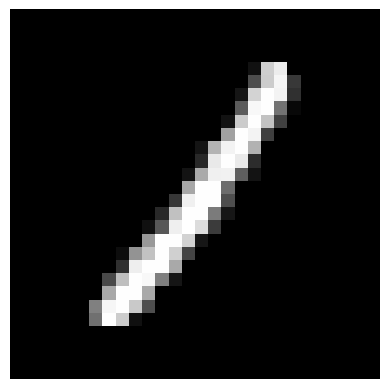

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


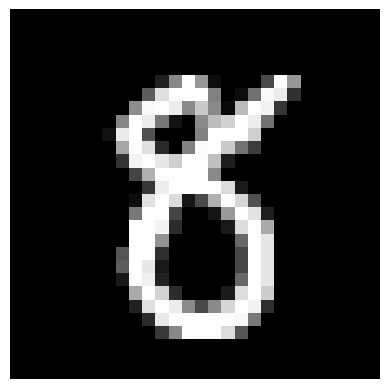

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


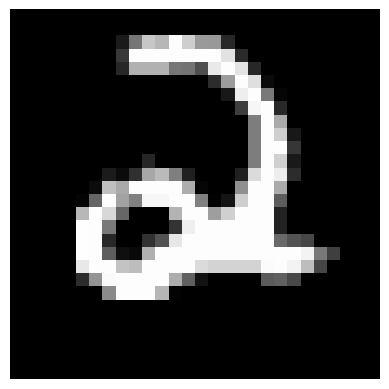

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


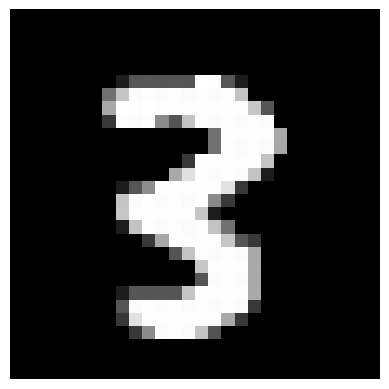

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


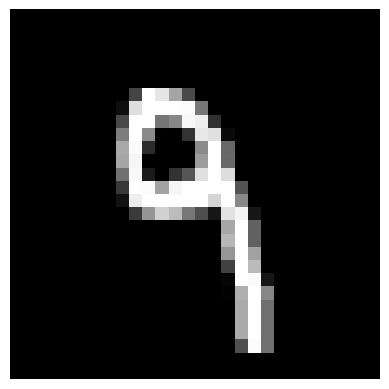

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


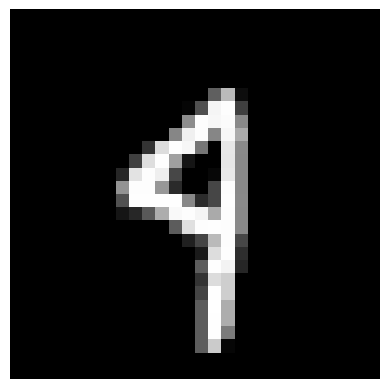

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


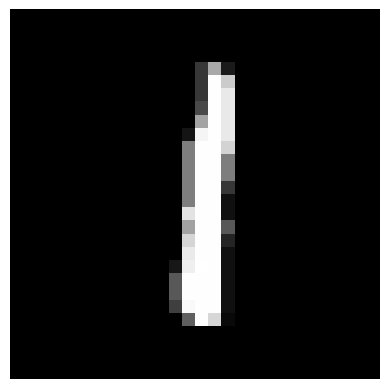

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


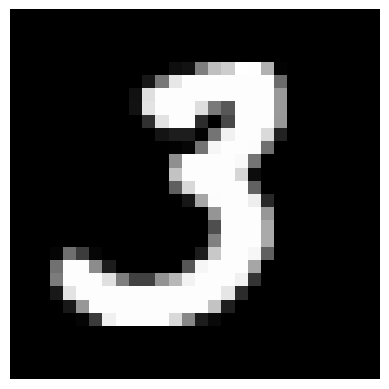

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


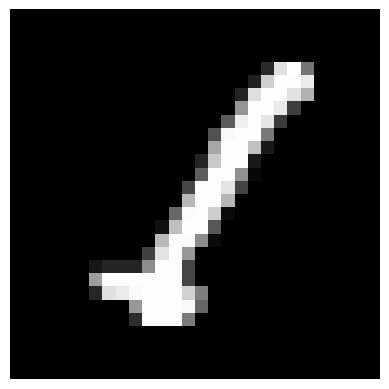

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


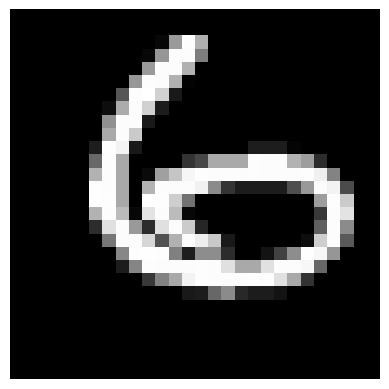

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


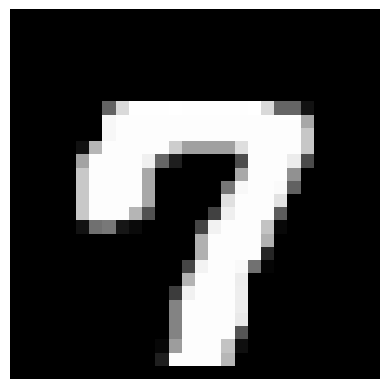

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


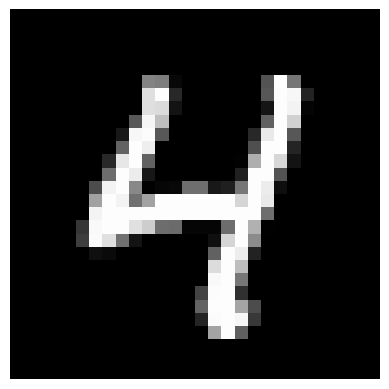

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


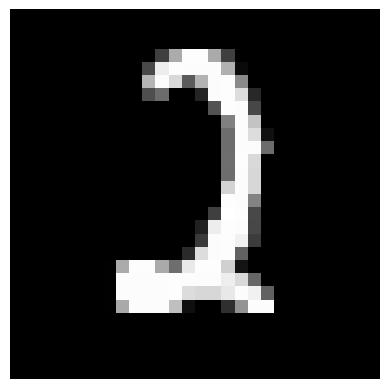

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


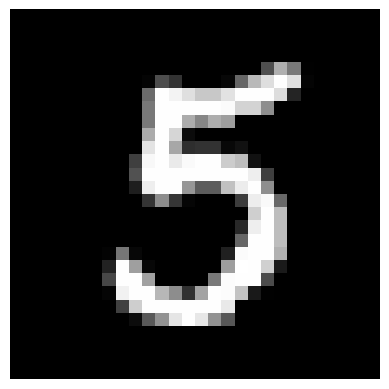

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


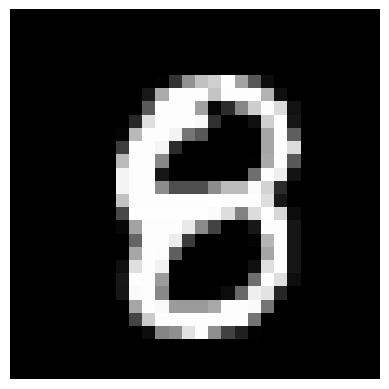

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


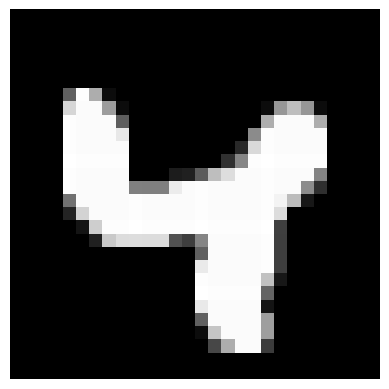

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


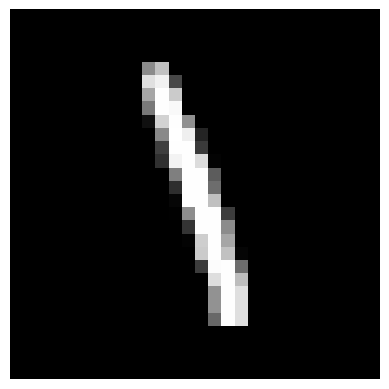

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


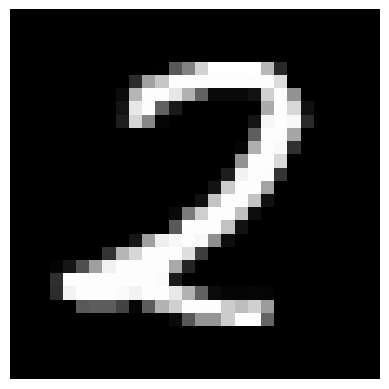

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


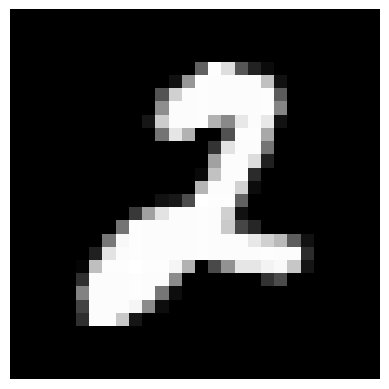

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


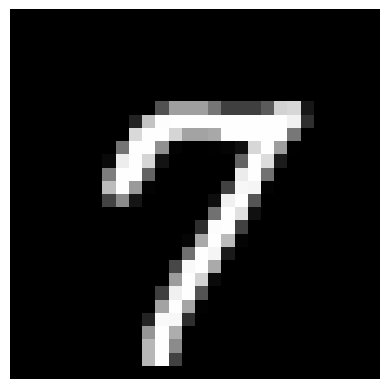

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


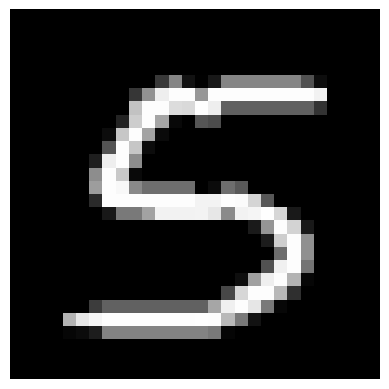

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


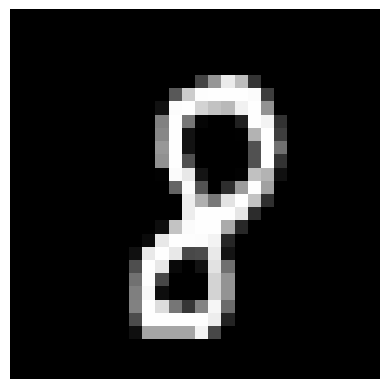

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


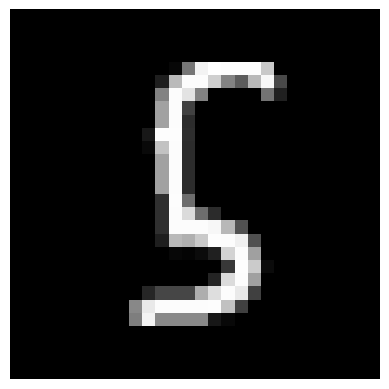

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


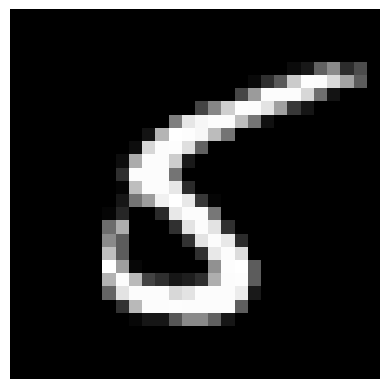

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


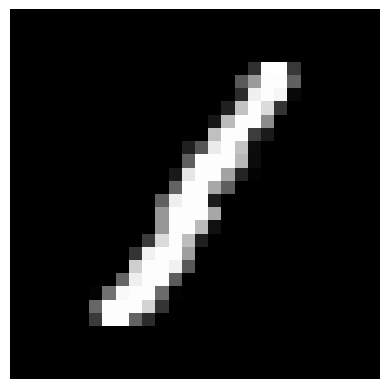

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


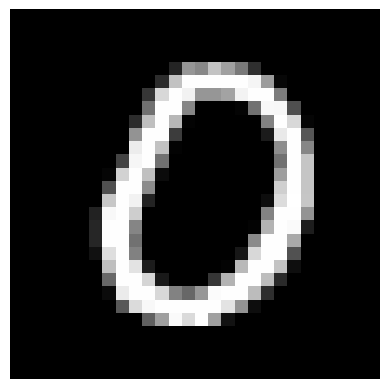

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


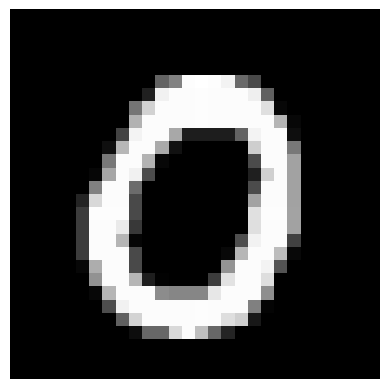

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


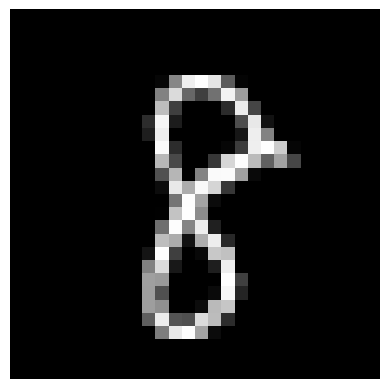

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


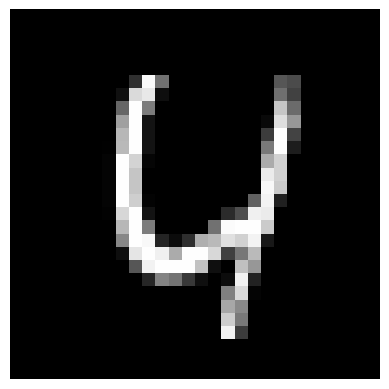

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


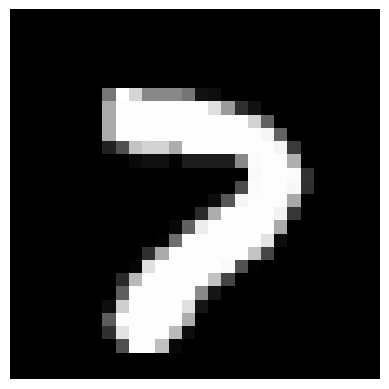

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


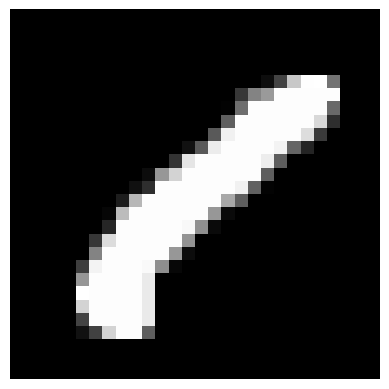

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


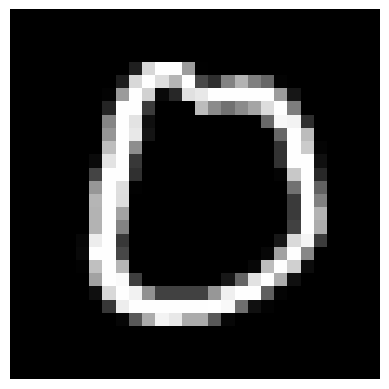

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


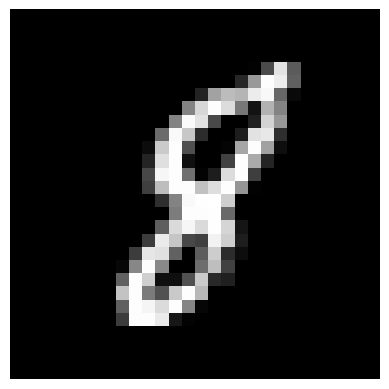

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


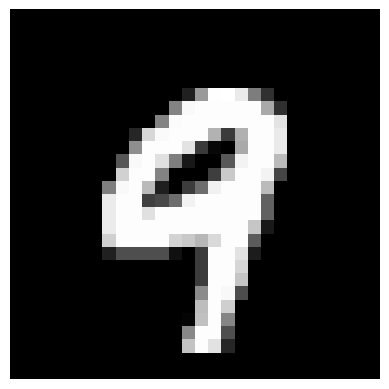

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


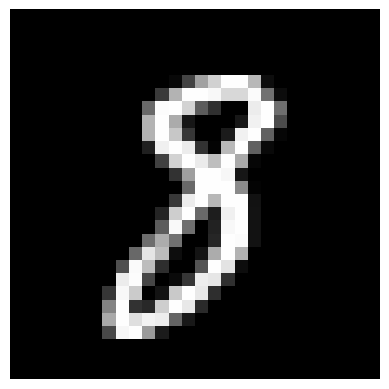

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


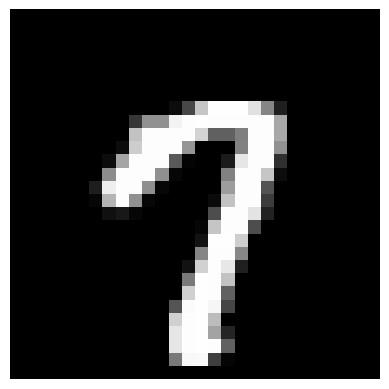

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


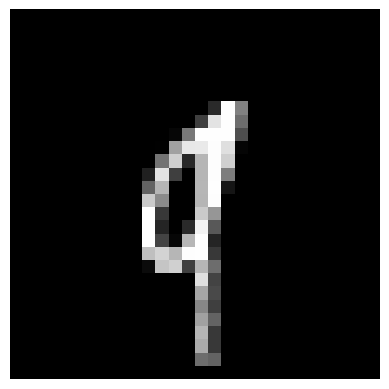

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


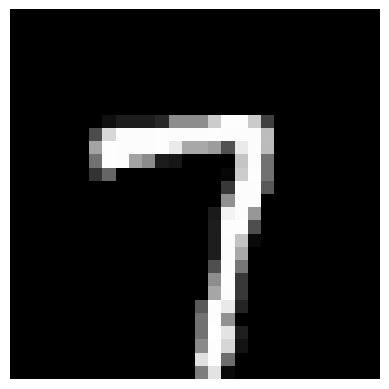

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


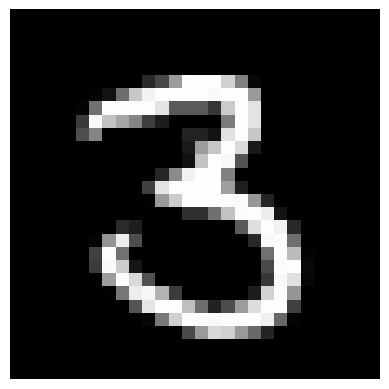

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


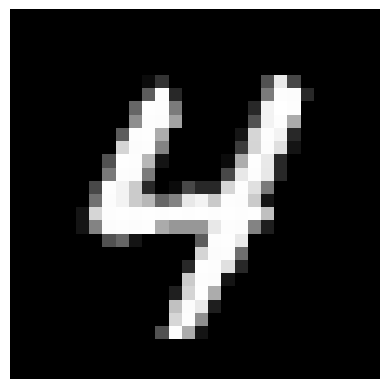

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


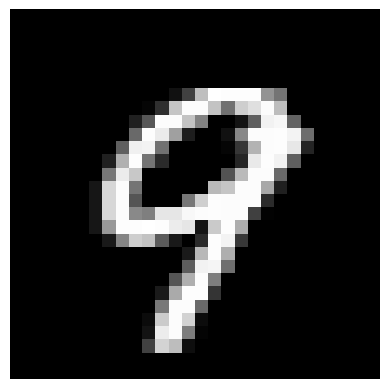

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


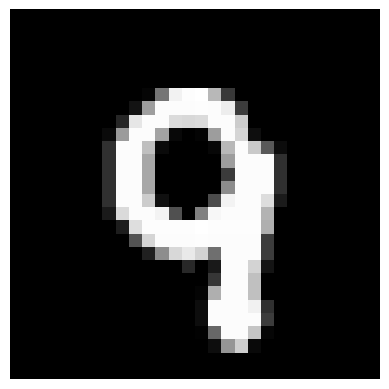

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


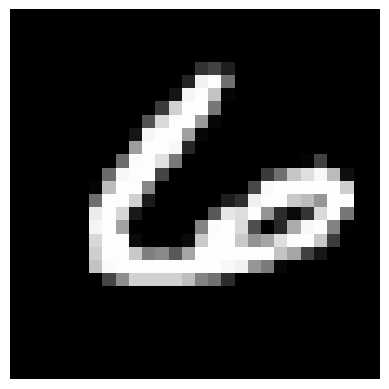

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


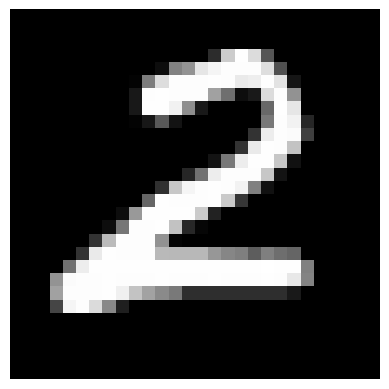

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


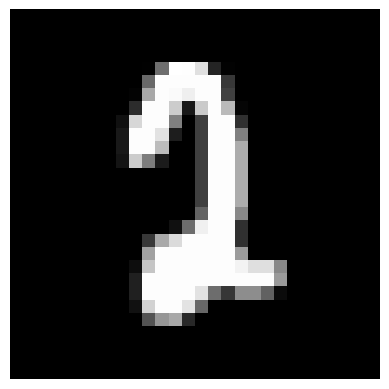

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


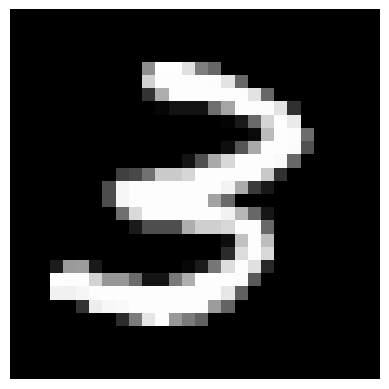

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


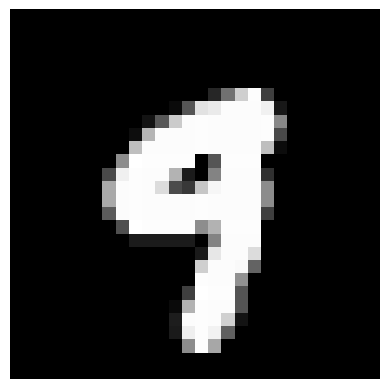

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


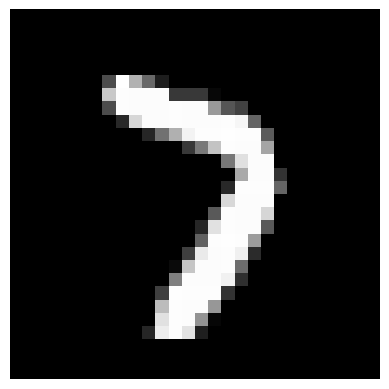

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


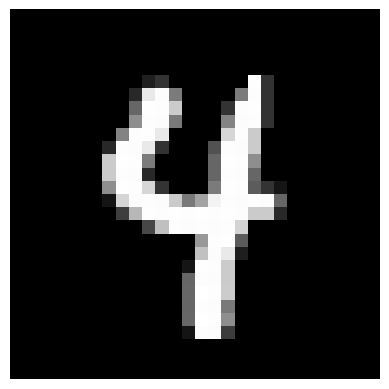

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


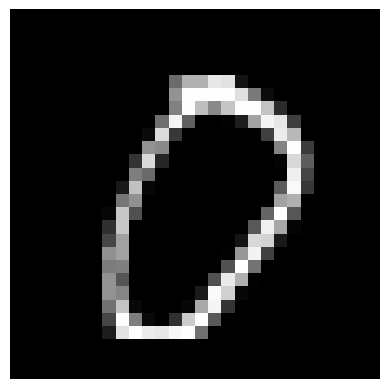

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


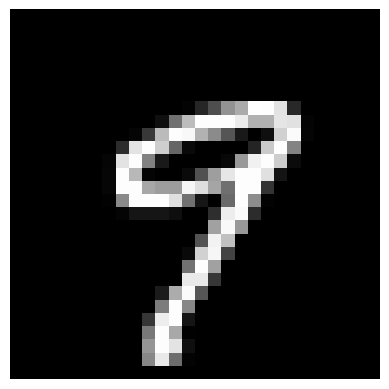

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


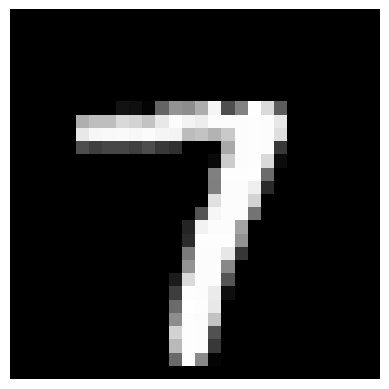

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


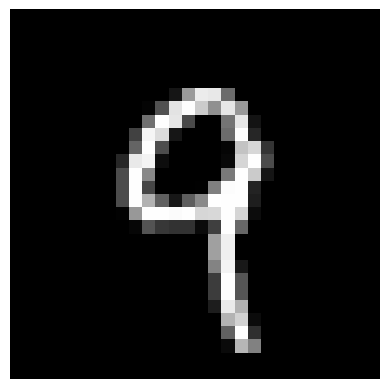

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


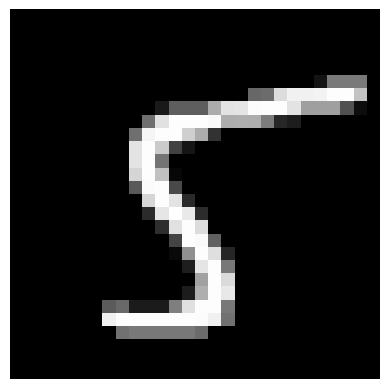

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


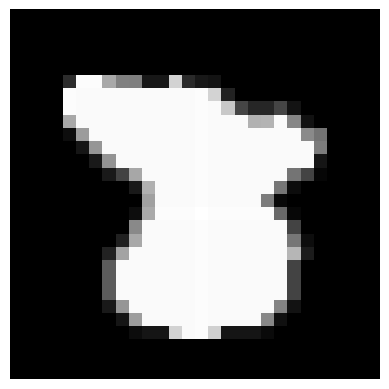

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


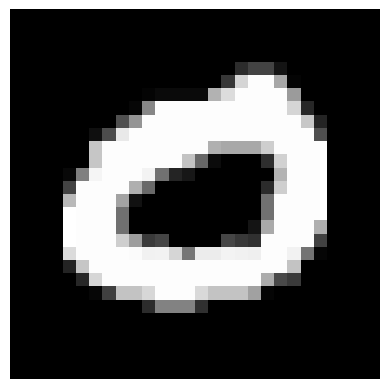

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


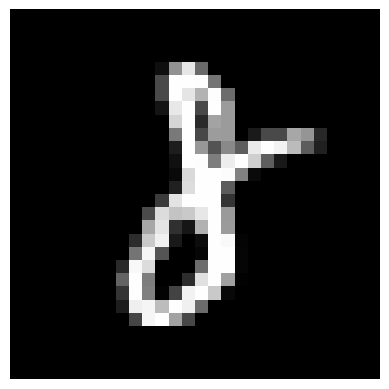

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


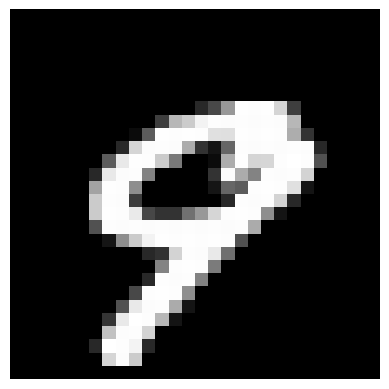

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


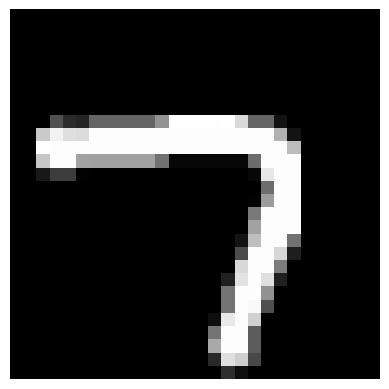

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


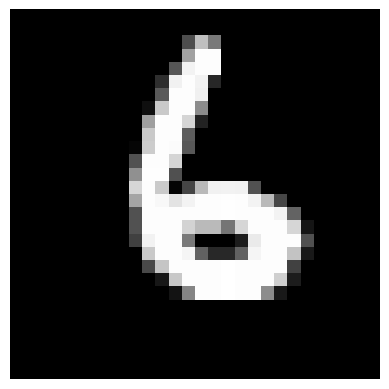

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


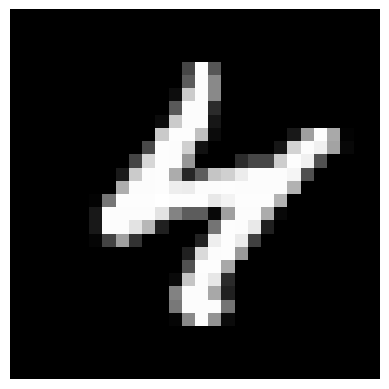

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


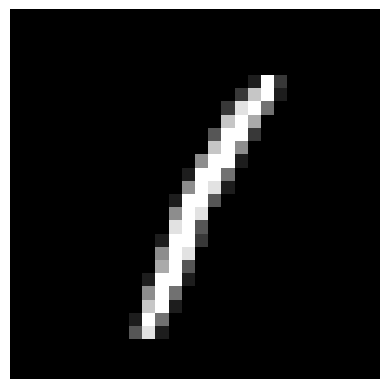

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


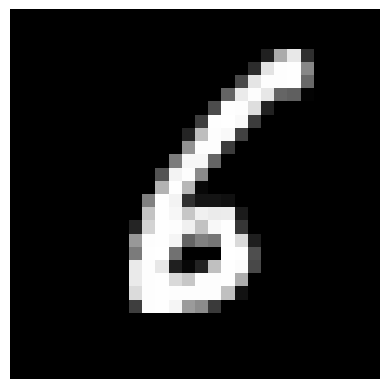

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


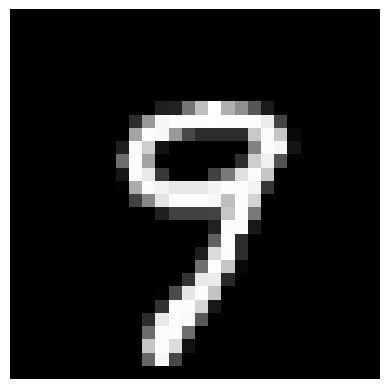

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


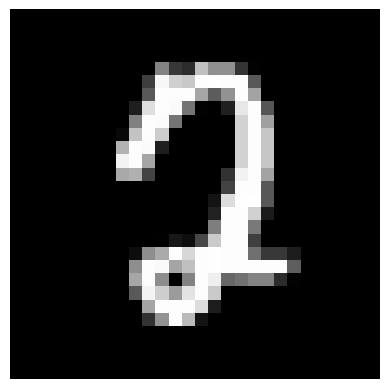

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


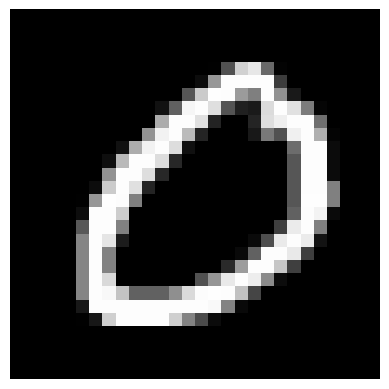

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


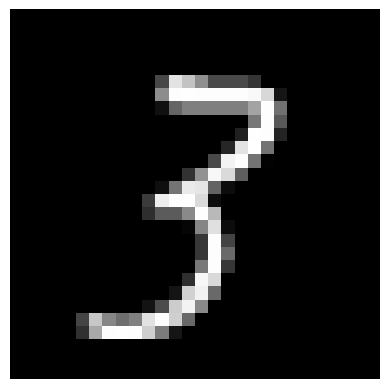

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


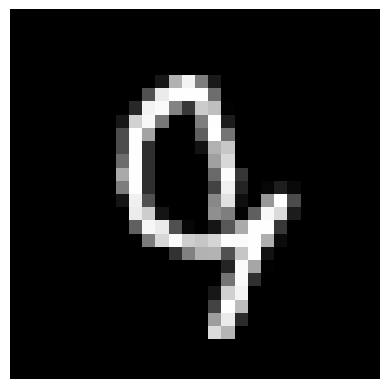

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


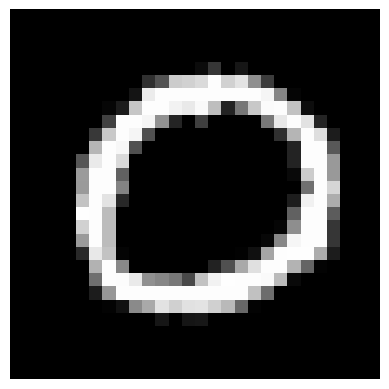

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


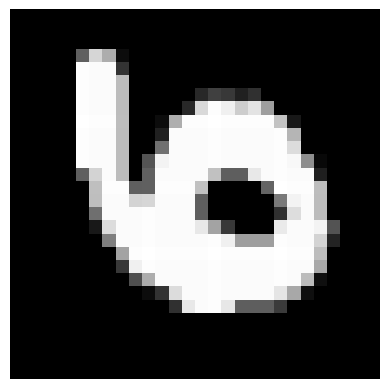

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


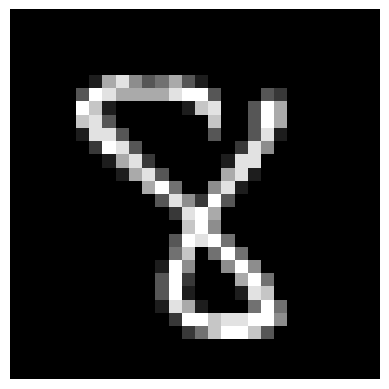

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


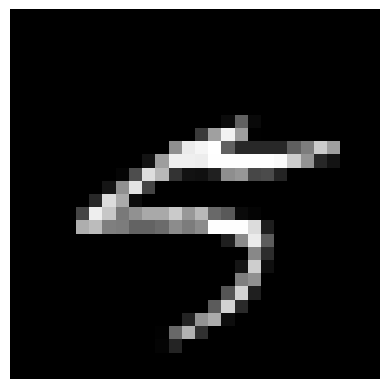

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


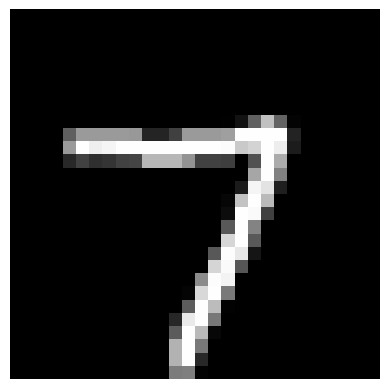

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


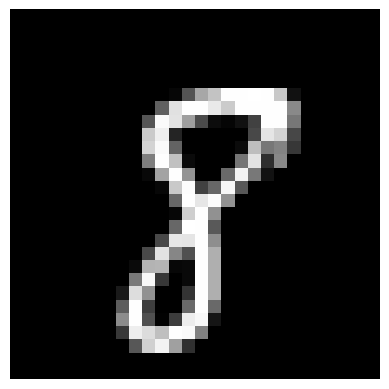

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


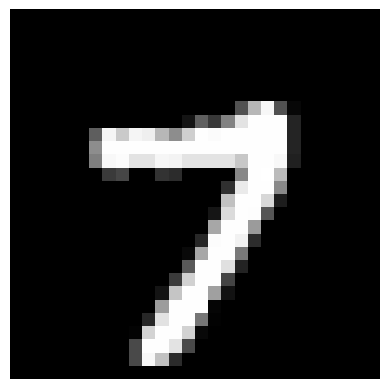

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


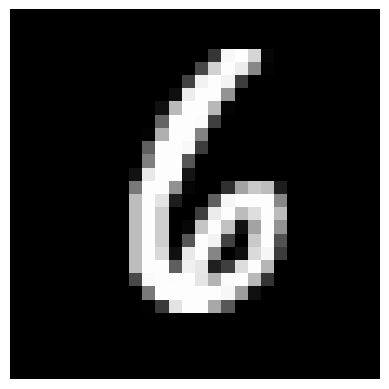

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


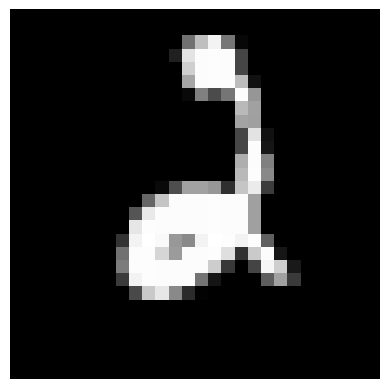

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


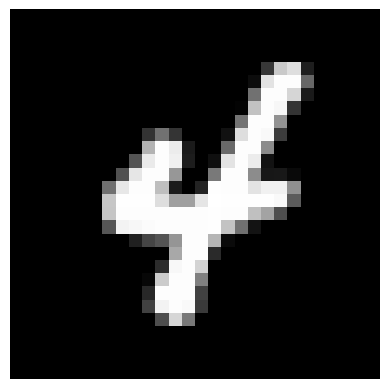

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


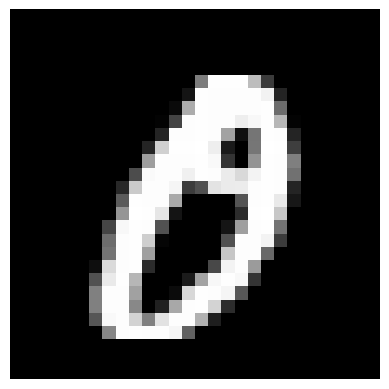

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


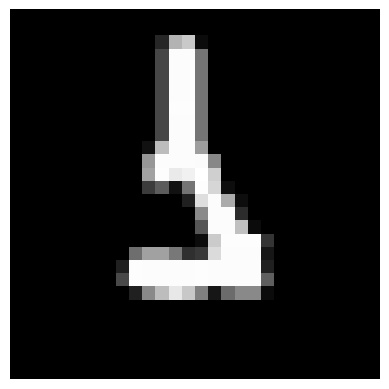

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


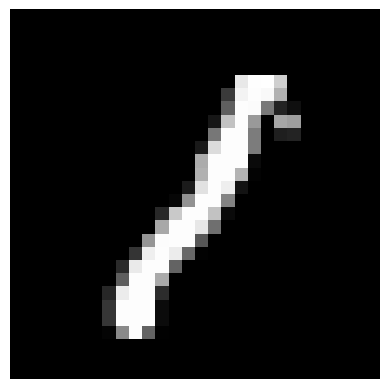

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


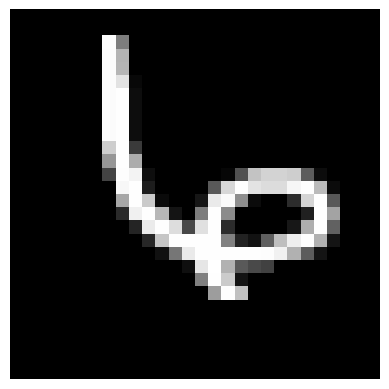

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


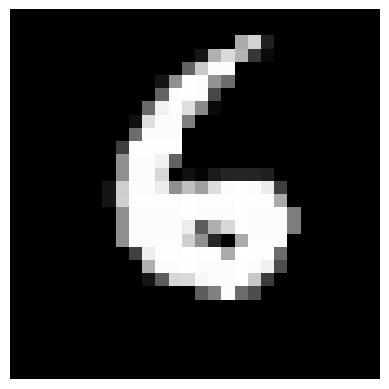

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


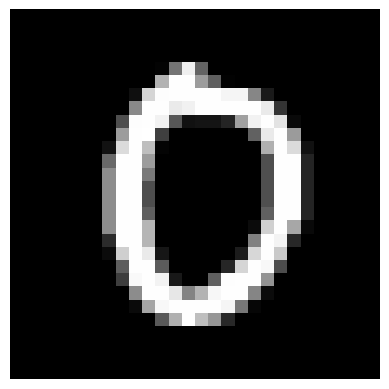

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


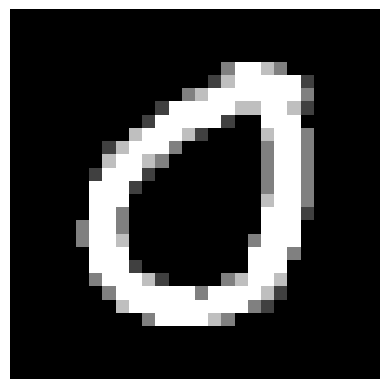

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


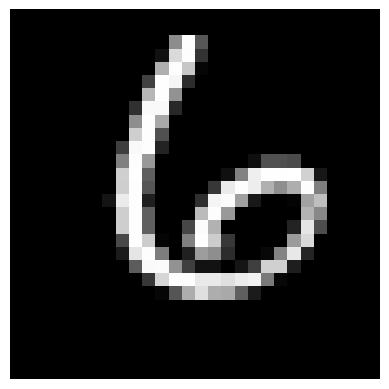

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


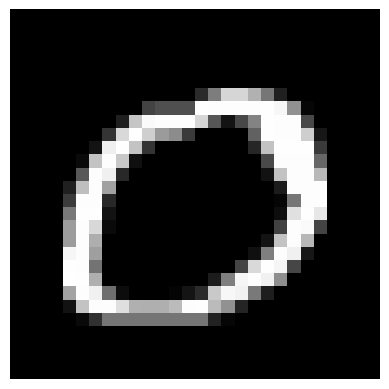

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


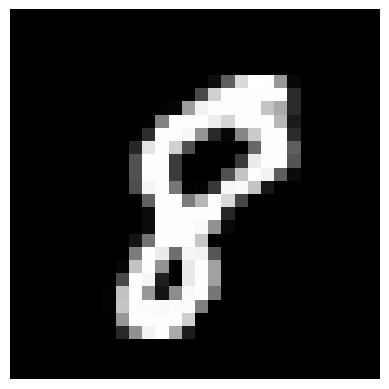

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


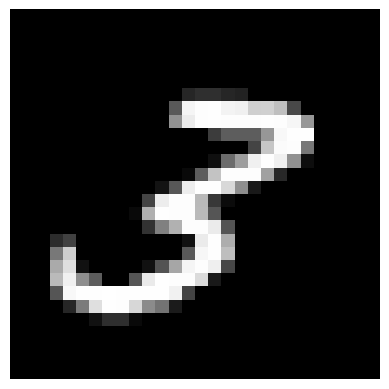

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


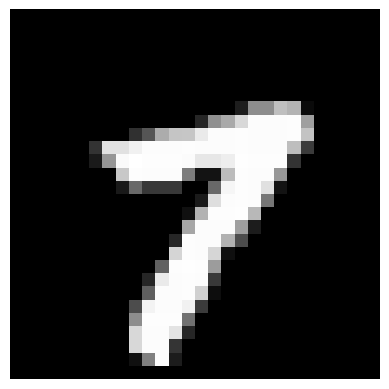

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


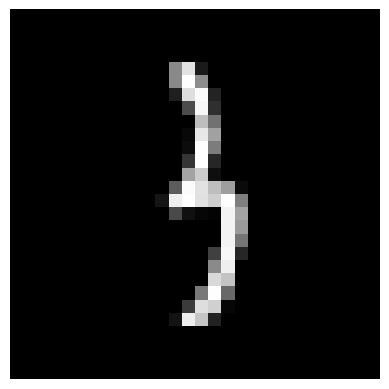

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


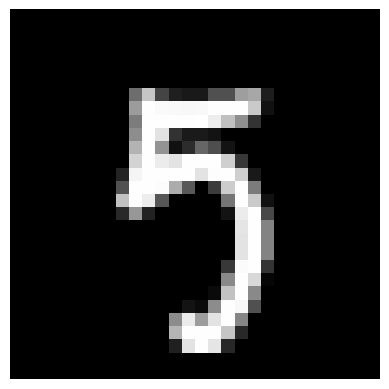

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


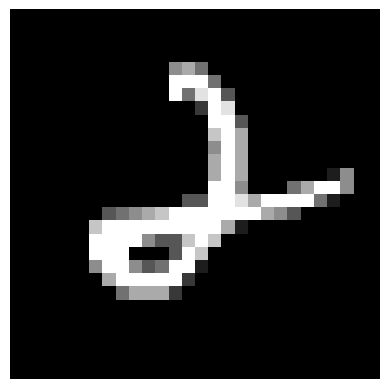

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


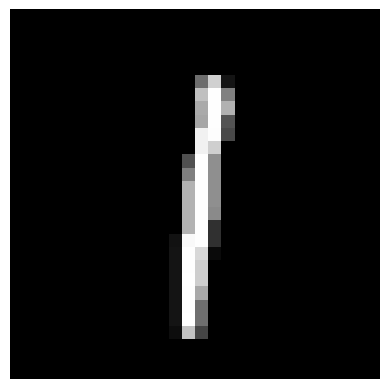

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


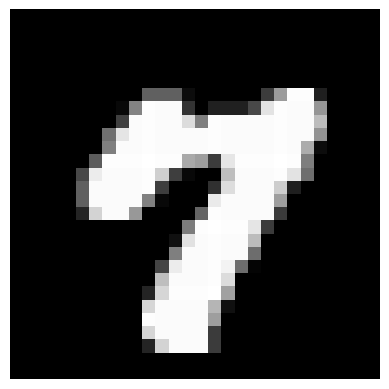

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


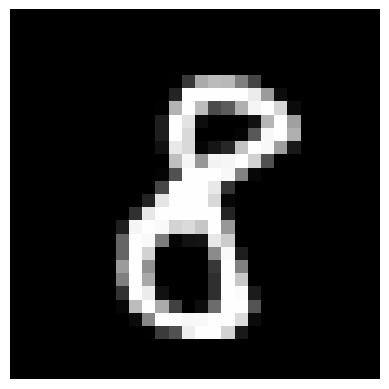

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


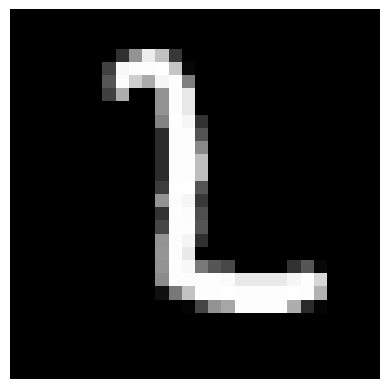

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


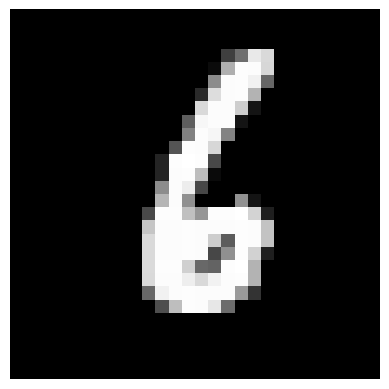

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


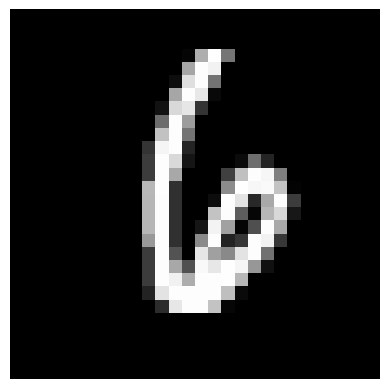

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


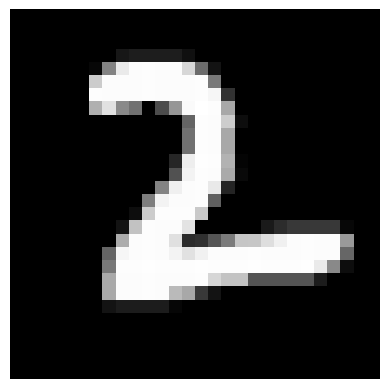

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


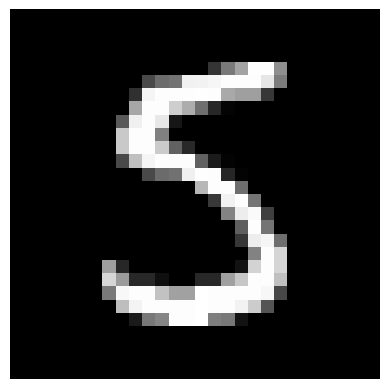

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


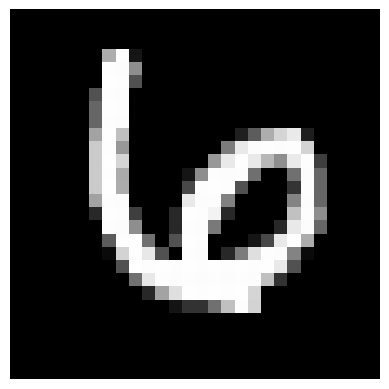

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


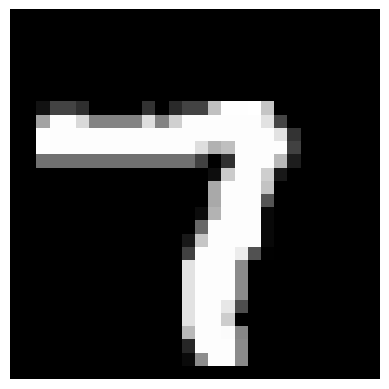

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


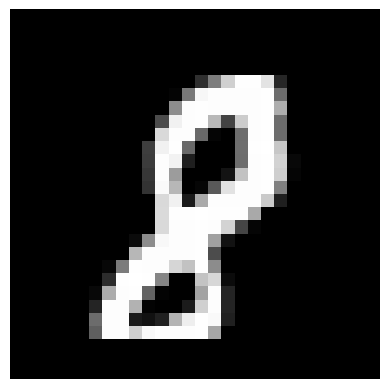

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


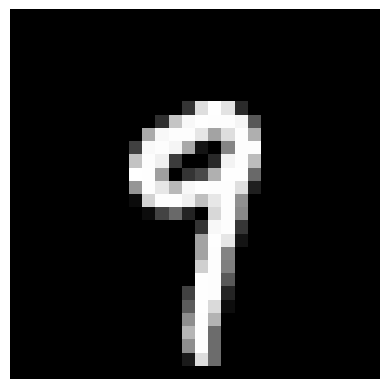

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


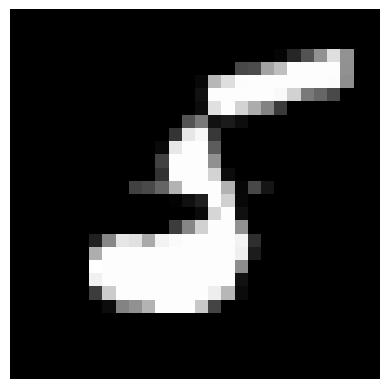

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


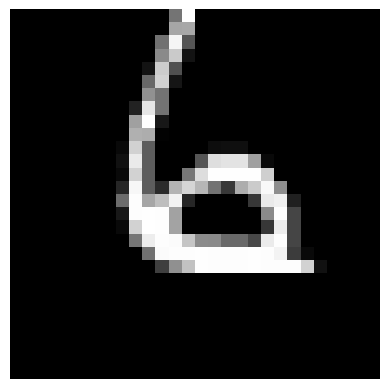

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


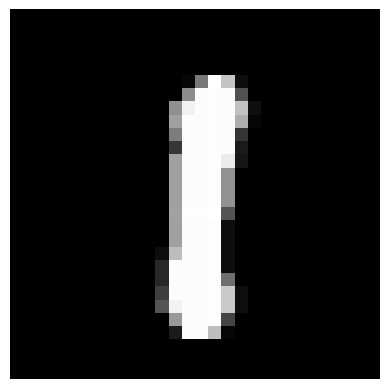

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


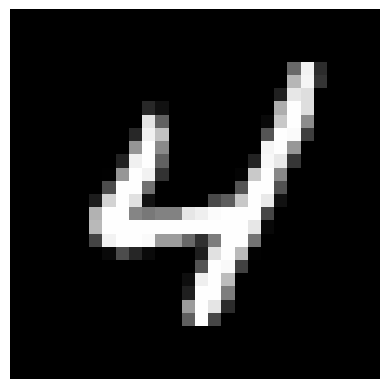

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


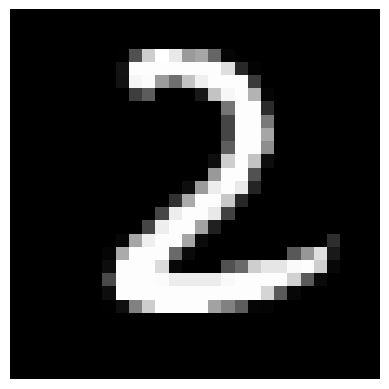

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


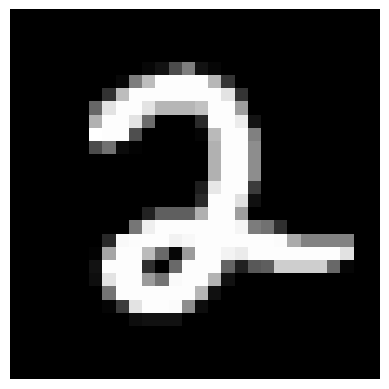

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


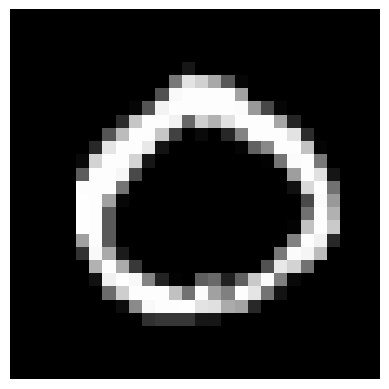

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


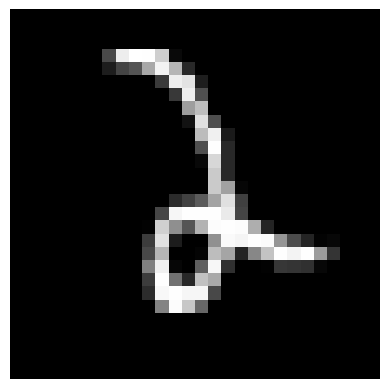

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


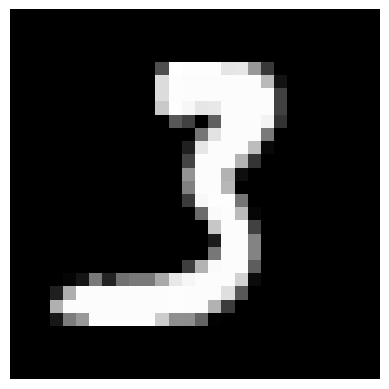

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


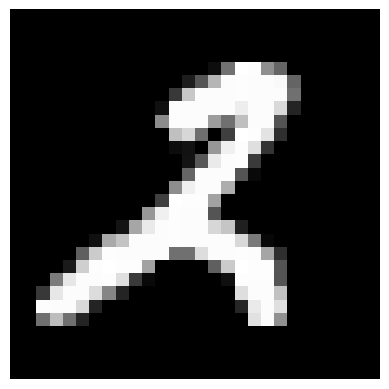

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


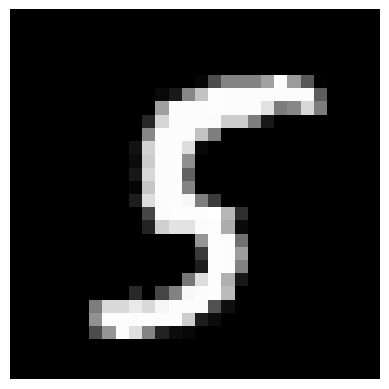

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


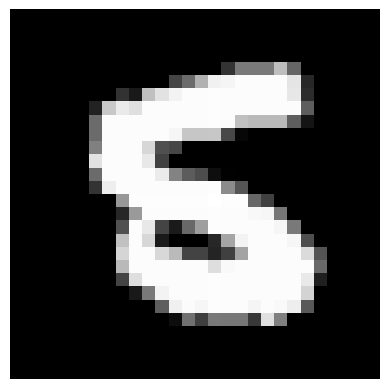

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


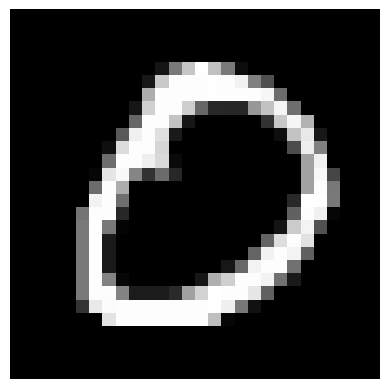

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


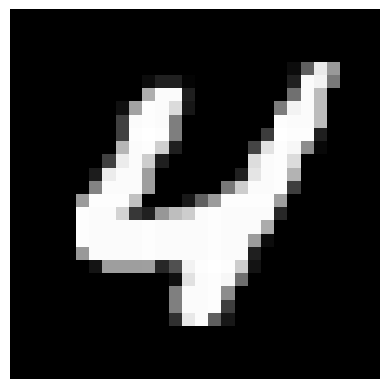

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


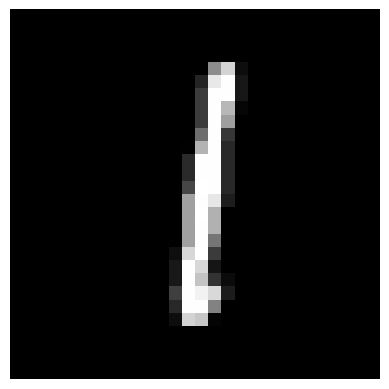

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


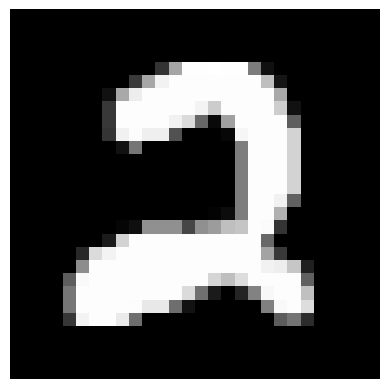

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


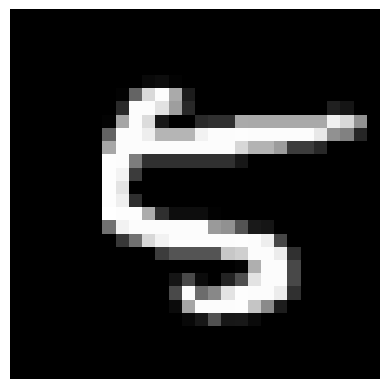

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


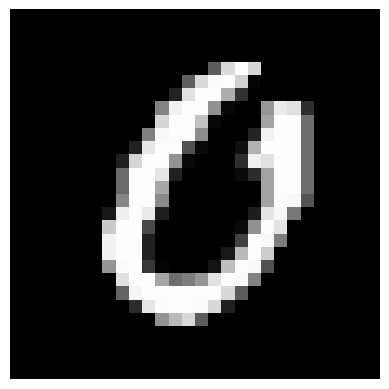

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


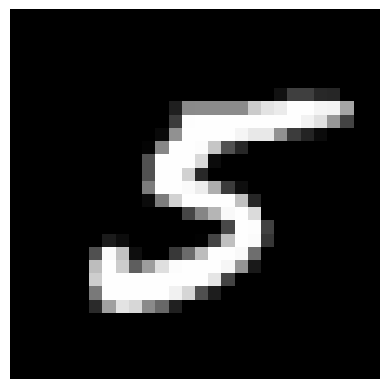

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


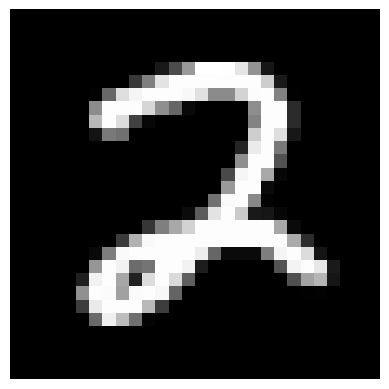

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


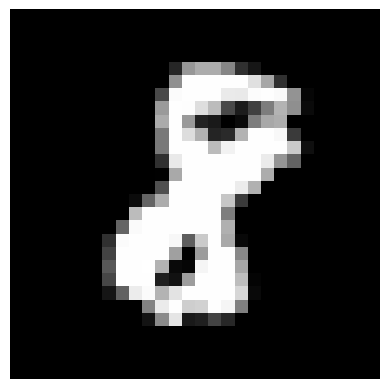

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


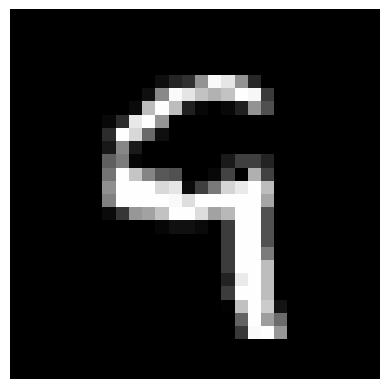

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


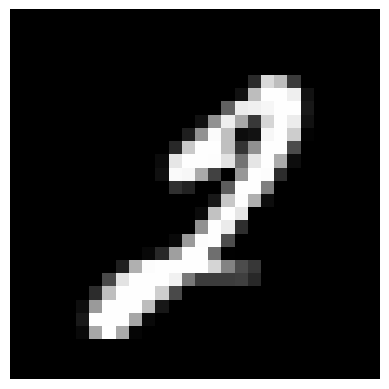

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


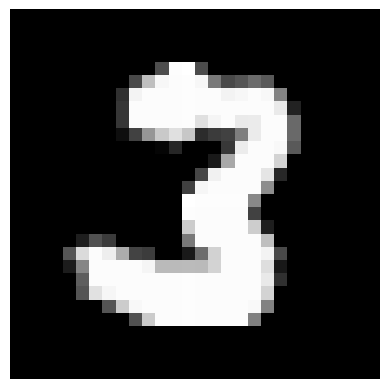

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


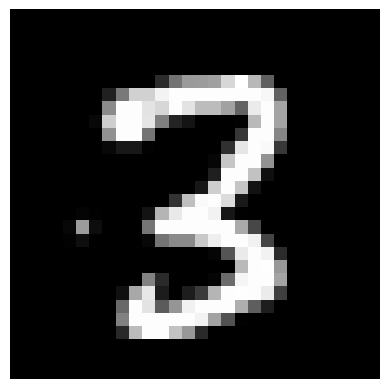

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


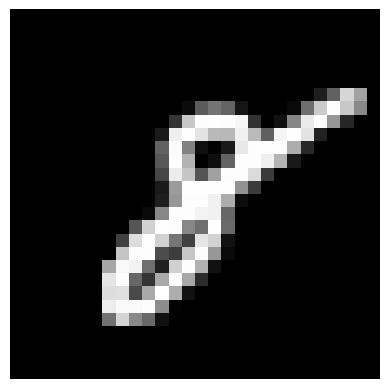

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


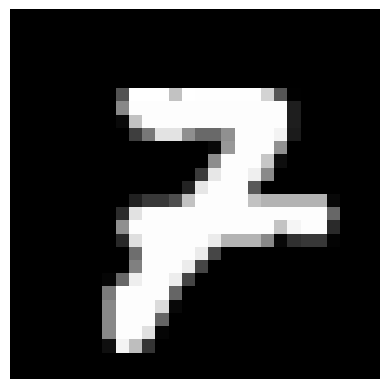

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


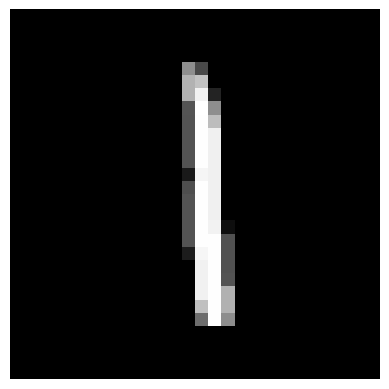

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


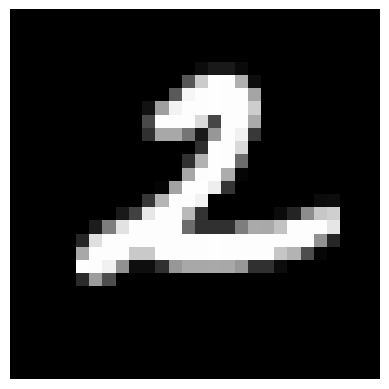

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


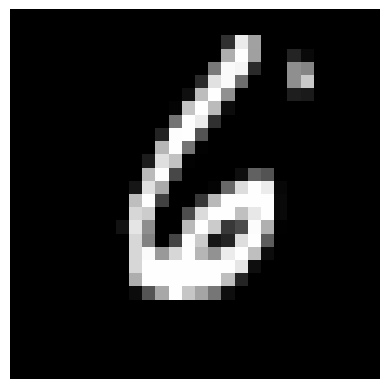

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


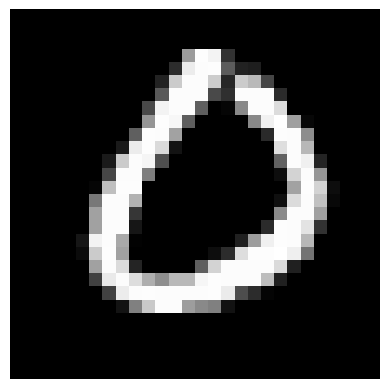

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


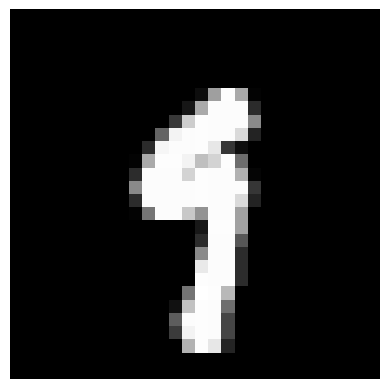

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


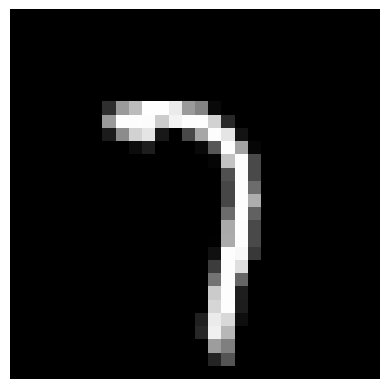

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


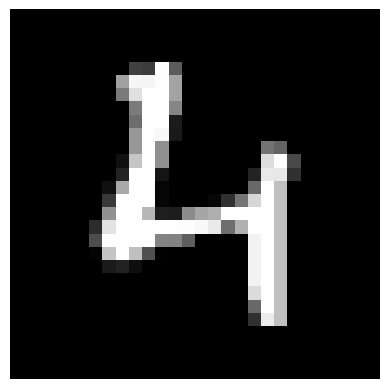

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


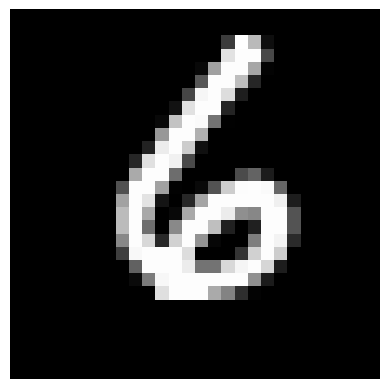

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


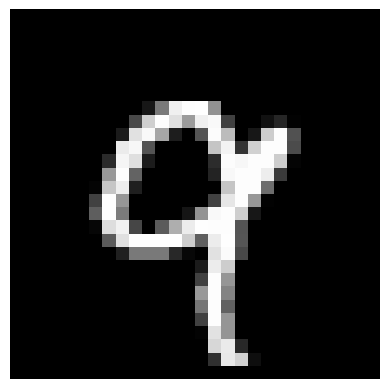

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


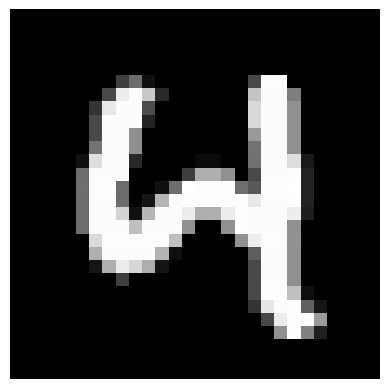

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


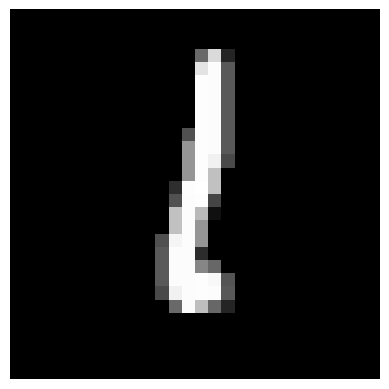

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


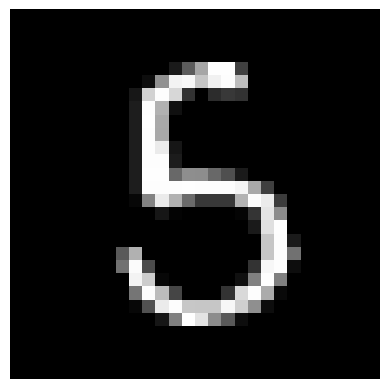

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


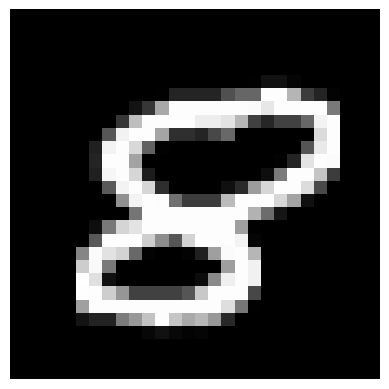

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


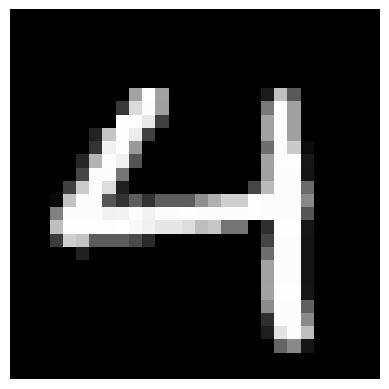

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


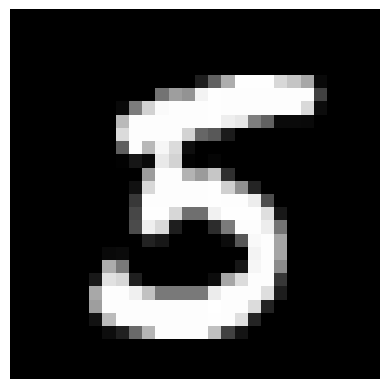

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


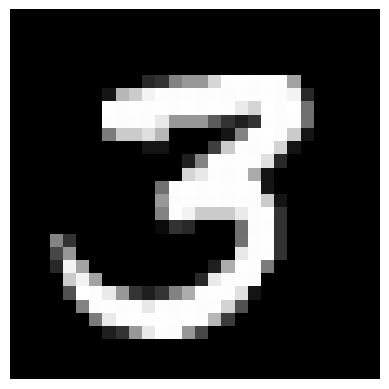

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


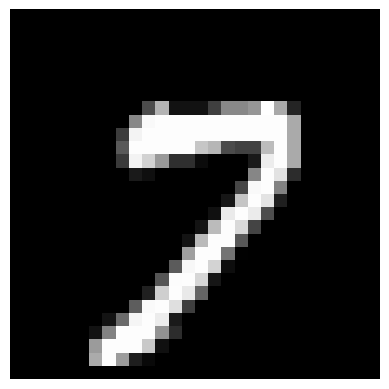

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


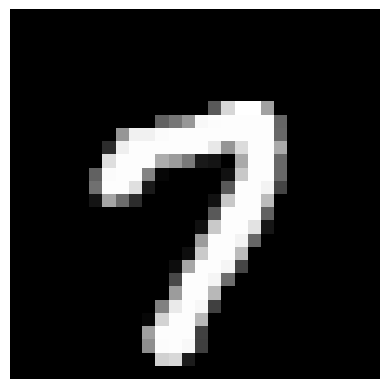

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


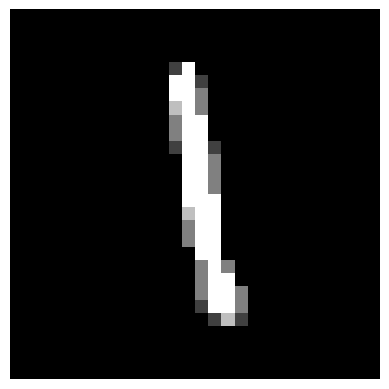

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


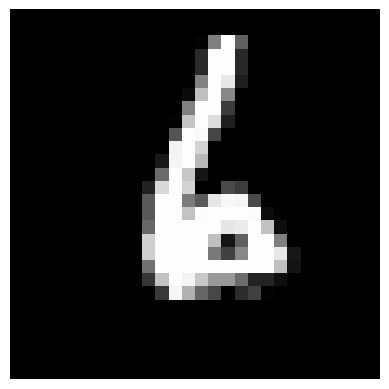

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


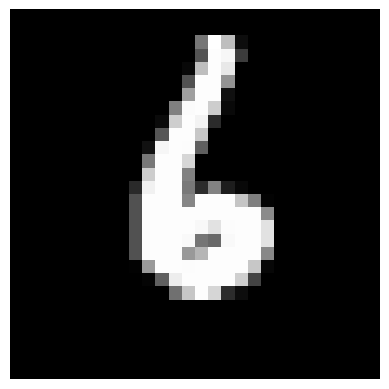

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


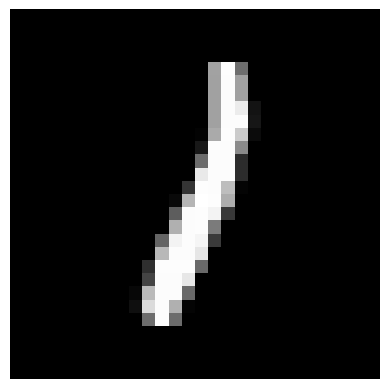

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


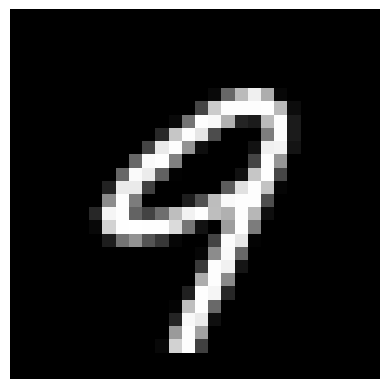

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


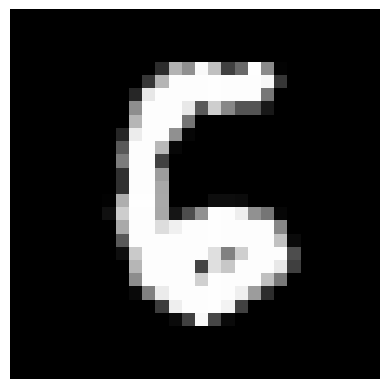

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


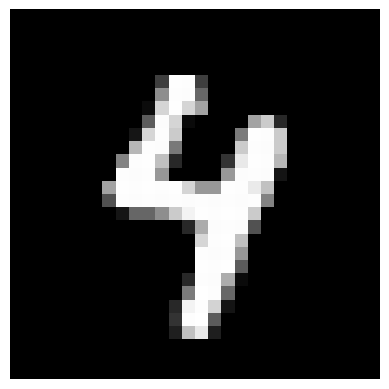

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


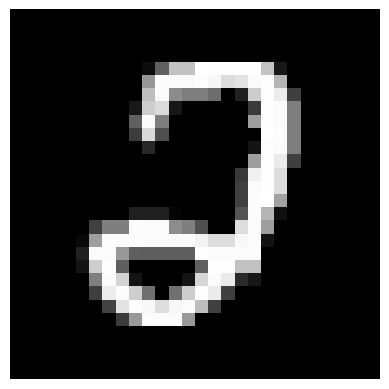

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


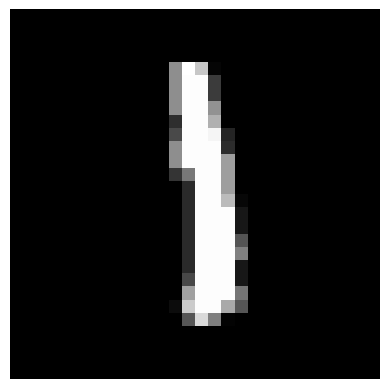

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


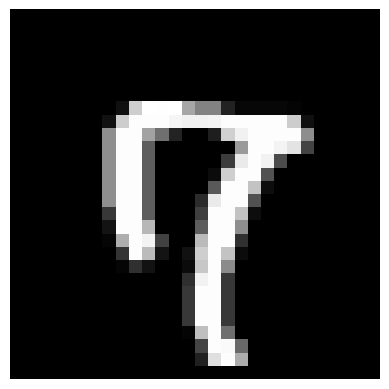

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


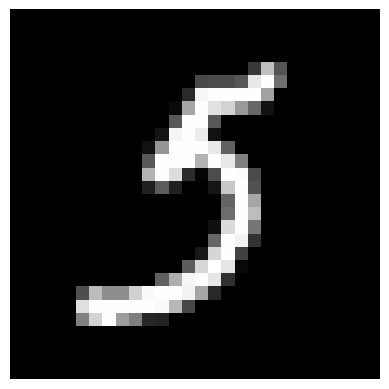

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


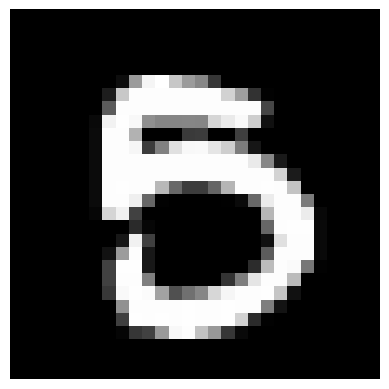

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


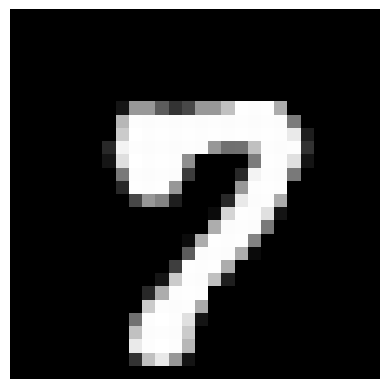

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


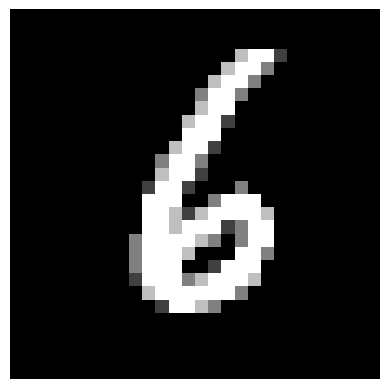

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


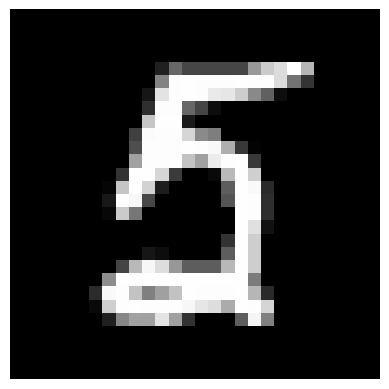

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


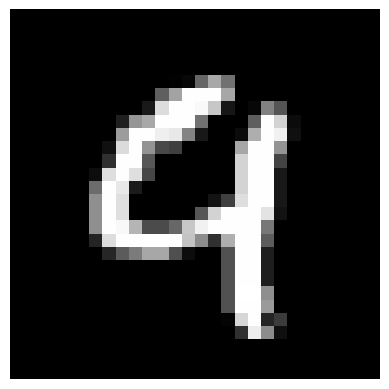

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


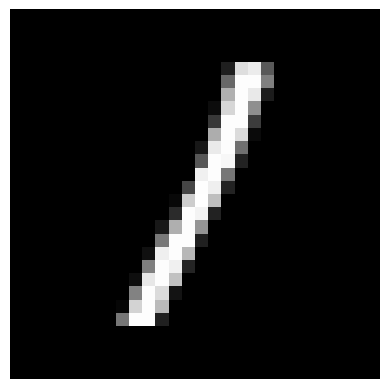

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


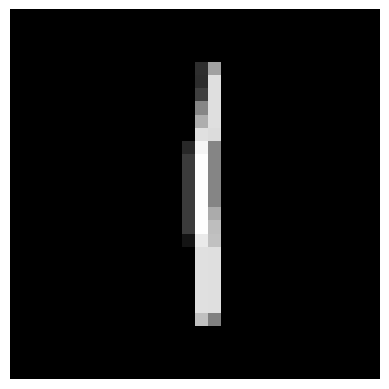

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


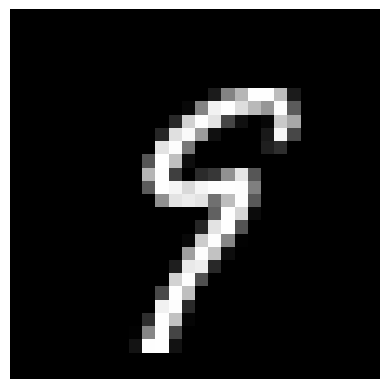

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


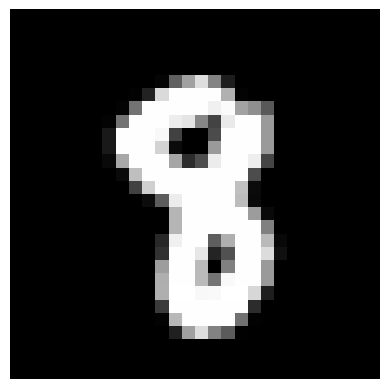

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


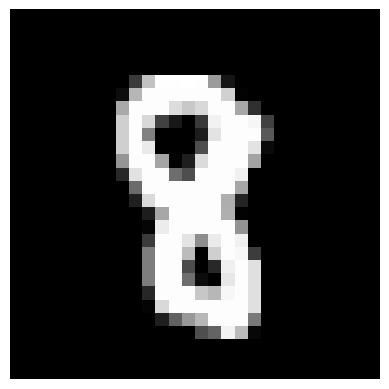

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


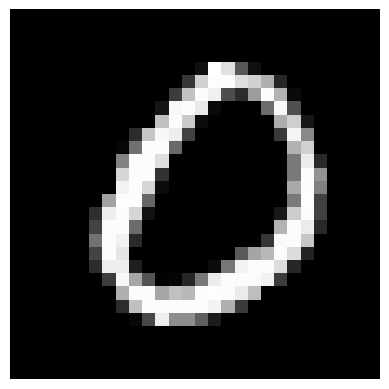

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


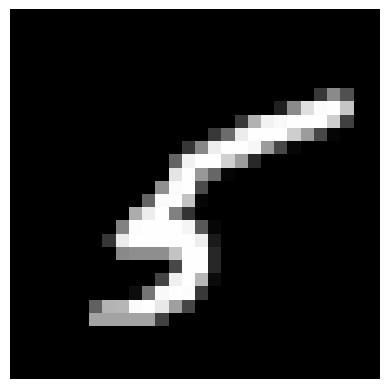

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


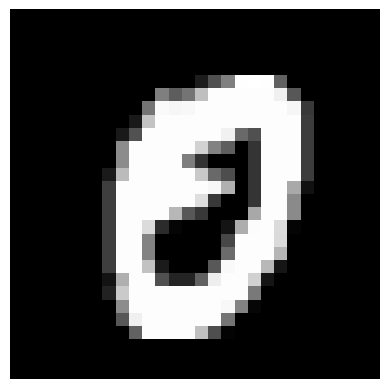

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


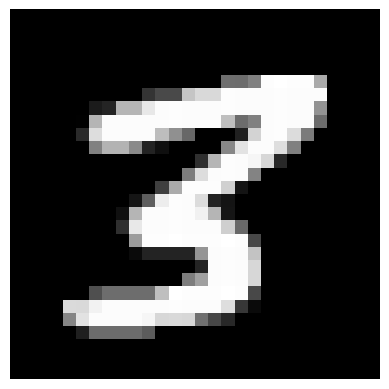

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


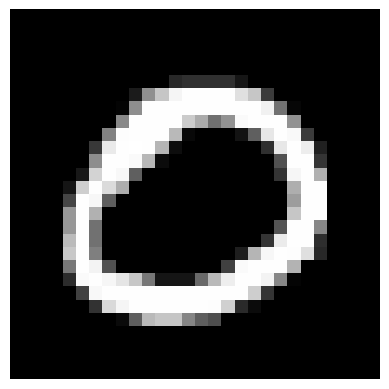

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


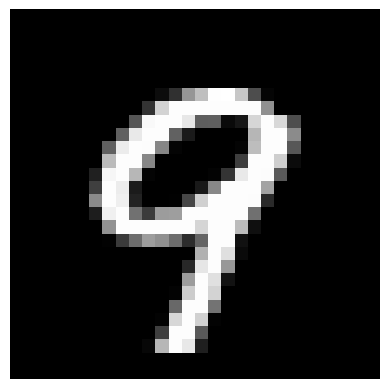

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


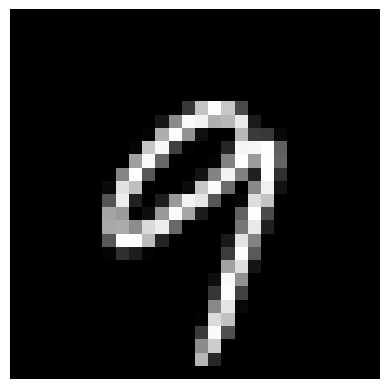

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


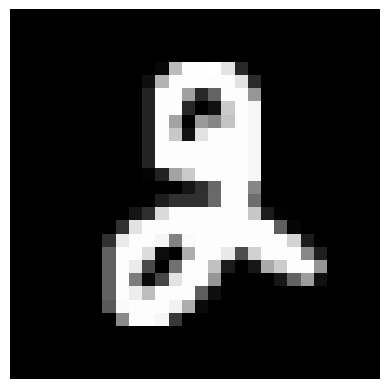

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


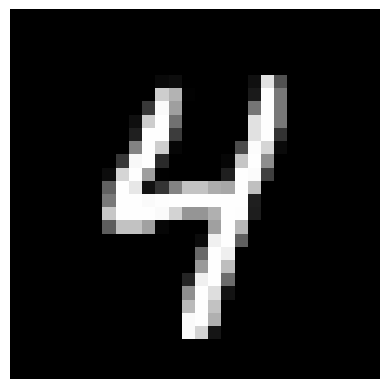

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


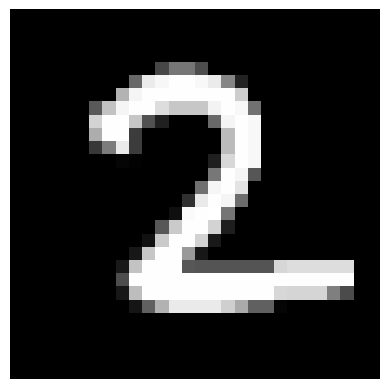

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


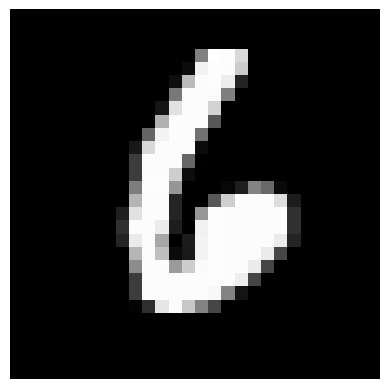

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


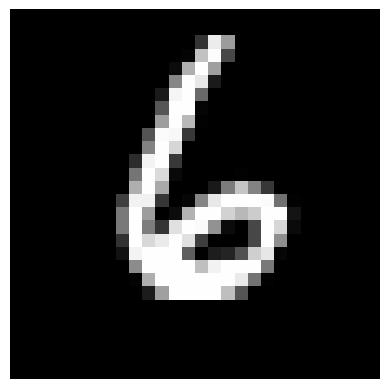

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


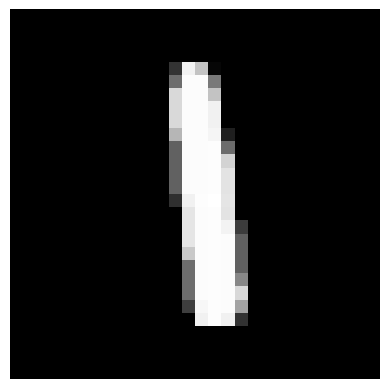

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


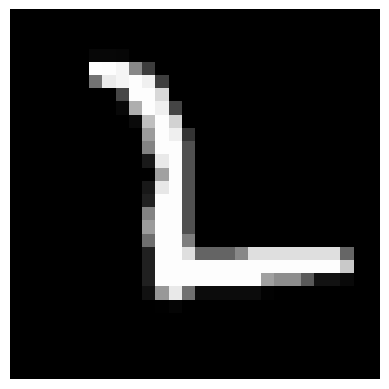

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


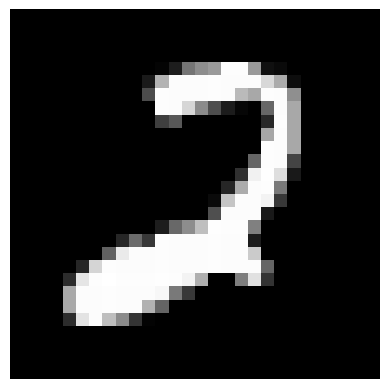

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


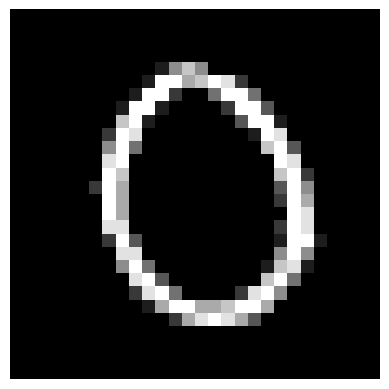

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


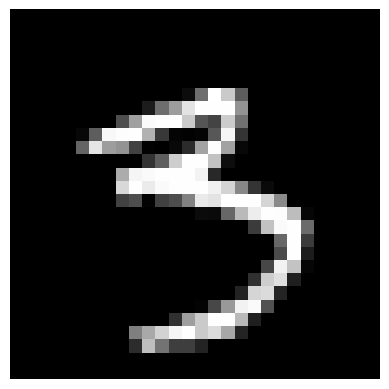

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


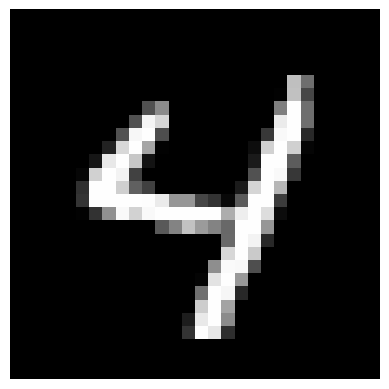

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


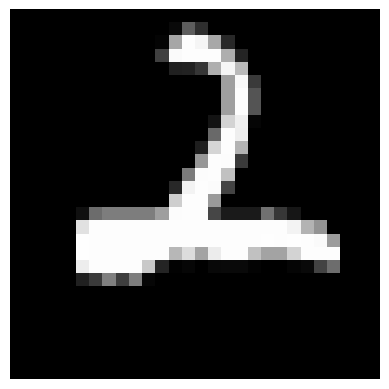

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


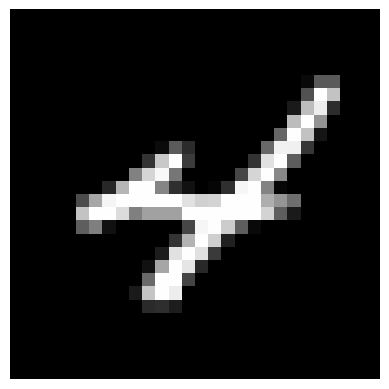

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


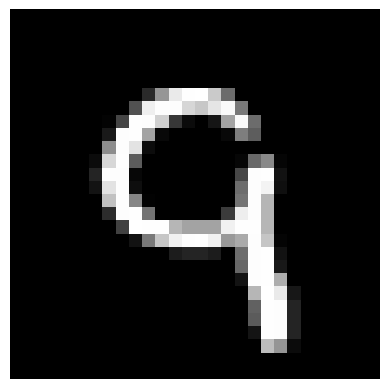

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


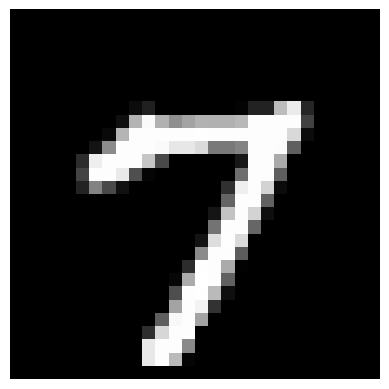

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


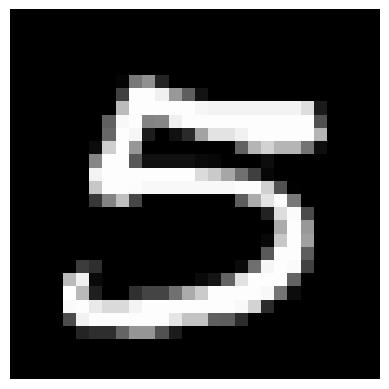

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


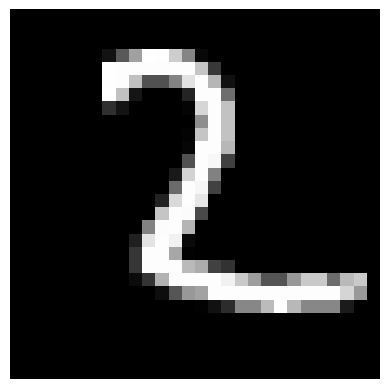

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


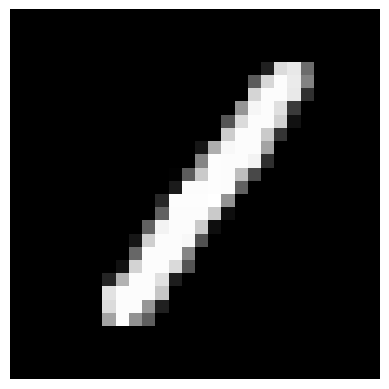

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


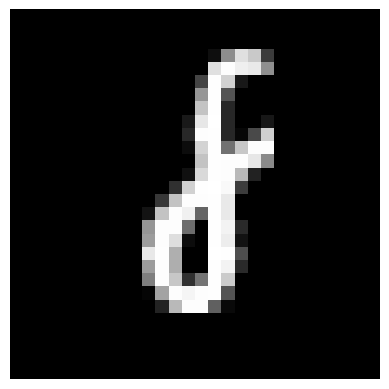

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


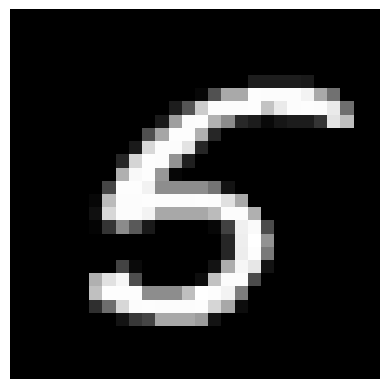

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


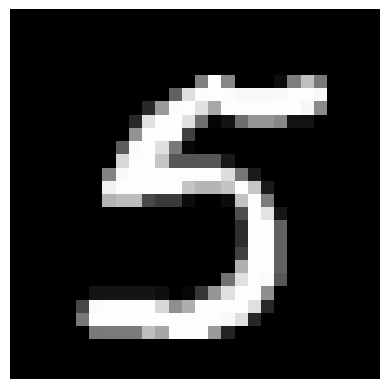

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


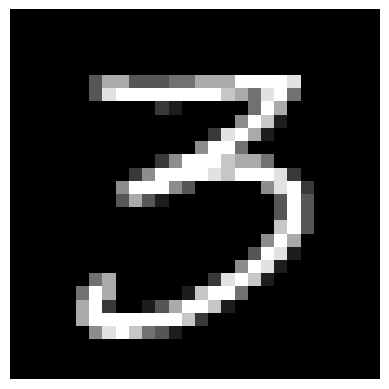

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


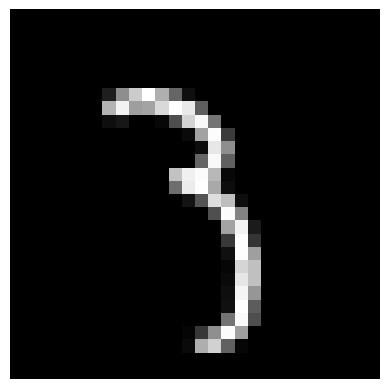

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


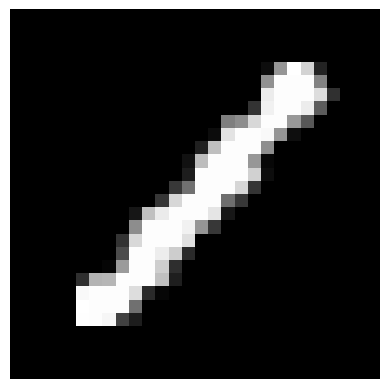

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


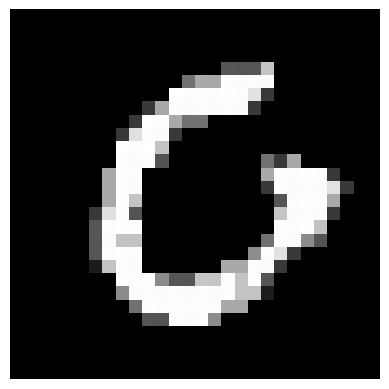

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


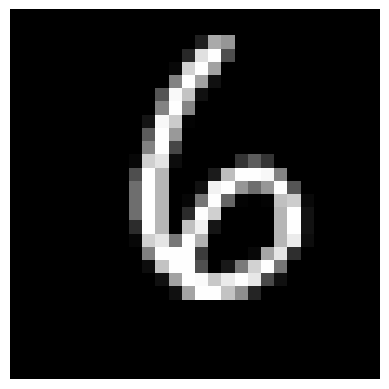

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


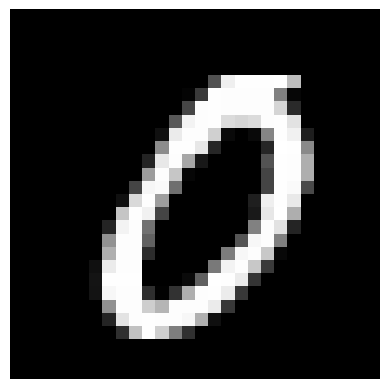

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


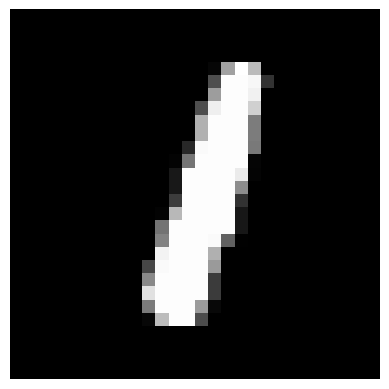

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


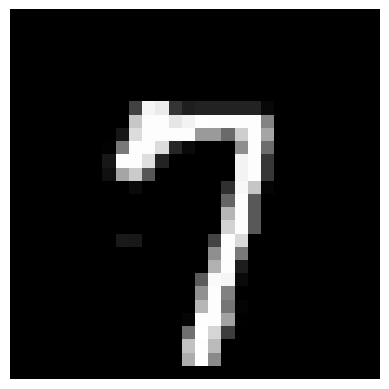

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


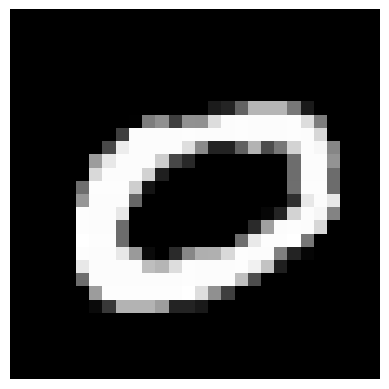

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


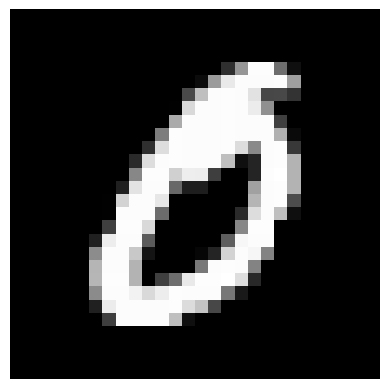

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


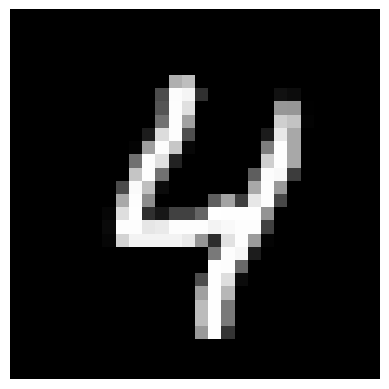

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


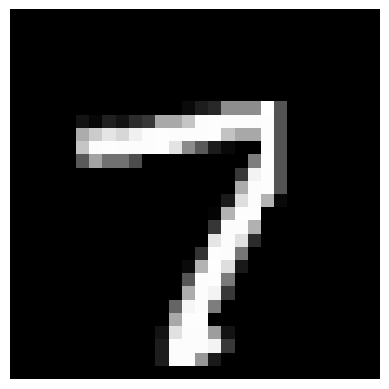

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


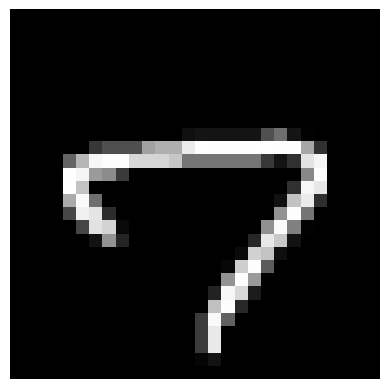

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


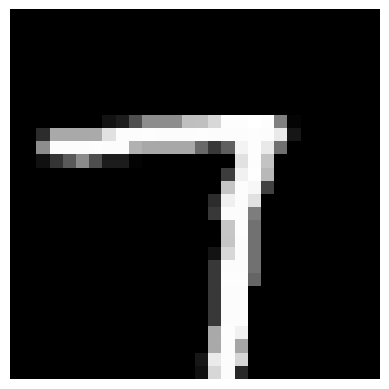

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


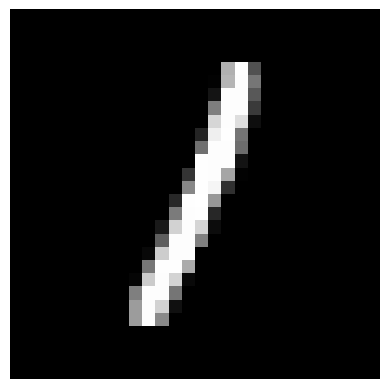

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


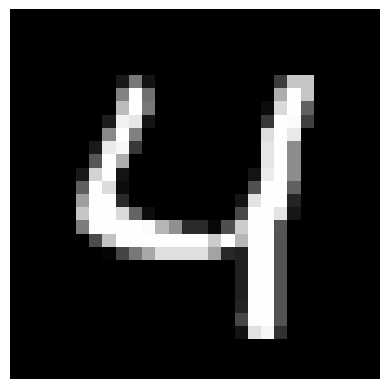

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


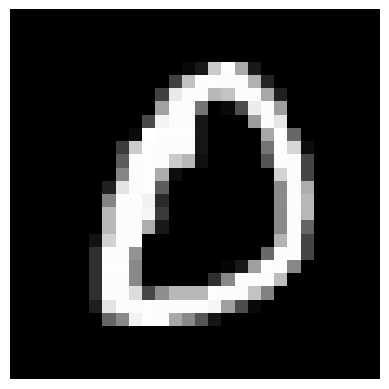

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


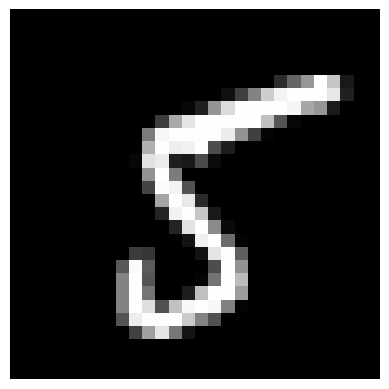

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


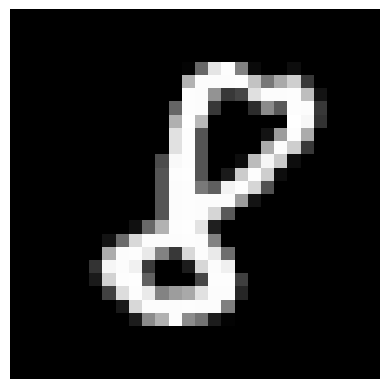

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


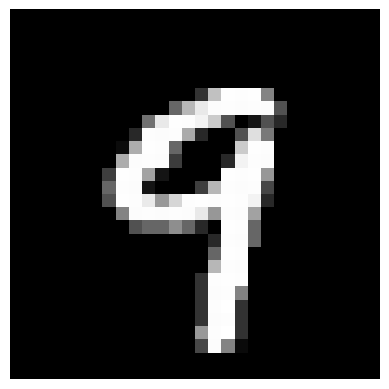

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


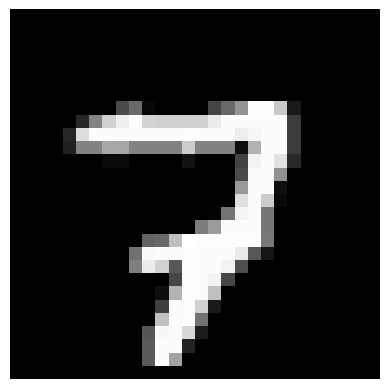

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


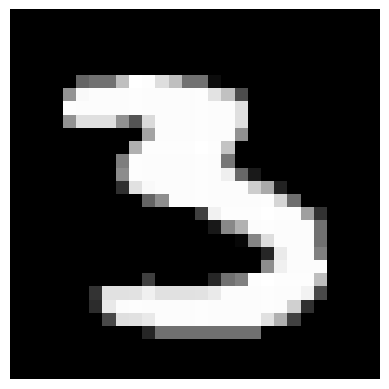

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


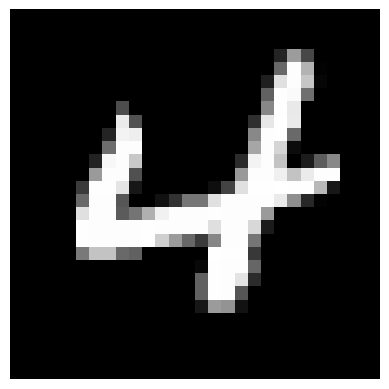

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


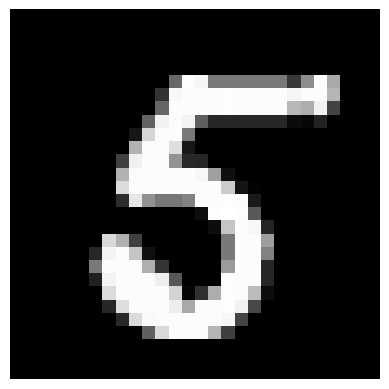

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


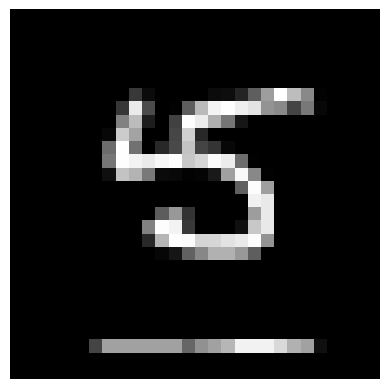

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


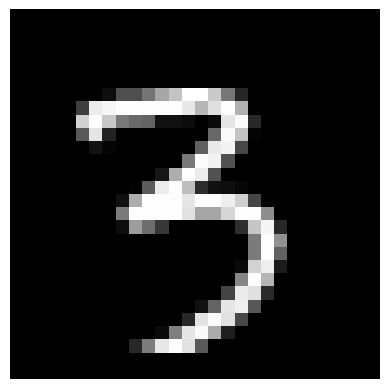

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


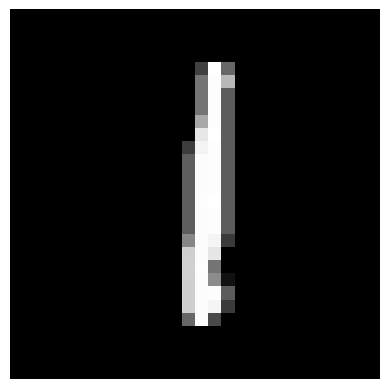

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


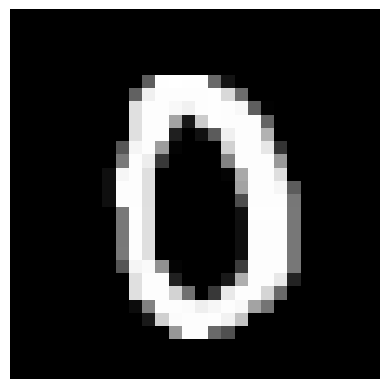

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


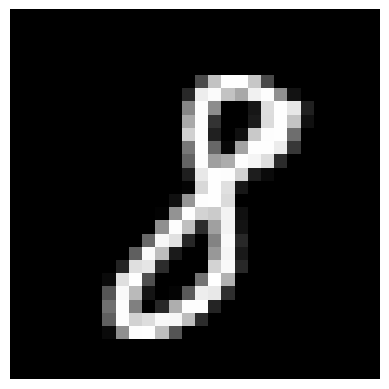

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


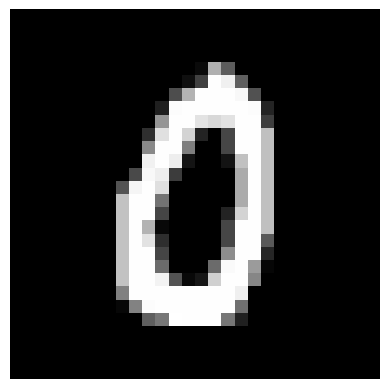

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


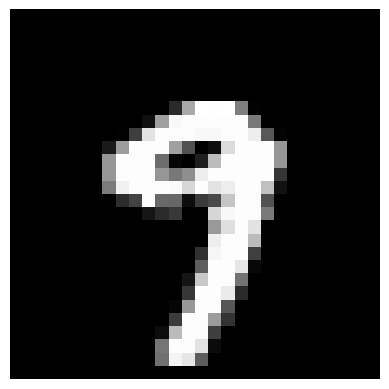

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


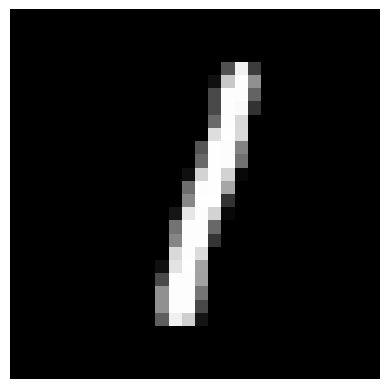

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


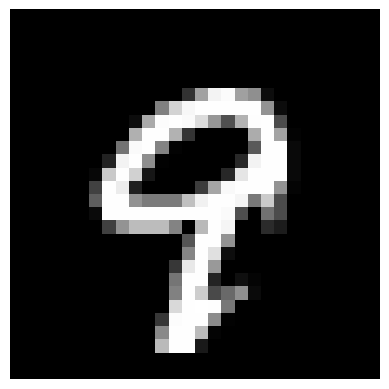

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


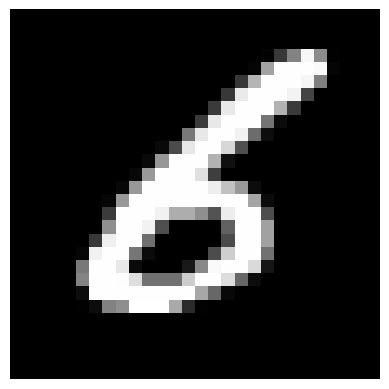

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


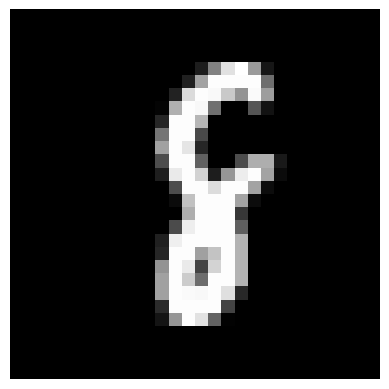

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


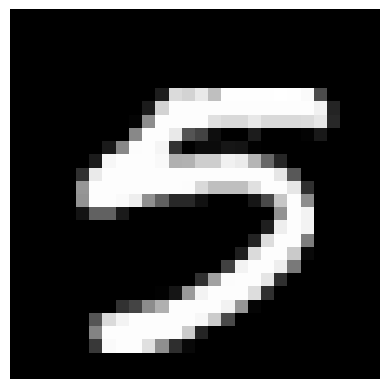

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


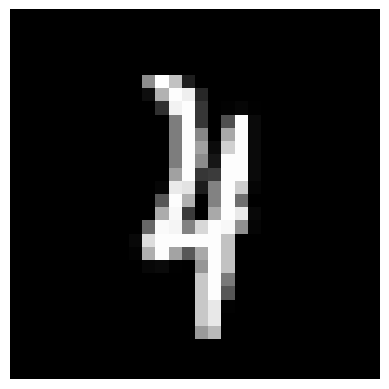

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


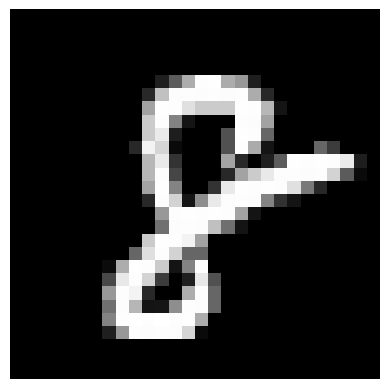

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


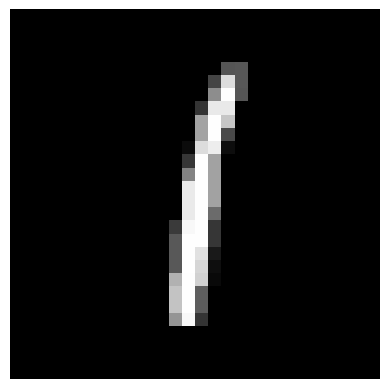

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


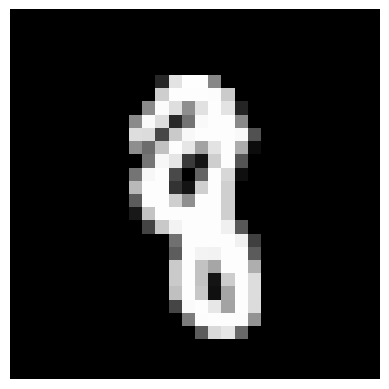

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


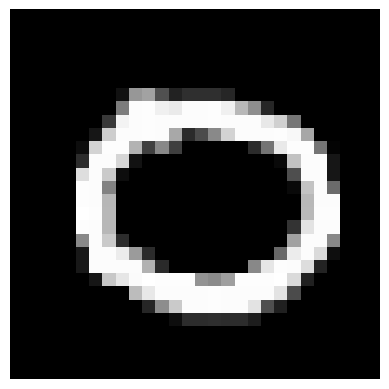

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


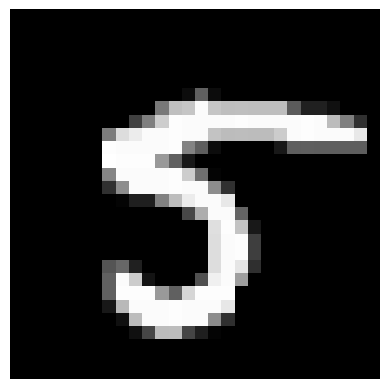

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


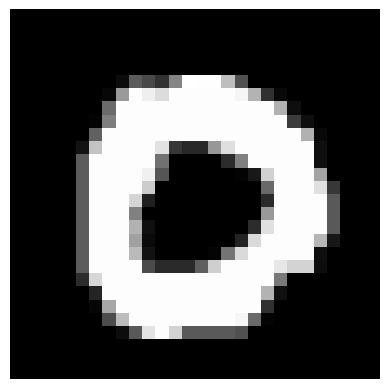

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


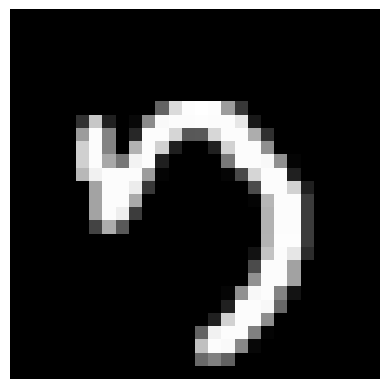

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


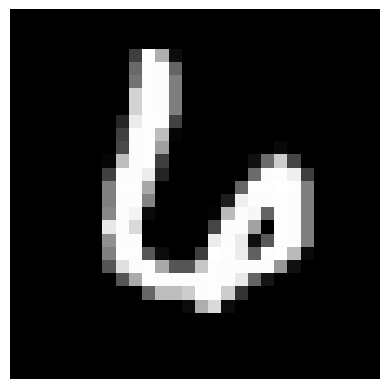

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


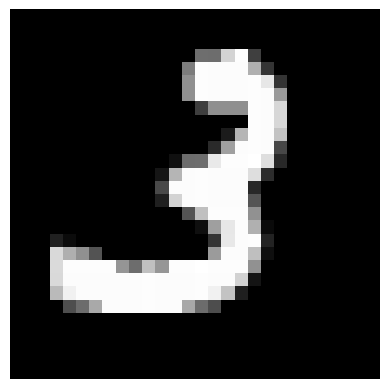

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


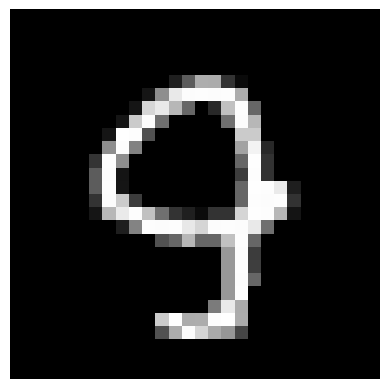

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


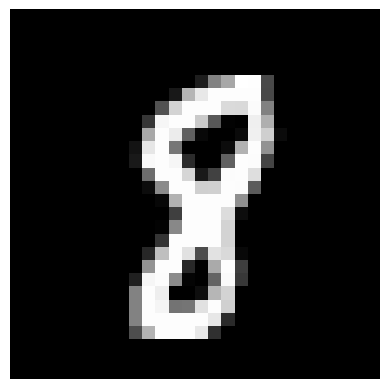

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


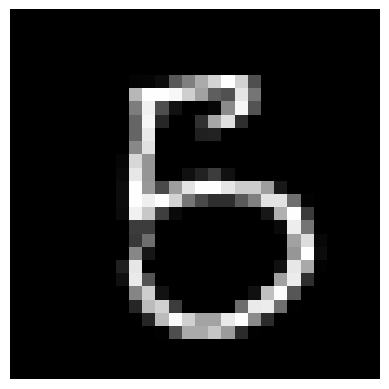

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


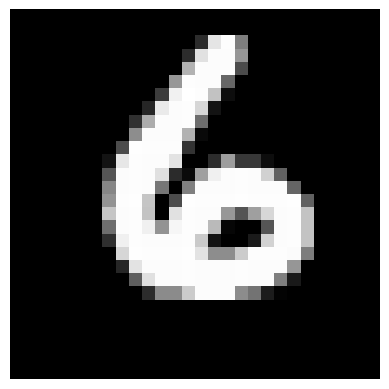

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


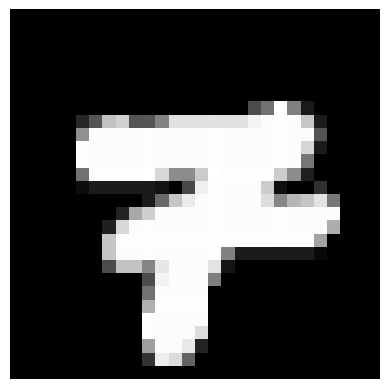

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


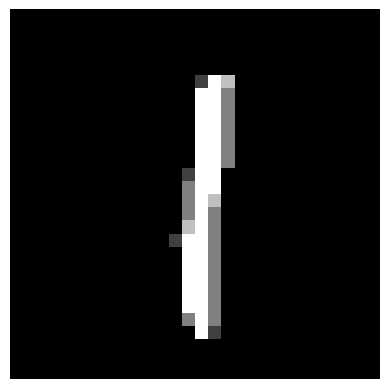

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


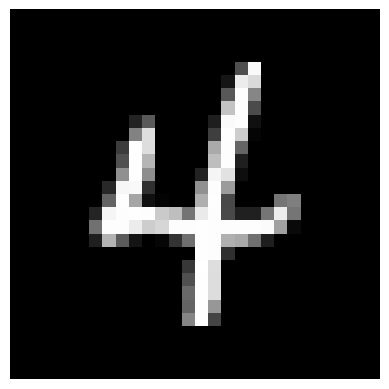

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


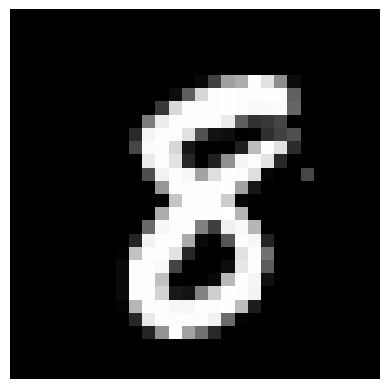

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


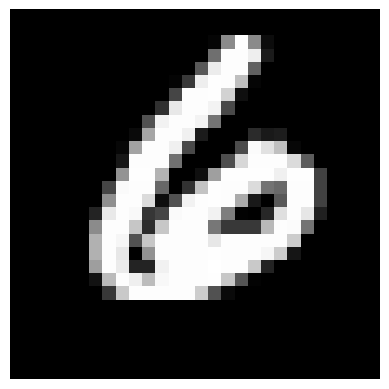

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


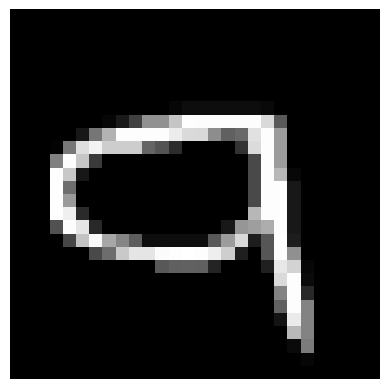

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


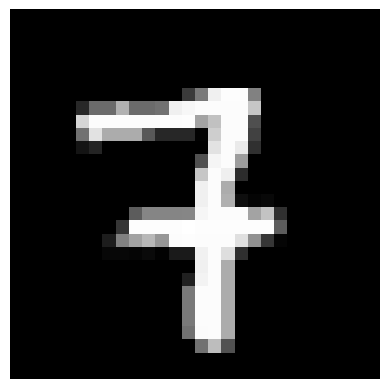

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


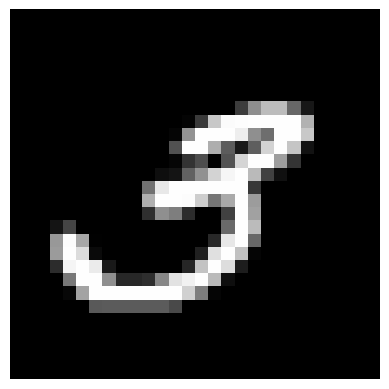

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


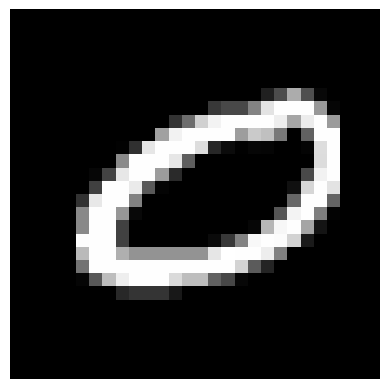

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


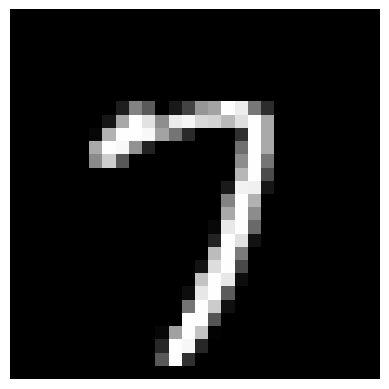

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


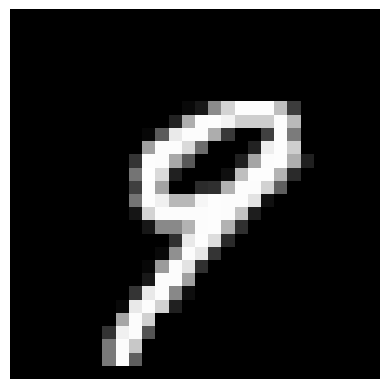

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


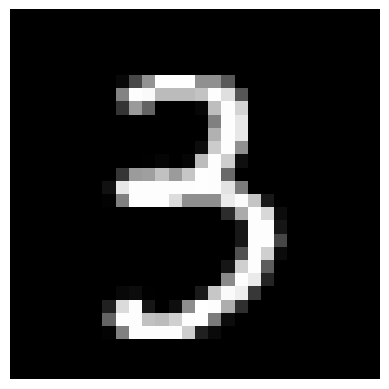

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


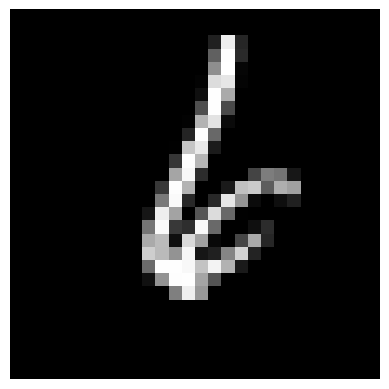

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


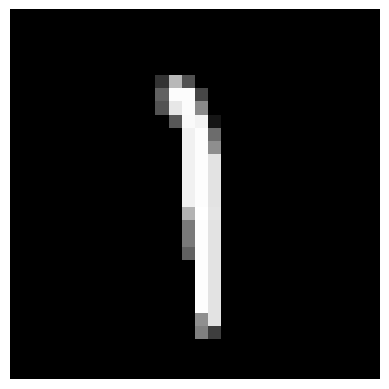

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


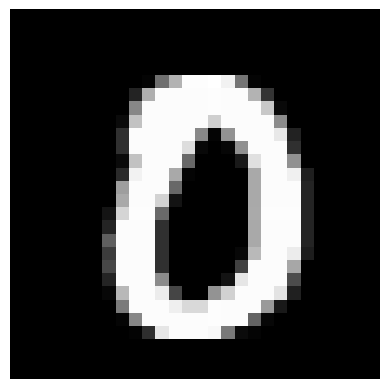

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


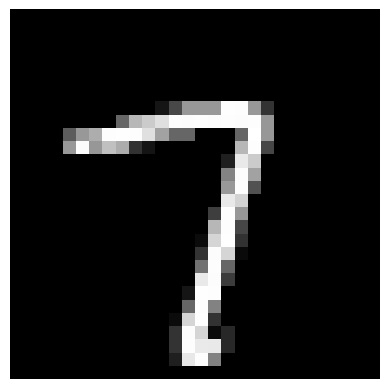

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


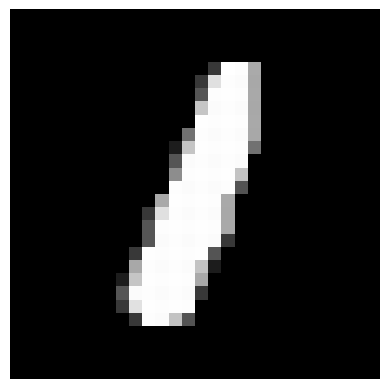

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


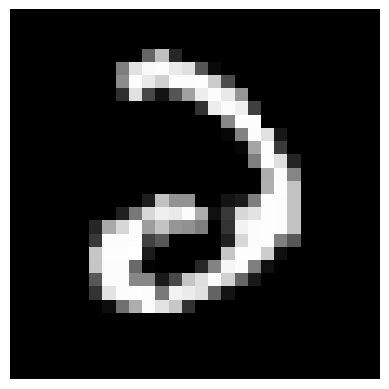

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


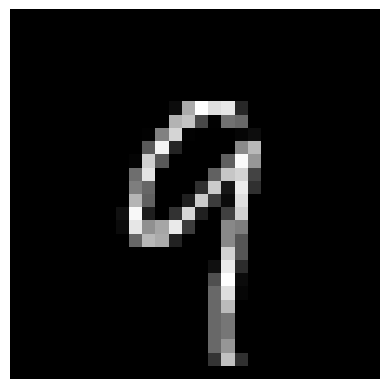

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


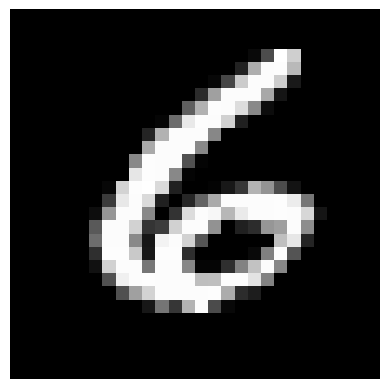

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


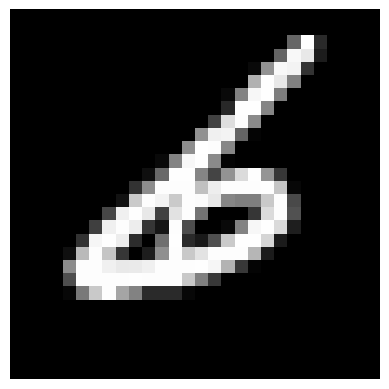

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


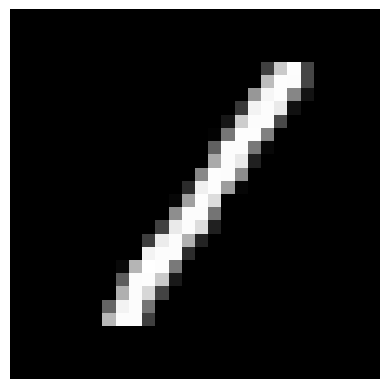

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


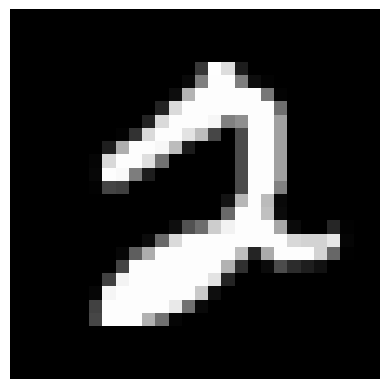

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


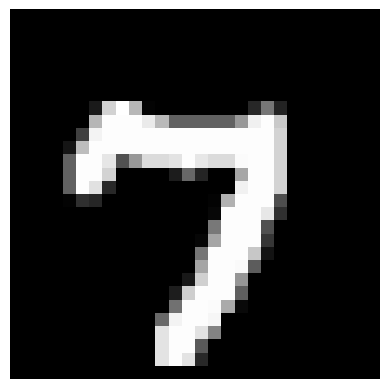

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


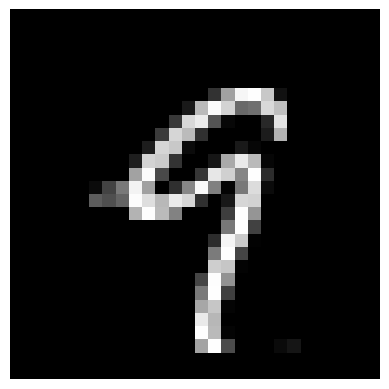

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


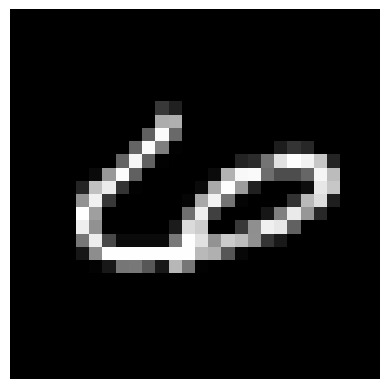

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


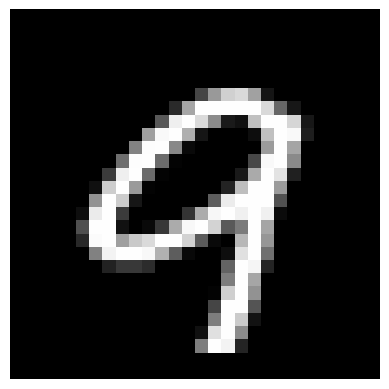

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


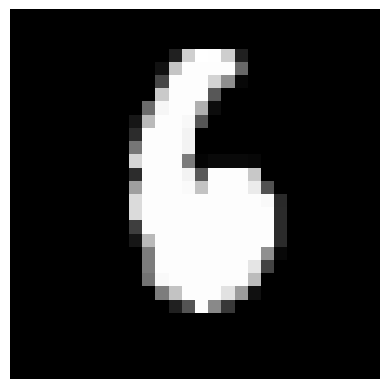

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


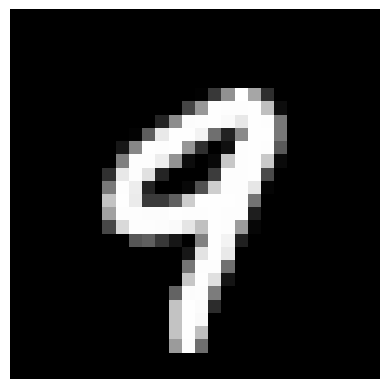

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


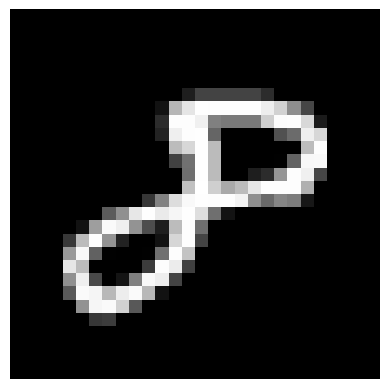

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


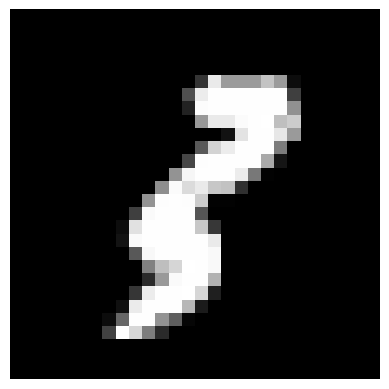

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


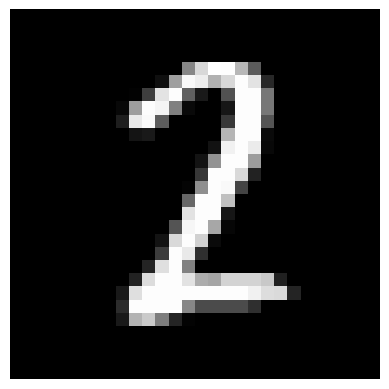

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


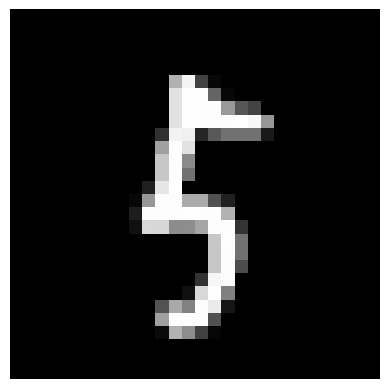

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


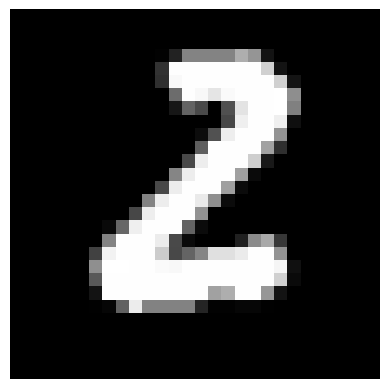

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


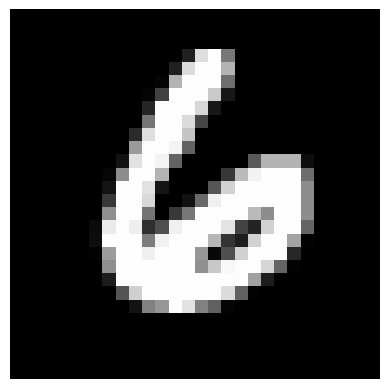

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


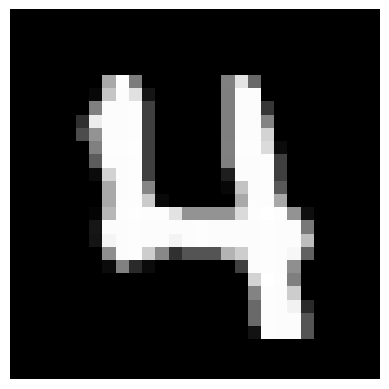

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


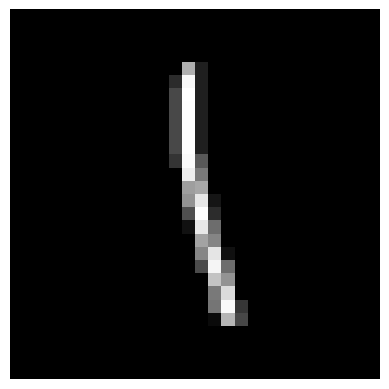

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


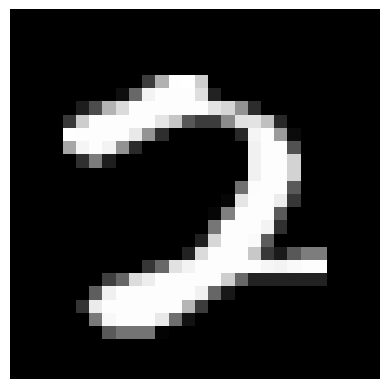

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


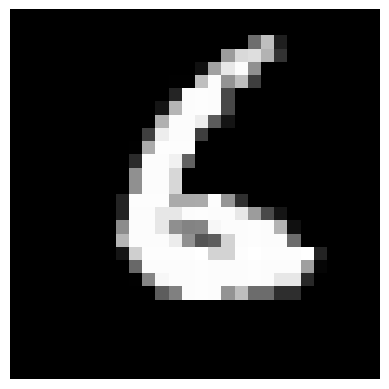

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


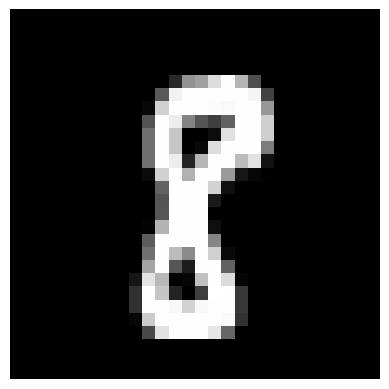

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


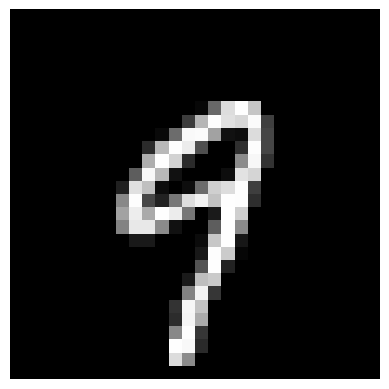

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


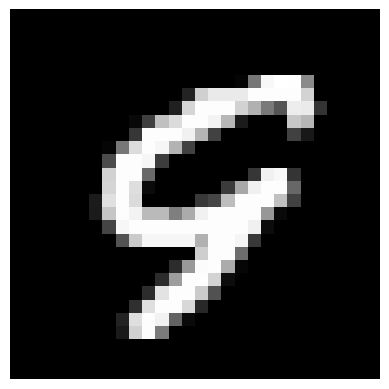

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


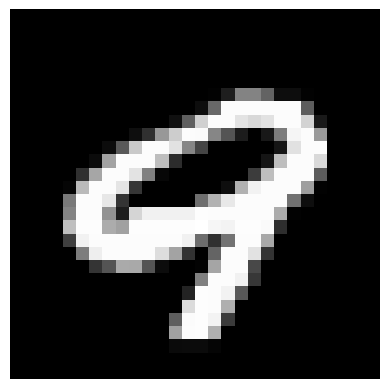

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


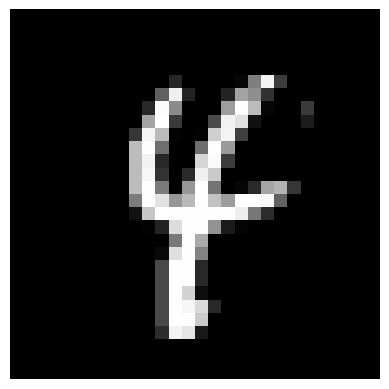

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


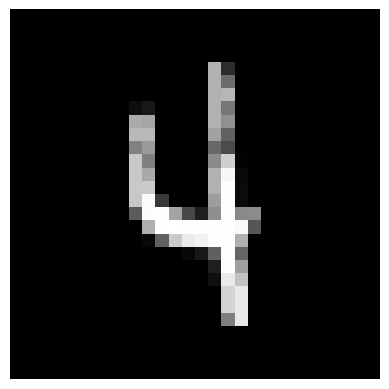

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


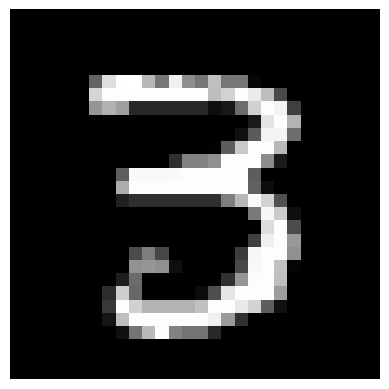

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


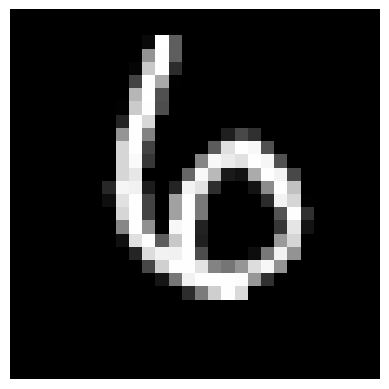

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


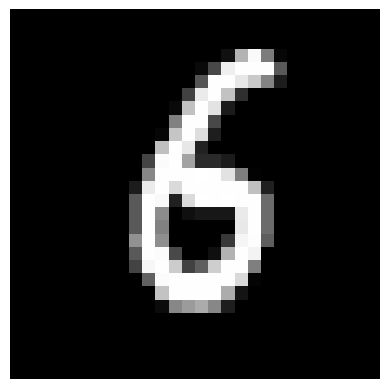

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


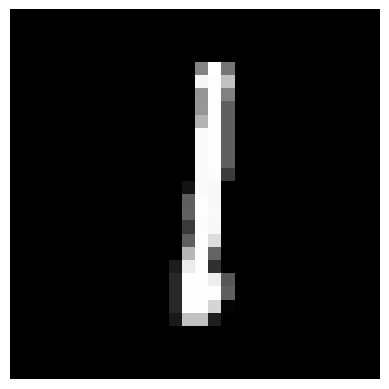

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


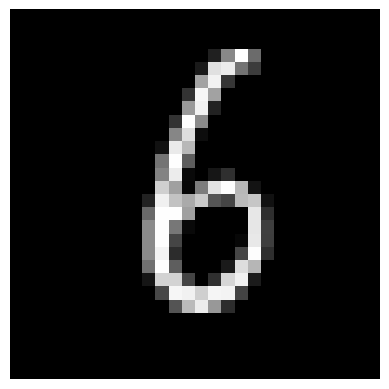

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


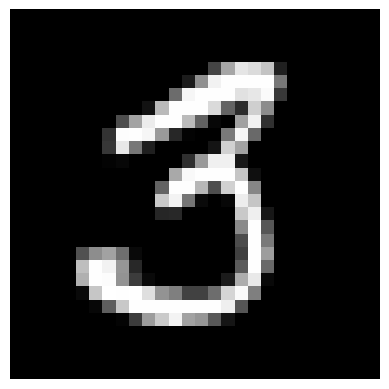

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


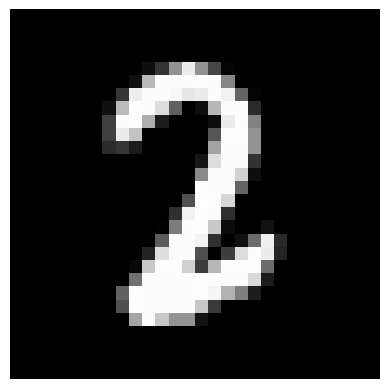

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


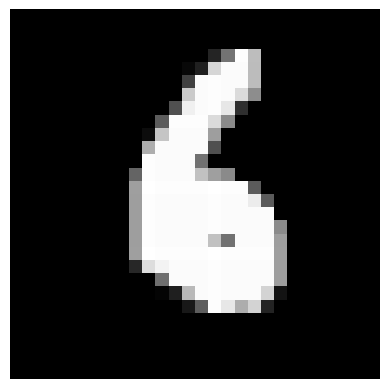

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


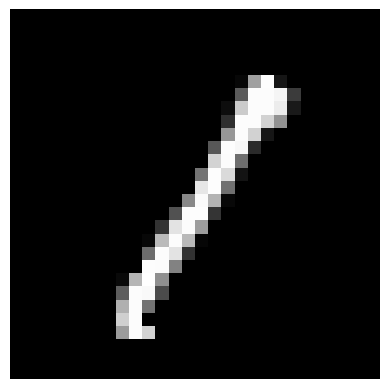

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


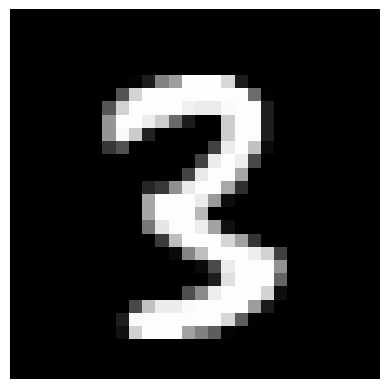

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


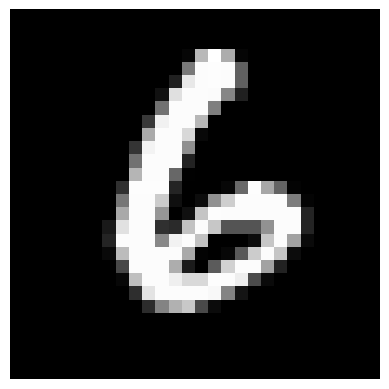

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


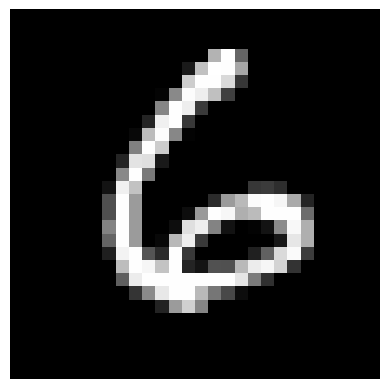

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


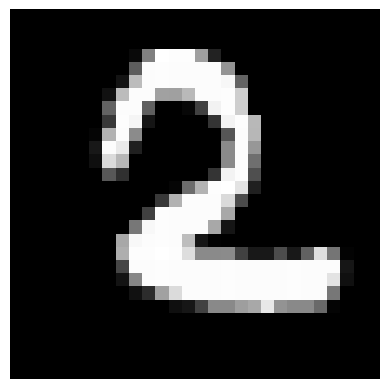

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


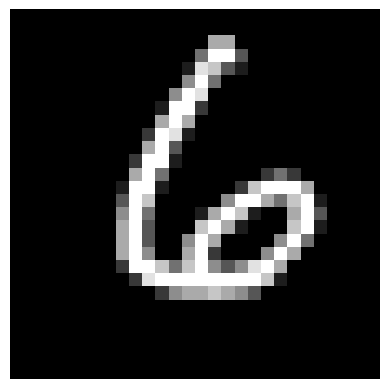

[6.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


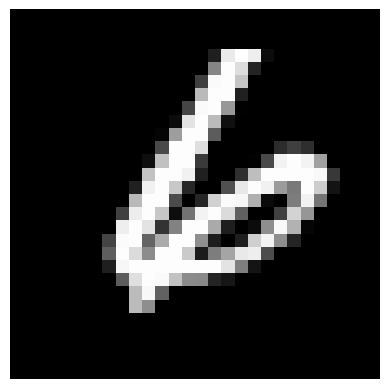

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


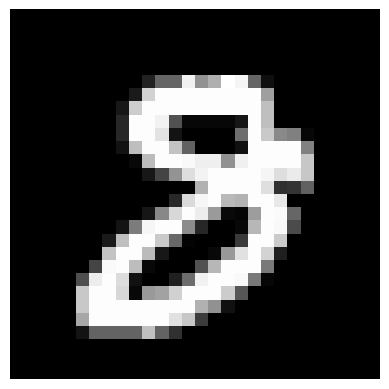

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


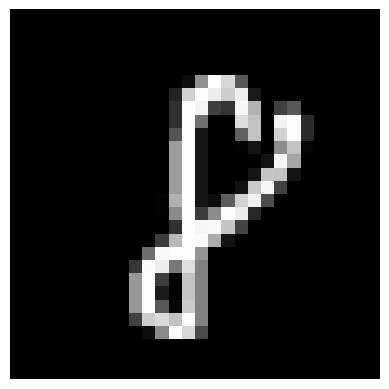

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


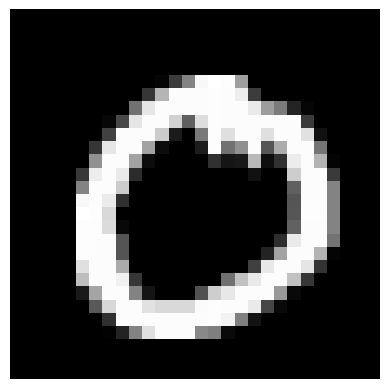

[4.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


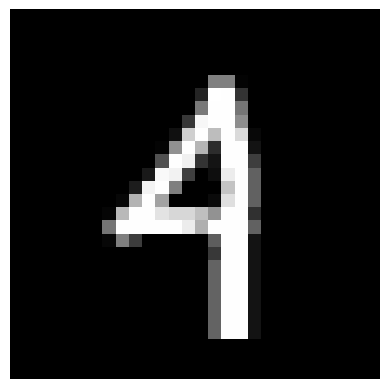

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


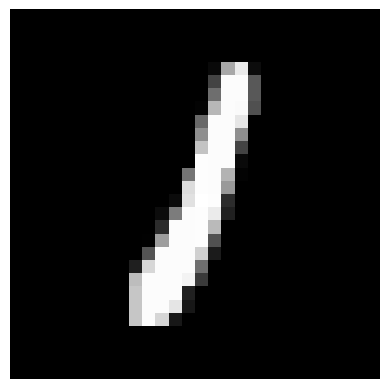

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


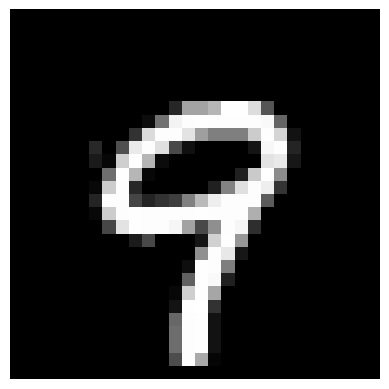

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


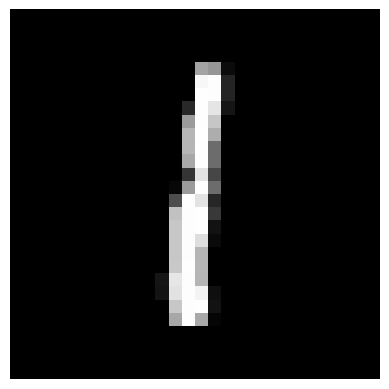

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


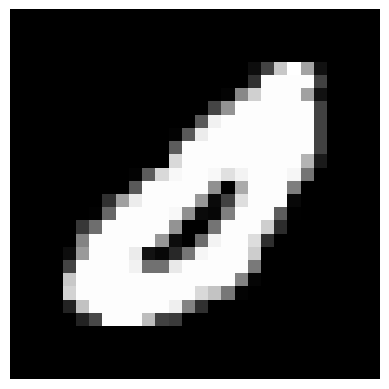

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


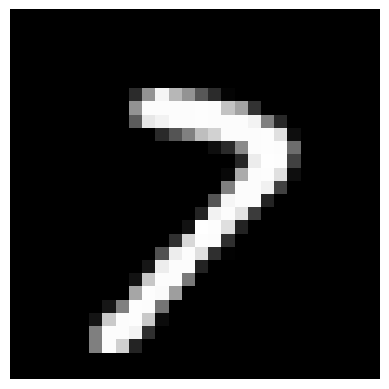

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


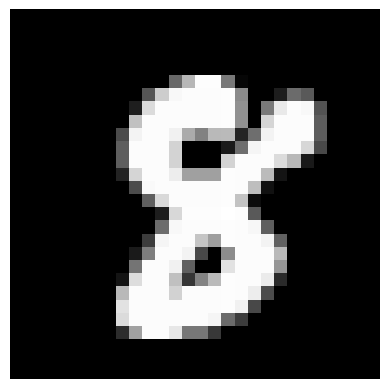

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


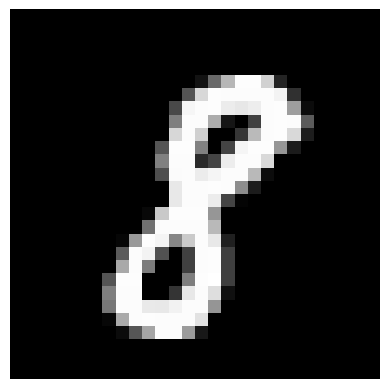

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


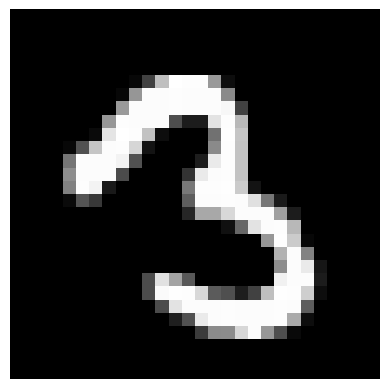

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


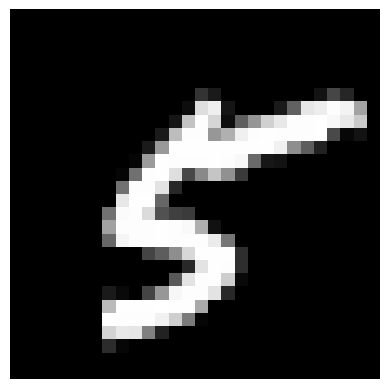

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


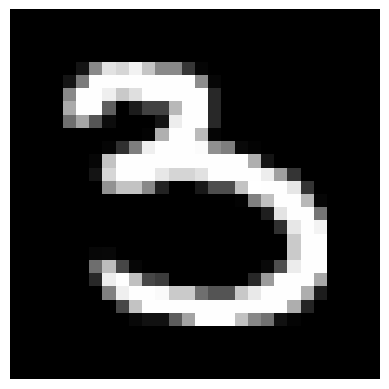

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


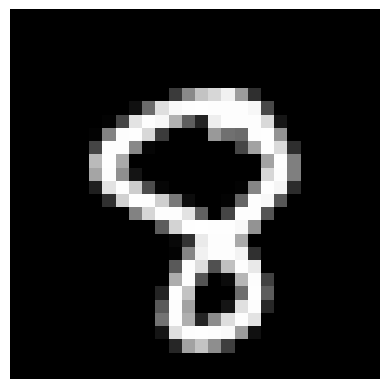

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


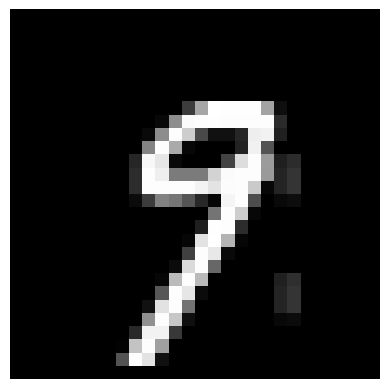

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


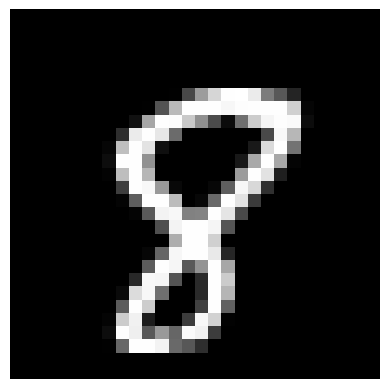

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


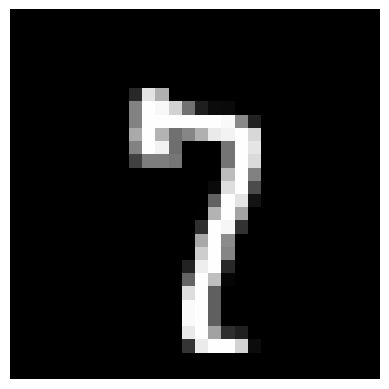

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


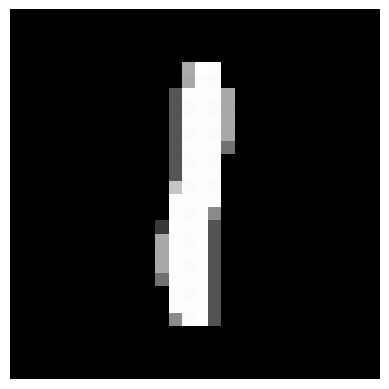

[5.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


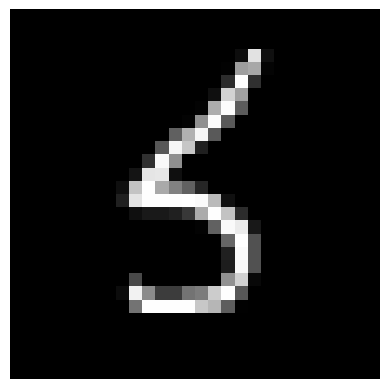

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


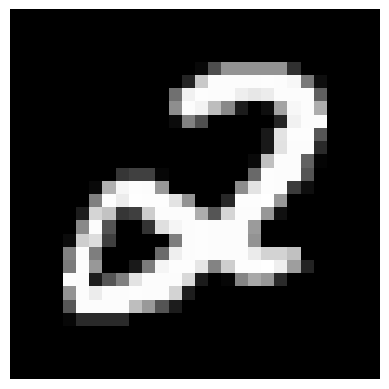

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


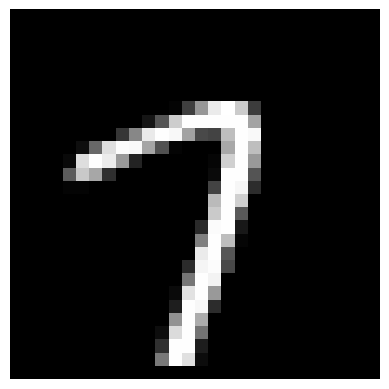

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


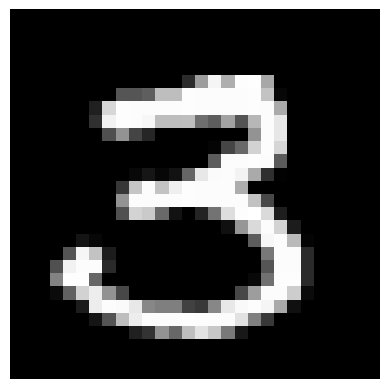

[7.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


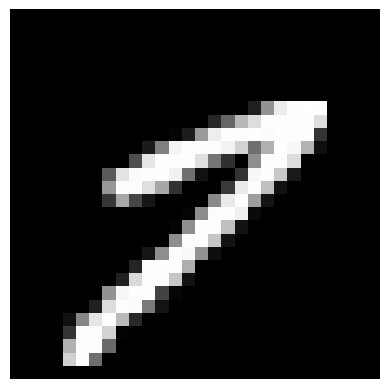

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


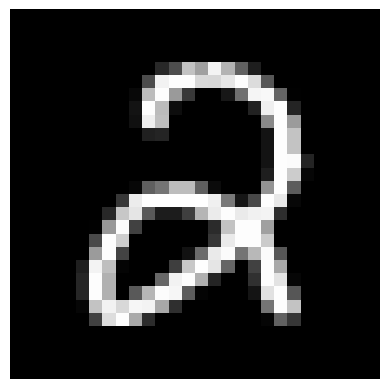

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


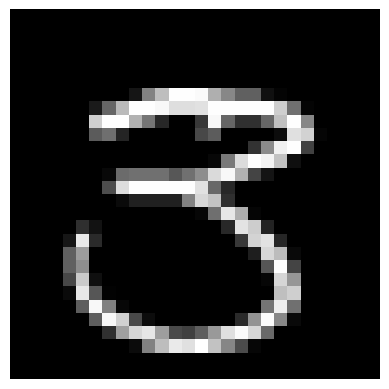

[8.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


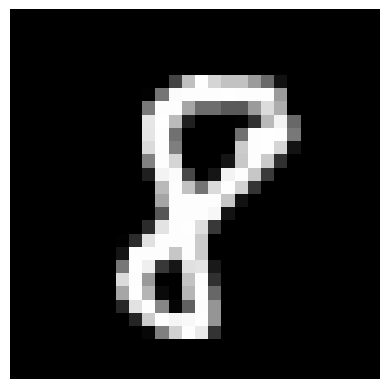

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


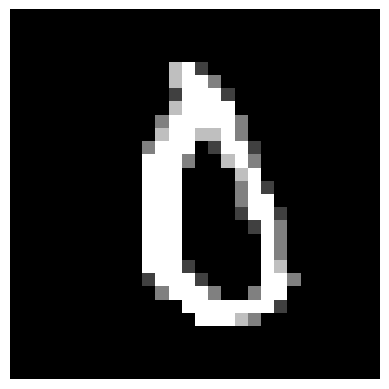

[9.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


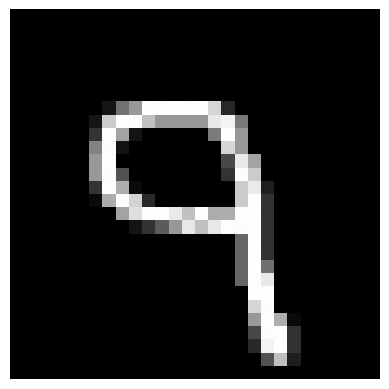

[2.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


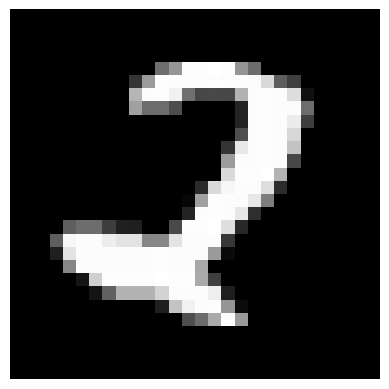

[1.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


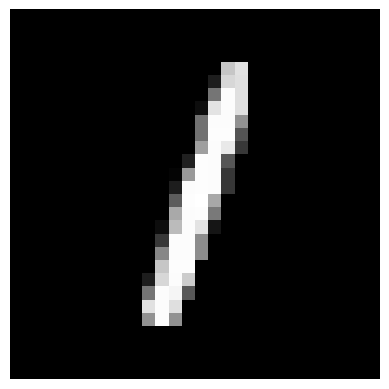

[3.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


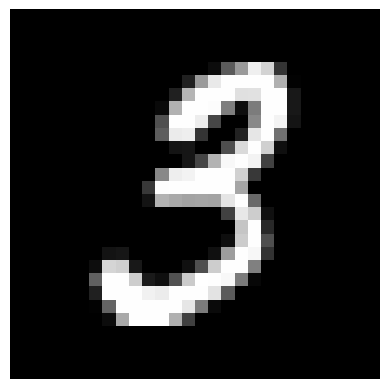

[0.]
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], grad_fn=<SelectBackward0>)


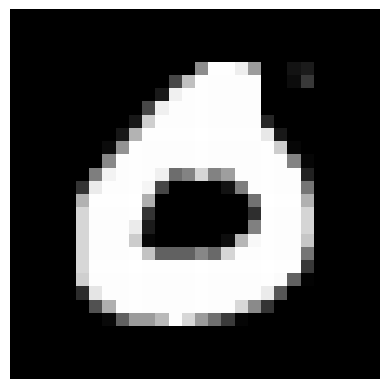

IndexError: index 16 is out of bounds for dimension 0 with size 16

In [341]:
# test acuaracy

df2 = pd.read_csv("..\\Datasets\\train.csv")

for i,data in enumerate(trainloader,0):
    x,y = data

    yhat = model(x)

    #print(y[i].numpy(), yhat[i])

   
    print(y[i%64].numpy())
    print(yhat[i%64])

    pixel_data = x[i%64].numpy()
    image_array = pixel_data.reshape((28,28))
    plt.imshow(image_array,cmap = 'gray',vmin = 0,vmax = 255)
    plt.axis('off')
    plt.show()




    #print(y.__str__() + " - " + yhat.__str__())